In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import jarque_bera
from scipy.stats import ttest_ind,mannwhitneyu,chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.filterwarnings("ignore")

# Objective
Predicing Back Order in Supply Chain Management.


# What is Back Order?

Back Order Prediction in supply chain management is the estimation of the likelihood 
that a product will be unavailable when a customer places an order. 
It involves analyzing historical sales data, inventory levels, lead times,
and customer demand patterns to forecast the probability of a backorder situation.
By utilizing statistical models or machine learning algorithms, companies can anticipate stockouts,
manage customer expectations, optimize inventory, and enhance supply chain efficiency. 

Accurate predictions enable proactive actions such as adjusting inventory, expediting deliveries, or 
finding alternative suppliers, leading to improved customer satisfaction and reduced lost sales.


# Data Dictionary

We Hade Train and Test Data Sets Seperately

In [2]:
#loading Data
df1 = pd.read_csv('Training_BOP.csv',low_memory=False)
df2 = pd.read_csv('Testing_BOP.csv',low_memory=False)

In [3]:
df1.shape,df2.shape

((1687861, 23), (242076, 23))

In [4]:
#Training Data has 16 Lakh rows and 23 columns, Testing Data Has Two Lakh forty two thousadn Rows and 23 cloumns.

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [6]:
#the Dtat types Seems Corresponding to the features

In [7]:
#checking for Null Values

In [8]:
#seeing the five point Summary of the data
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.111782,29615.233831,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1586967.0,7.872267,7.056024,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0


In [9]:
#Train Data has perf_6_month_avg -99.00, perf_12_month_avg has -0.99


In [10]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,242075.0,499.751028,29280.390793,-25414.0,4.00,15.00,81.00,12145792.0
lead_time,227351.0,7.923018,7.041410,0.0,4.00,8.00,9.00,52.0
in_transit_qty,242075.0,36.178213,898.673127,0.0,0.00,0.00,0.00,265272.0
forecast_3_month,242075.0,181.472345,5648.874620,0.0,0.00,0.00,4.00,1510592.0
forecast_6_month,242075.0,348.807304,10081.797119,0.0,0.00,0.00,12.00,2157024.0
forecast_9_month,242075.0,508.296301,14109.723787,0.0,0.00,0.00,20.00,3162260.0
sales_1_month,242075.0,51.478195,1544.678350,0.0,0.00,0.00,4.00,349620.0
sales_3_month,242075.0,172.139316,5164.243624,0.0,0.00,1.00,14.00,1099852.0
sales_6_month,242075.0,340.425414,9386.523492,0.0,0.00,2.00,30.00,2103389.0
sales_9_month,242075.0,511.775446,13976.702192,0.0,0.00,4.00,46.00,3195211.0


In [11]:
df1.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [12]:
df2.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No


In [13]:
#Train Data has perf_6_month_avg -99.00, perf_12_month_avg has -0.99

In [14]:
#chehcking the number of -.99 in the data set

In [15]:
df1[(df1["perf_6_month_avg"]<0 )|(df1["perf_12_month_avg"]<0 )].shape[0]/df1.shape[0]*100

7.671129316928349

7.67 % of data is having values -99.0 in these columns, as per general Convenions this can be treated as null values and all -99 can be
replace with np.nan


In [16]:
df2[(df2["perf_6_month_avg"]<0 )|(df2["perf_6_month_avg"]<0 )].shape[0]/df2.shape[0]*100

7.89049719922669

7.67 % of Test data is having values -99.0 in these columns, as per general Convenions this can be treated as null values and all -99 can be
replace with np.nan

In [17]:
df1.replace({-99:np.nan},inplace=True)

In [18]:
df2.replace({-99:np.nan},inplace=True)

In [19]:
df1[(df1["perf_6_month_avg"]<0 )|(df1["perf_12_month_avg"]<0 )].shape[0]/df1.shape[0]*100

0.0

In [20]:
df2[(df2["perf_6_month_avg"]<0 )|(df2["perf_6_month_avg"]<0 )].shape[0]/df2.shape[0]*100

0.0

Succefully imputed all -99 into Null Values.

In [21]:
#Checking for percentage of null values in the whole data.

In [22]:
df1.isnull().sum()/df1.shape[0]*100


sku                  0.000000
national_inv         0.000237
lead_time            5.977625
in_transit_qty       0.000059
forecast_3_month     0.000059
forecast_6_month     0.000059
forecast_9_month     0.000059
sales_1_month        0.000059
sales_3_month        0.000059
sales_6_month        0.000059
sales_9_month        0.000059
min_bank             0.000059
potential_issue      0.000059
pieces_past_due      0.000059
perf_6_month_avg     7.671189
perf_12_month_avg    7.231105
local_bo_qty         0.000059
deck_risk            0.000059
oe_constraint        0.000059
ppap_risk            0.000059
stop_auto_buy        0.000059
rev_stop             0.000059
went_on_backorder    0.000059
dtype: float64

In [23]:
df2.isnull().sum()/df1.shape[0]*100


sku                  0.000000
national_inv         0.000059
lead_time            0.872406
in_transit_qty       0.000059
forecast_3_month     0.000059
forecast_6_month     0.000059
forecast_9_month     0.000059
sales_1_month        0.000059
sales_3_month        0.000059
sales_6_month        0.000059
sales_9_month        0.000059
min_bank             0.000059
potential_issue      0.000059
pieces_past_due      0.000059
perf_6_month_avg     1.131728
perf_12_month_avg    1.065017
local_bo_qty         0.000059
deck_risk            0.000059
oe_constraint        0.000059
ppap_risk            0.000059
stop_auto_buy        0.000059
rev_stop             0.000059
went_on_backorder    0.000059
dtype: float64

In [24]:
#since we have very large number of rows in the data sets it is better to drop the null values

In [25]:
#dropping the null values in the test as well train data


In [26]:
df3=df1.dropna(axis=0)

In [27]:
df4=df2.dropna(axis=0)

In [28]:
df1.shape[0]-df3.shape[0]

129482

In [29]:
#One Lakh Twenty Nine Thounsand Rows Deleted From Training Data

In [30]:
df2.shape[0]-df4.shape[0]

19102

In [31]:
#Ninteen Thousand Rows Deleted from the test Data.

In [32]:
#Now lets put statstical test to check wheter the train data and test data are from the same population

#the Data is first checked for Normality
#if it is normal ttest Independet is used to compare the means
#if it is not normal mannwhitney test is used to compare the train and test Data

Jarque-Bera Test: The Jarque-Bera test is a statistical test that tests whether a given sample of data
follows a normal distribution. 
H0: The null hypothesis for the Jarque-Bera test is that the data is normally distributed. 

Ha: The alternative hypothesis is that the data is not normally distributed.

t-test for Independent Samples: The t-test for independent samples is a statistical test that 
is used to determine whether two independent samples are significantly different from each other.

h0:The null hypothesis for the t-test for independent samples is that there is no significant difference between the means of the two samples. 
ha: The alternative hypothesis is that there is a significant difference between the means of the two samples.

Mann-Whitney U Test: The Mann-Whitney U test is a nonparametric test used to determine whether two independent samples 
are significantly different from each other. 
H0:The null hypothesis for the Mann-Whitney U test is that there is no significant difference between the two samples. 
Ha:The alternative hypothesis is that there is a significant difference between the two samples. 

The Mann-Whitney U test is often used when the data is not normally distributed or when the sample sizes are small.

In [33]:
for i in df3.select_dtypes(include=np.number):
    t1,p1 = jarque_bera(df3[i])
    t2,p2 = jarque_bera(df4[i])
    if p1<0.05 or p2<0.05:
        t3,p3 = mannwhitneyu(df3[i],df4[i])
        if p3<0.05:
            print('Mean',i,'is not same for Train and Test')
        else:
            print('Mean',i,'is same for Train and Test')
    else:
        t4,p4 = ttest_ind(df3[i],df4[i])
        if p4<0.05:
            print('Mean',i,'is not same for Train and Test')
        else:
            print('Mean',i,'is same for Train and Test')
        

Mean national_inv is not same for Train and Test
Mean lead_time is not same for Train and Test
Mean in_transit_qty is not same for Train and Test
Mean forecast_3_month is not same for Train and Test
Mean forecast_6_month is same for Train and Test
Mean forecast_9_month is same for Train and Test
Mean sales_1_month is not same for Train and Test
Mean sales_3_month is not same for Train and Test
Mean sales_6_month is same for Train and Test
Mean sales_9_month is same for Train and Test
Mean min_bank is same for Train and Test
Mean pieces_past_due is not same for Train and Test
Mean perf_6_month_avg is not same for Train and Test
Mean perf_12_month_avg is not same for Train and Test
Mean local_bo_qty is not same for Train and Test


In [34]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,1558379.0,380.280011,11801.730926,-27256.0,4.0,14.00,76.00,6363276.0
lead_time,1558379.0,7.776917,6.737806,0.0,4.0,8.00,9.00,52.0
in_transit_qty,1558379.0,45.307003,1317.043469,0.0,0.0,0.00,0.00,489408.0
forecast_3_month,1558379.0,190.270692,5228.498624,0.0,0.0,0.00,6.00,1427612.0
forecast_6_month,1558379.0,368.360056,10187.474194,0.0,0.0,0.00,16.00,2461360.0
forecast_9_month,1558379.0,540.511448,14951.654802,0.0,0.0,0.00,26.00,3777304.0
sales_1_month,1558379.0,56.541434,1865.094313,0.0,0.0,0.00,5.00,741774.0
sales_3_month,1558379.0,177.162494,4984.670293,0.0,0.0,1.00,16.00,1105478.0
sales_6_month,1558379.0,349.587623,9676.408075,0.0,0.0,3.00,33.00,2146625.0
sales_9_month,1558379.0,539.702060,15113.808174,0.0,0.0,4.00,51.00,3205172.0


In [35]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,222974.0,369.933468,6151.336988,-25414.0,4.00,14.00,77.00,1165770.0
lead_time,222974.0,7.831527,6.724150,0.0,4.00,8.00,9.00,52.0
in_transit_qty,222974.0,36.747240,743.344897,0.0,0.00,0.00,0.00,186624.0
forecast_3_month,222974.0,194.621247,5884.224168,0.0,0.00,0.00,6.00,1510592.0
forecast_6_month,222974.0,373.299685,10497.438425,0.0,0.00,0.00,17.00,2157024.0
forecast_9_month,222974.0,543.712796,14687.323128,0.0,0.00,0.00,27.00,3162260.0
sales_1_month,222974.0,51.434042,1407.871996,0.0,0.00,0.00,4.00,299190.0
sales_3_month,222974.0,172.885525,4808.091551,0.0,0.00,1.00,15.00,1086554.0
sales_6_month,222974.0,345.178523,9208.018010,0.0,0.00,3.00,33.00,2103389.0
sales_9_month,222974.0,521.716016,14020.417448,0.0,0.00,4.00,50.00,3195211.0


In [36]:
for i in df3.select_dtypes(include='O').drop("sku",axis=1).columns:
    print(i)
    print(df3[i].value_counts())
    print("-"*100)

potential_issue
No     1557499
Yes        880
Name: potential_issue, dtype: int64
----------------------------------------------------------------------------------------------------
deck_risk
No     1244369
Yes     314010
Name: deck_risk, dtype: int64
----------------------------------------------------------------------------------------------------
oe_constraint
No     1558134
Yes        245
Name: oe_constraint, dtype: int64
----------------------------------------------------------------------------------------------------
ppap_risk
No     1375833
Yes     182546
Name: ppap_risk, dtype: int64
----------------------------------------------------------------------------------------------------
stop_auto_buy
Yes    1522963
No       35416
Name: stop_auto_buy, dtype: int64
----------------------------------------------------------------------------------------------------
rev_stop
No     1558010
Yes        369
Name: rev_stop, dtype: int64
-------------------------------------------------

#All categorical Data Has only two entries Yes or No, which can be One hot encoded Before building the model

In [37]:
from scipy.stats import ttest_ind,mannwhitneyu
from scipy.stats import jarque_bera

len(df3.select_dtypes(include=np.number).columns)

sig_var=[]
for i in df3.select_dtypes(include=np.number).columns:
    cat1 = df3[df3['went_on_backorder']=='Yes'][i]
    cat2 = df3[df3['went_on_backorder']=='No'][i]
    t1,p1 = jarque_bera(cat1)
    t2,p2 = jarque_bera(cat2)
    print('H0: The avg',i,' for went to back order yes = avg',i,'for went to back order no')
    print('Ha: The avg',i,' for went to back order yes != avg',i,'for went to back order no')
    if p1 < 0.05 or p2 <0.05:
        print('\nThe data is not normally distributed for',i,'hence manwhitneyu test')
        print(mannwhitneyu(cat1,cat2))
        print('\n')
        t,p = mannwhitneyu(cat1,cat2)
        if p < 0.05:
            sig_var.append((str(i),p))
            
    else:
        print('\nThe data is normally distributed, hence ttest_ind')
        print(ttest_ind(cat1,cat2))
        print('\n')
        t,p = ttest_ind(cat1,cat2)
        if p < 0.05:
            sig_var.append((str(i),p))

H0: The avg national_inv  for went to back order yes = avg national_inv for went to back order no
Ha: The avg national_inv  for went to back order yes != avg national_inv for went to back order no

The data is not normally distributed for national_inv hence manwhitneyu test
MannwhitneyuResult(statistic=3230858084.0, pvalue=0.0)


H0: The avg lead_time  for went to back order yes = avg lead_time for went to back order no
Ha: The avg lead_time  for went to back order yes != avg lead_time for went to back order no

The data is not normally distributed for lead_time hence manwhitneyu test
MannwhitneyuResult(statistic=7224617964.5, pvalue=7.564845945096035e-155)


H0: The avg in_transit_qty  for went to back order yes = avg in_transit_qty for went to back order no
Ha: The avg in_transit_qty  for went to back order yes != avg in_transit_qty for went to back order no

The data is not normally distributed for in_transit_qty hence manwhitneyu test
MannwhitneyuResult(statistic=7600593652.0, pval

From The above Test We can find the significant Numerical Columms 

In [38]:
sn=pd.DataFrame(sig_var,columns=['Feature_name','P_value'])
sn

,Feature_name,P_value
0,national_inv,0.000000e+00
1,lead_time,7.564846e-155
2,in_transit_qty,1.985185e-127
3,forecast_3_month,0.000000e+00
4,forecast_6_month,0.000000e+00
5,forecast_9_month,0.000000e+00
6,sales_1_month,0.000000e+00
7,sales_3_month,0.000000e+00
8,sales_6_month,0.000000e+00
9,sales_9_month,0.000000e+00


#Out of 15 numerical Features 14 Seems to be Statistically Significant

# Visualizing the Traget Variable Balance

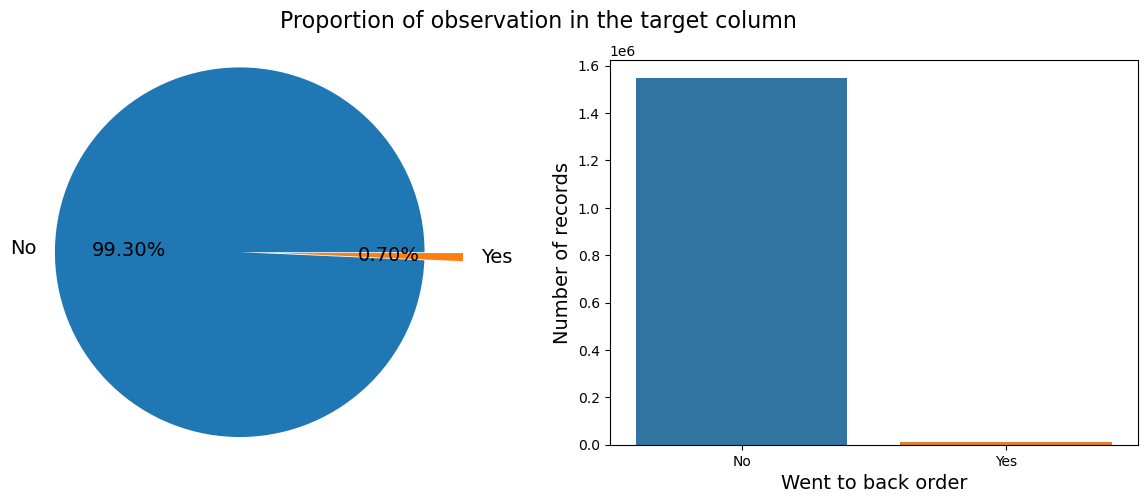

In [39]:
plt.figure(figsize=(15,5))
plt.suptitle('Proportion of observation in the target column',fontsize=16)
plt.subplot(1,2,1)
plt.pie(df3['went_on_backorder'].value_counts(),autopct='%0.2f%%',labels=df3['went_on_backorder'].value_counts().index,radius=1.2,explode=(0,0.25),textprops={'fontsize':14})

plt.subplot(1,2,2)
sns.barplot(x=df3['went_on_backorder'].value_counts().index,y=df3['went_on_backorder'].value_counts().values)
plt.xlabel('Went to back order',fontsize=14)
plt.ylabel('Number of records',fontsize=14)
plt.show()

#Our Target Variable is Highly Inbalance 99.30 % to 0.70
#hence We Cannot Rely on Accuracy as metric to evaluate the model
#we Have to use Precision, Recall and F1- score as a metric to finalise the model
#also We have to try oversmpling or undersbaling techinque to deal with this imbalance



In [40]:
print('The numerical features in the given data set are:\n',list(df3.select_dtypes(include=np.number).columns))

The numerical features in the given data set are:
 ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(1, 0, 'national_inv'),
  Text(2, 0, 'lead_time'),
  Text(3, 0, 'in_transit_qty'),
  Text(4, 0, 'forecast_3_month'),
  Text(5, 0, 'forecast_6_month'),
  Text(6, 0, 'forecast_9_month'),
  Text(7, 0, 'sales_1_month'),
  Text(8, 0, 'sales_3_month'),
  Text(9, 0, 'sales_6_month'),
  Text(10, 0, 'sales_9_month'),
  Text(11, 0, 'min_bank'),
  Text(12, 0, 'pieces_past_due'),
  Text(13, 0, 'perf_6_month_avg'),
  Text(14, 0, 'perf_12_month_avg'),
  Text(15, 0, 'local_bo_qty')])

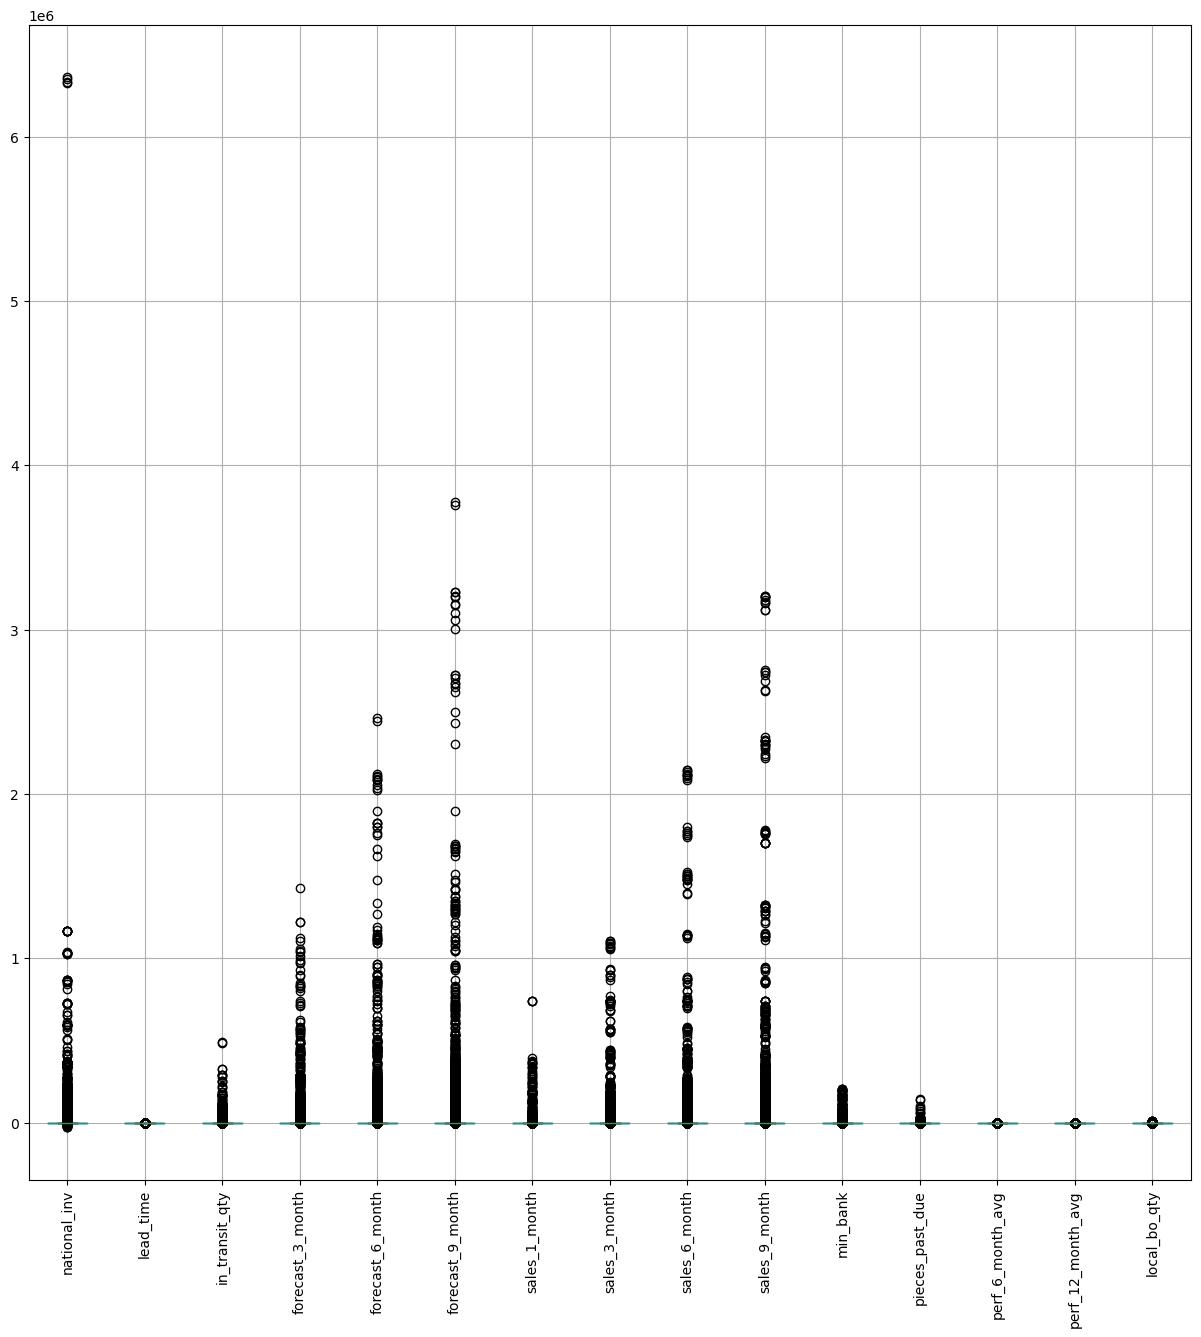

In [41]:
plt.figure(figsize=(15,15))
df3.select_dtypes(include=np.number).boxplot()
plt.xticks(rotation=90)

In [42]:
q1=df3.quantile(.25)
q3=df3.quantile(.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df_outlier=df3[((df3<ll)|(df3>ul)).any(axis=1)]
df_outlier

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
7,1045098,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,Yes,No,Yes,Yes,No,No
48,1058368,47.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,No,No,No,Yes,No,No
87,1067203,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.09,0.0,No,No,No,Yes,No,No
94,1111574,763.0,8.0,0.0,0.0,0.0,0.0,31.0,133.0,354.0,...,0.0,1.00,1.00,0.0,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687854,1392420,124.0,8.0,140.0,410.0,780.0,1240.0,128.0,464.0,849.0,...,0.0,0.85,0.90,1.0,No,No,No,Yes,No,No
1687855,1407754,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,...,0.0,0.69,0.69,5.0,Yes,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No


In [43]:
#original Shape of the data
df3.shape

(1558379, 23)

In [44]:
#shape of Outlier Consider 1.5 iqr
df_outlier.shape

(661351, 23)

In [45]:
#percentage of Oultiers 
df_outlier.shape[0]/df3.shape[0]*100

42.438392714480884

In [46]:
#chekcing the presence of positive Target Class in Target Values
df_outlier["went_on_backorder"].value_counts(normalize=True)*100


No     99.033796
Yes     0.966204
Name: went_on_backorder, dtype: float64

In [48]:
df_outlier[df_outlier["went_on_backorder"]=='Yes'].describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,6390.0,33.721596,805.584876,-2999.0,0.00,1.00,8.00,29332.0
lead_time,6390.0,6.472770,4.419517,0.0,2.00,8.00,8.00,52.0
in_transit_qty,6390.0,6.603912,48.445390,0.0,0.00,0.00,0.00,1432.0
forecast_3_month,6390.0,265.507042,2159.099079,0.0,15.00,30.00,111.00,120000.0
forecast_6_month,6390.0,414.962598,3249.004544,0.0,21.00,50.00,170.00,170880.0
forecast_9_month,6390.0,554.216745,4158.940461,0.0,26.00,66.00,218.00,207160.0
sales_1_month,6390.0,45.457433,350.550242,0.0,1.00,6.00,18.00,20005.0
sales_3_month,6390.0,123.066510,633.240211,0.0,4.00,18.00,50.00,20033.0
sales_6_month,6390.0,216.728795,1121.065528,0.0,7.00,31.00,90.00,27893.0
sales_9_month,6390.0,321.344444,1701.789409,0.0,10.00,45.00,128.00,43796.0


In [49]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,1558379.0,380.280011,11801.730926,-27256.0,4.0,14.00,76.00,6363276.0
lead_time,1558379.0,7.776917,6.737806,0.0,4.0,8.00,9.00,52.0
in_transit_qty,1558379.0,45.307003,1317.043469,0.0,0.0,0.00,0.00,489408.0
forecast_3_month,1558379.0,190.270692,5228.498624,0.0,0.0,0.00,6.00,1427612.0
forecast_6_month,1558379.0,368.360056,10187.474194,0.0,0.0,0.00,16.00,2461360.0
forecast_9_month,1558379.0,540.511448,14951.654802,0.0,0.0,0.00,26.00,3777304.0
sales_1_month,1558379.0,56.541434,1865.094313,0.0,0.0,0.00,5.00,741774.0
sales_3_month,1558379.0,177.162494,4984.670293,0.0,0.0,1.00,16.00,1105478.0
sales_6_month,1558379.0,349.587623,9676.408075,0.0,0.0,3.00,33.00,2146625.0
sales_9_month,1558379.0,539.702060,15113.808174,0.0,0.0,4.00,51.00,3205172.0


In [50]:
df_outlier[df_outlier["went_on_backorder"]=='No'].describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,654961.0,879.273916,18192.325174,-27256.0,14.00,83.00,310.00,6363276.0
lead_time,654961.0,8.571481,9.506778,0.0,4.00,8.00,8.00,52.0
in_transit_qty,654961.0,107.736618,2029.896455,0.0,0.00,1.00,16.00,489408.0
forecast_3_month,654961.0,449.106090,8054.997800,0.0,0.00,8.00,84.00,1427612.0
forecast_6_month,654961.0,870.160550,15697.158171,0.0,0.00,28.00,179.00,2461360.0
forecast_9_month,654961.0,1277.085494,23039.106232,0.0,0.00,46.00,265.00,3777304.0
sales_1_month,654961.0,133.303439,2874.954027,0.0,0.00,7.00,33.00,741774.0
sales_3_month,654961.0,417.766759,7682.160161,0.0,2.00,25.00,111.00,1105478.0
sales_6_month,654961.0,824.291556,14912.535609,0.0,4.00,51.00,226.00,2146625.0
sales_9_month,654961.0,1272.749542,23292.735262,0.0,6.00,77.00,344.00,3205172.0


In [51]:
df_Out_cleaned=df3[~((df3<ll)|(df3>ul)).any(axis=1)]

In [52]:
df_Out_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,897028.0,18.410551,28.700970,-10.00,3.00,8.00,19.00,184.0
lead_time,897028.0,7.206059,3.455557,0.00,4.00,8.00,9.00,16.0
in_transit_qty,897028.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.0
forecast_3_month,897028.0,0.747230,2.353580,0.00,0.00,0.00,0.00,15.0
forecast_6_month,897028.0,1.640686,4.766722,0.00,0.00,0.00,0.00,40.0
forecast_9_month,897028.0,2.607559,7.369089,0.00,0.00,0.00,0.00,65.0
sales_1_month,897028.0,0.572954,1.426351,0.00,0.00,0.00,0.00,12.0
sales_3_month,897028.0,1.871716,4.033793,0.00,0.00,0.00,2.00,40.0
sales_6_month,897028.0,3.931082,8.196907,0.00,0.00,0.00,4.00,82.0
sales_9_month,897028.0,6.026181,12.453138,0.00,0.00,1.00,6.00,127.0


Regarding The Outliers We Tried TO see What are the Data That is beyond 3 Standard Deviations away by Fixing the Upper Limit and Lower Limit
at 3 standard Deviation

we found around 6 Lakhs Number of rows are Outliers thats around 42 % of the Total Training data,

Since that is a signifcant amount of information which also included a good number of positve Class,
it is not decided to Remove The Outliers as Such.

WE Can Build the Base Model With this Data and Later do some scaling or transformation like Robust Scaler or 

# UNIVARIATE ANALYSIS and Bivariate Analysis on Numerical Columns

In [53]:
df3[df3["national_inv"]<0].shape[0]

5351

In [54]:
#there are close to five thousand Negative values in Inventory whcih is technincally possible so we are retaining it.

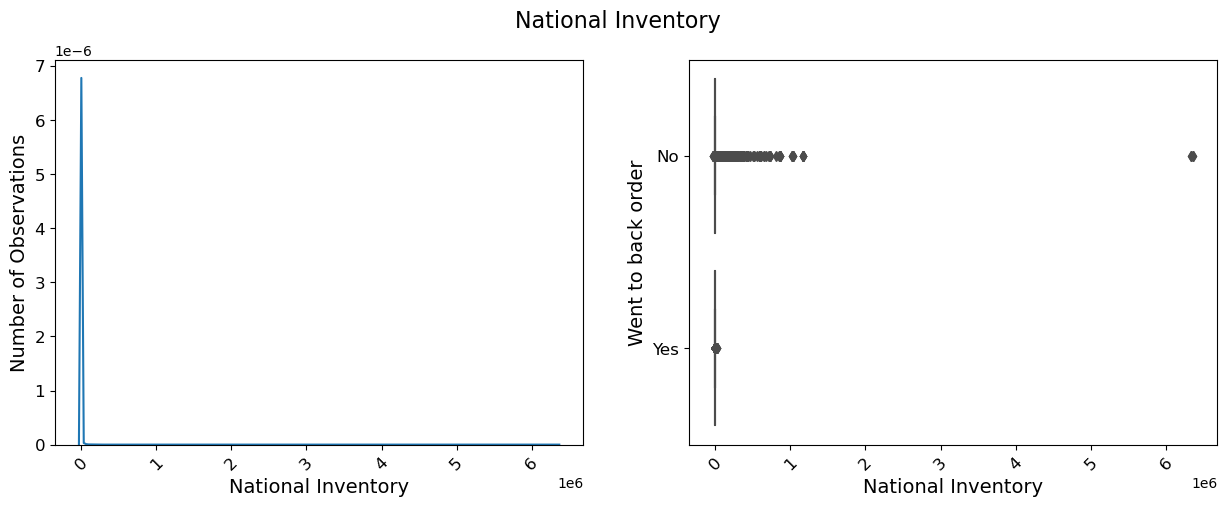

In [55]:
plt.figure(figsize=(15,5))
plt.suptitle('National Inventory',fontsize=16)
plt.subplot(1,2,1)
sns.kdeplot(df3['national_inv'])
plt.xlabel('National Inventory',fontsize=14)
plt.ylabel('Number of Observations',fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(x='national_inv',y='went_on_backorder',data=df3,color='b')
plt.xlabel('National Inventory',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

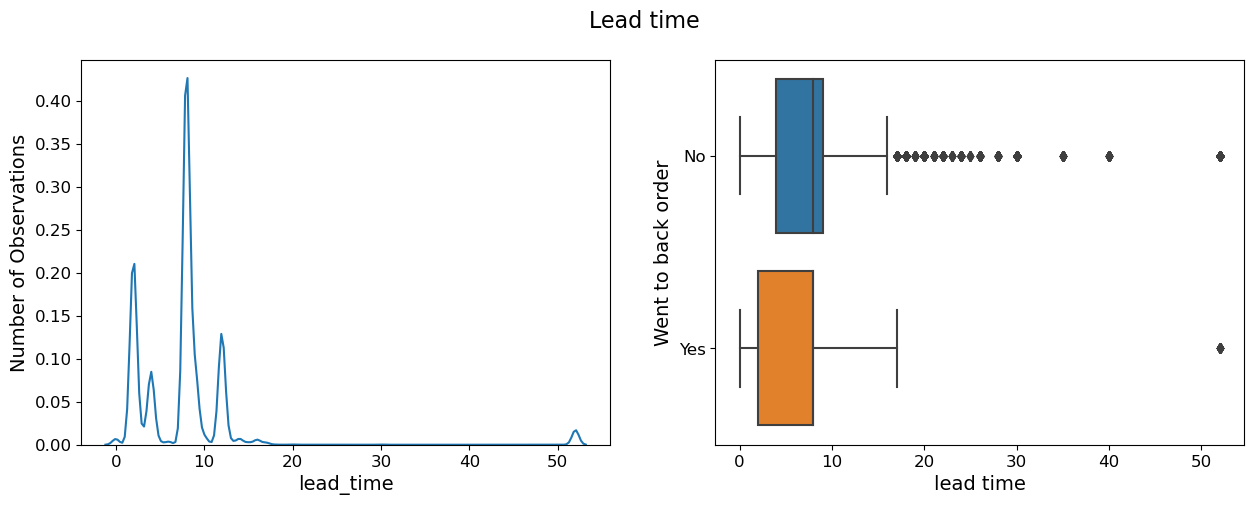

In [56]:
plt.figure(figsize=(15,5))
plt.suptitle('Lead time',fontsize=16)
plt.subplot(1,2,1)
sns.kdeplot(df3['lead_time'])
plt.xlabel('lead_time',fontsize=14)
plt.ylabel('Number of Observations',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(x='lead_time',y='went_on_backorder',data=df3)
plt.xlabel('lead time',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

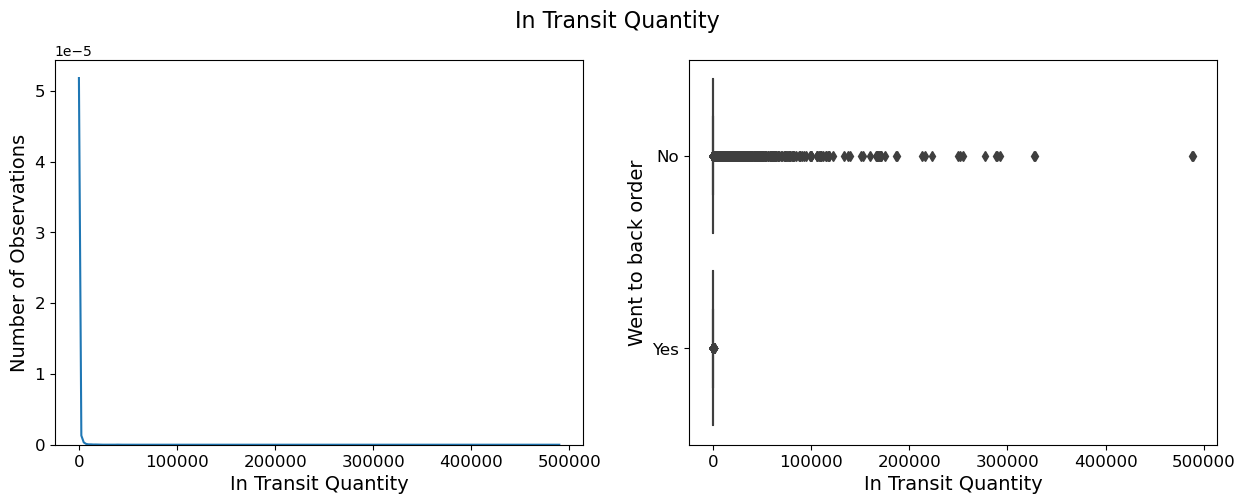

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.suptitle('In Transit Quantity',fontsize=16)
sns.kdeplot(df3['in_transit_qty'])
plt.xlabel('In Transit Quantity',fontsize=14)
plt.ylabel('Number of Observations',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(x='in_transit_qty',y='went_on_backorder',data=df3)
plt.xlabel('In Transit Quantity',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

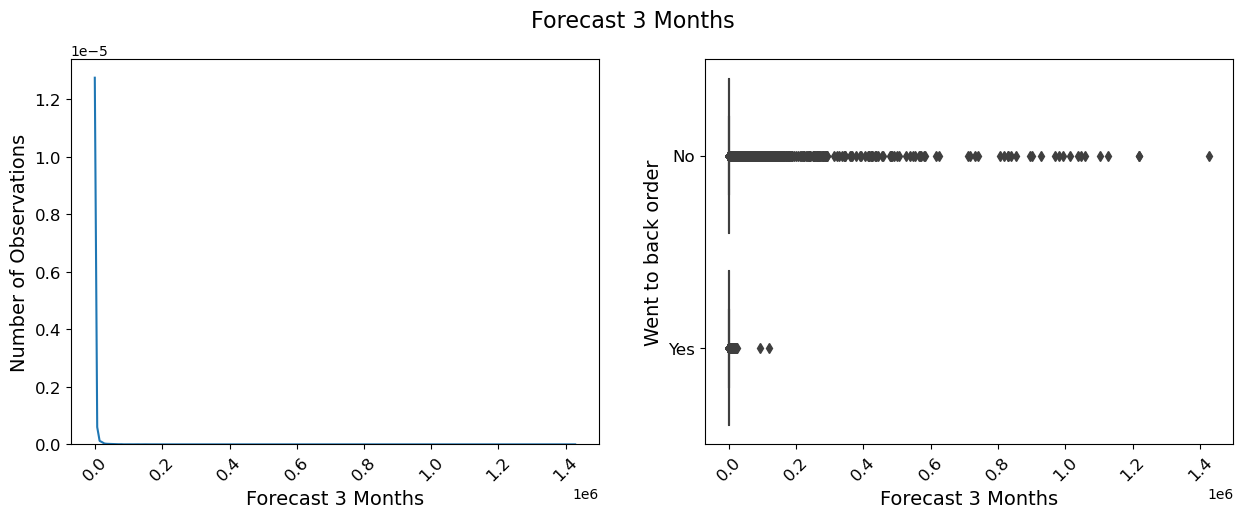

In [58]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.suptitle('Forecast 3 Months',fontsize=16)
sns.kdeplot(df3['forecast_3_month'])
plt.xlabel('Forecast 3 Months',fontsize=14)
plt.ylabel('Number of Observations',fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(x='forecast_3_month',y='went_on_backorder',data=df3)
plt.xlabel('Forecast 3 Months',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

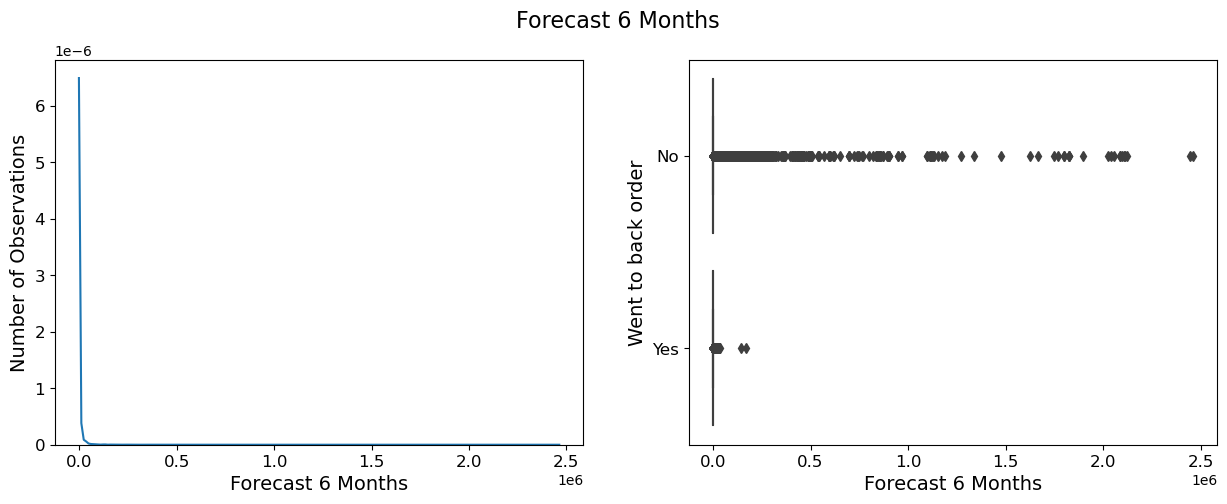

In [59]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.suptitle('Forecast 6 Months',fontsize=16)
sns.kdeplot(df3['forecast_6_month'])
plt.xlabel('Forecast 6 Months',fontsize=14)
plt.ylabel('Number of Observations',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 

plt.subplot(1,2,2)
sns.boxplot(x='forecast_6_month',y='went_on_backorder',data=df3)
plt.xlabel('Forecast 6 Months',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

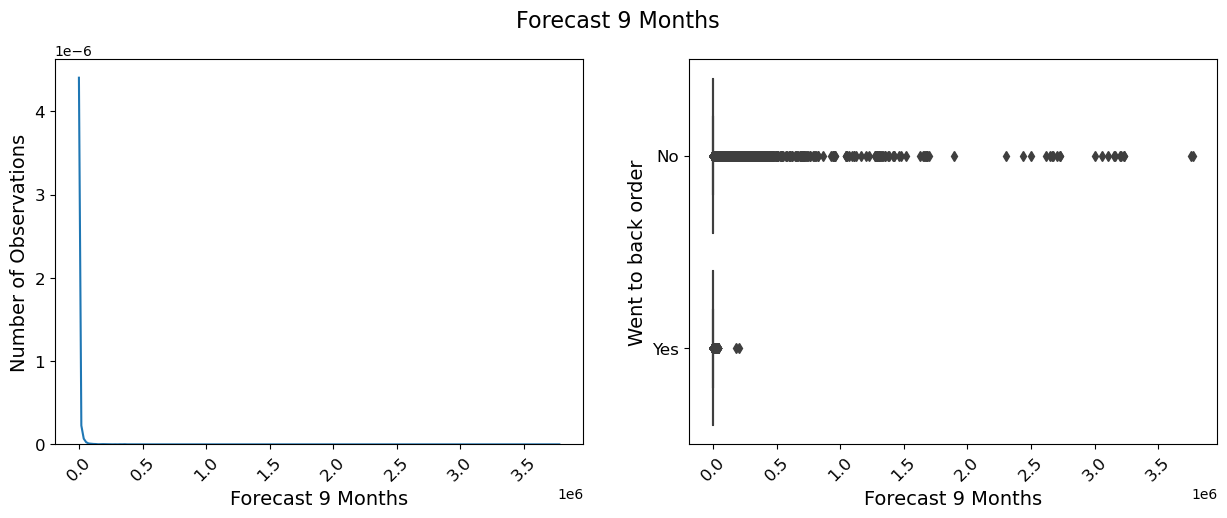

In [60]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.suptitle('Forecast 9 Months',fontsize=16)
sns.kdeplot(df3['forecast_9_month'])
plt.xlabel('Forecast 9 Months',fontsize=14)
plt.ylabel('Number of Observations',fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(x='forecast_9_month',y='went_on_backorder',data=df3)
plt.xlabel('Forecast 9 Months',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

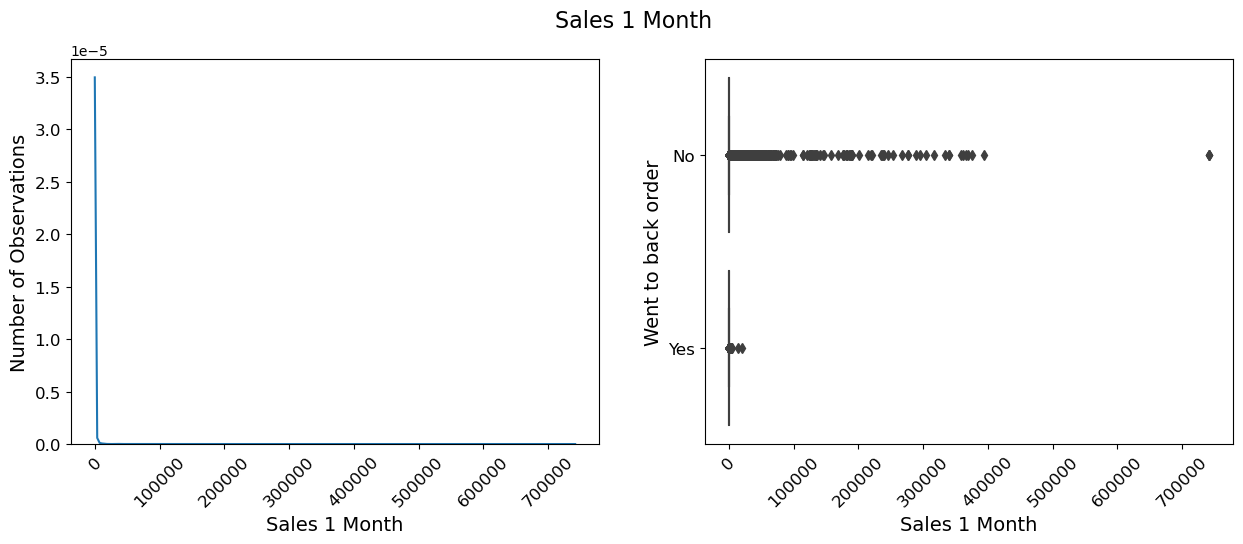

In [61]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.suptitle('Sales 1 Month',fontsize=16)
sns.kdeplot(df3['sales_1_month'])
plt.xlabel('Sales 1 Month',fontsize=14)
plt.ylabel('Number of Observations',fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(x='sales_1_month',y='went_on_backorder',data=df3)
plt.xlabel('Sales 1 Month',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

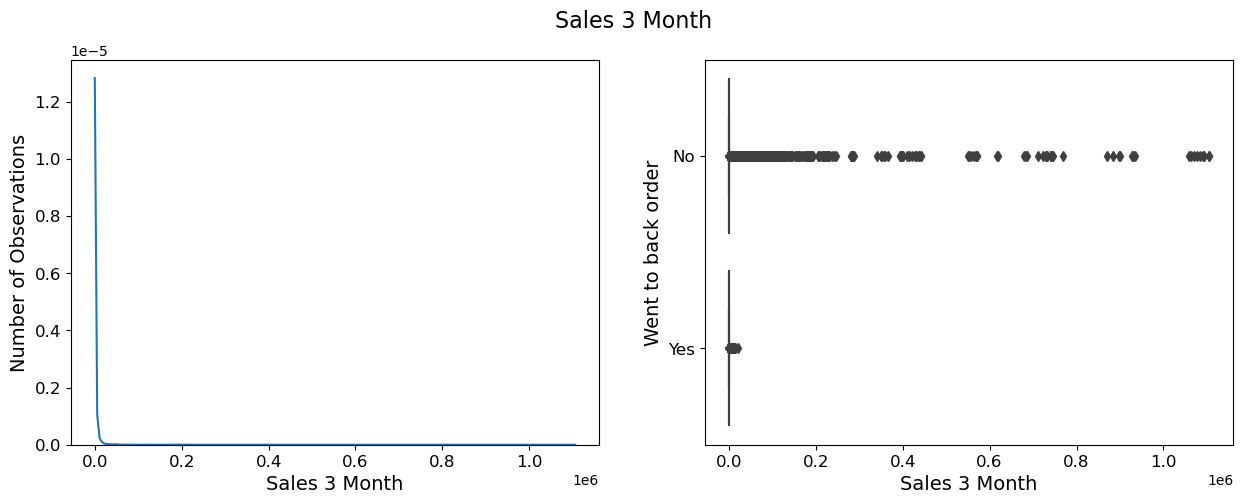

In [62]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.suptitle('Sales 3 Month',fontsize=16)
sns.kdeplot(df3['sales_3_month'])
plt.xlabel('Sales 3 Month',fontsize=14)
plt.ylabel('Number of Observations',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(x='sales_3_month',y='went_on_backorder',data=df3)
plt.xlabel('Sales 3 Month',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

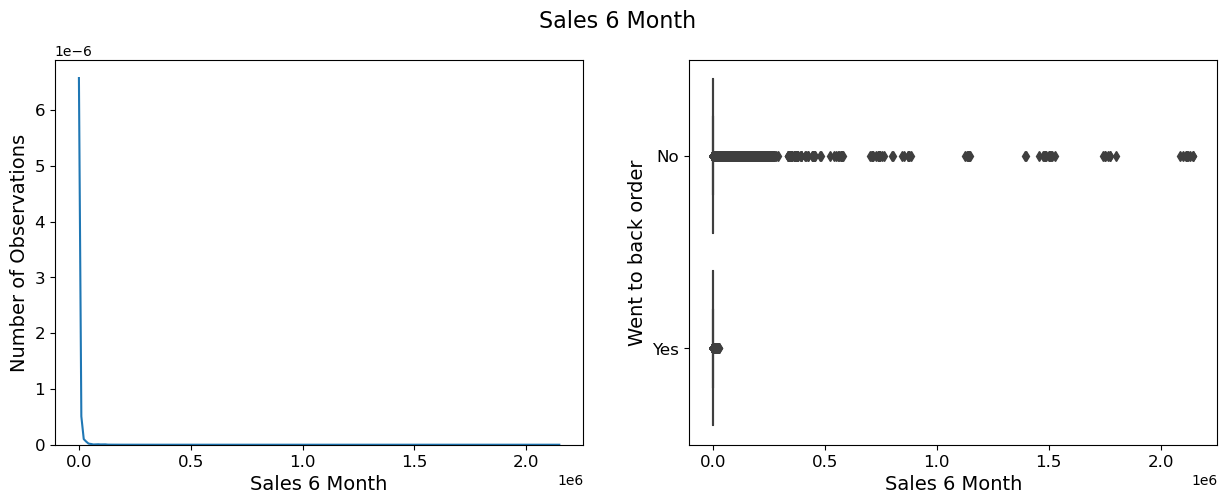

In [63]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.suptitle('Sales 6 Month',fontsize=16)
sns.kdeplot(df3['sales_6_month'])
plt.xlabel('Sales 6 Month',fontsize=14)
plt.ylabel('Number of Observations',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(x='sales_6_month',y='went_on_backorder',data=df3)
plt.xlabel('Sales 6 Month',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

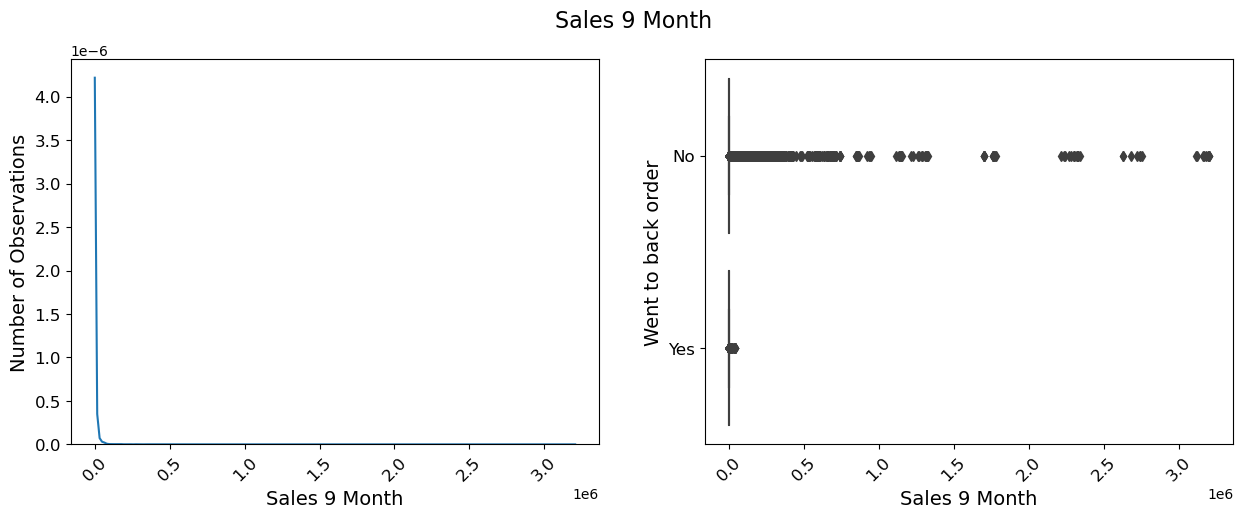

In [64]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.suptitle('Sales 9 Month',fontsize=16)
sns.kdeplot(df3['sales_9_month'])
plt.xlabel('Sales 9 Month',fontsize=14)
plt.ylabel('Number of Observations',fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(x='sales_9_month',y='went_on_backorder',data=df3)
plt.xlabel('Sales 9 Month',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

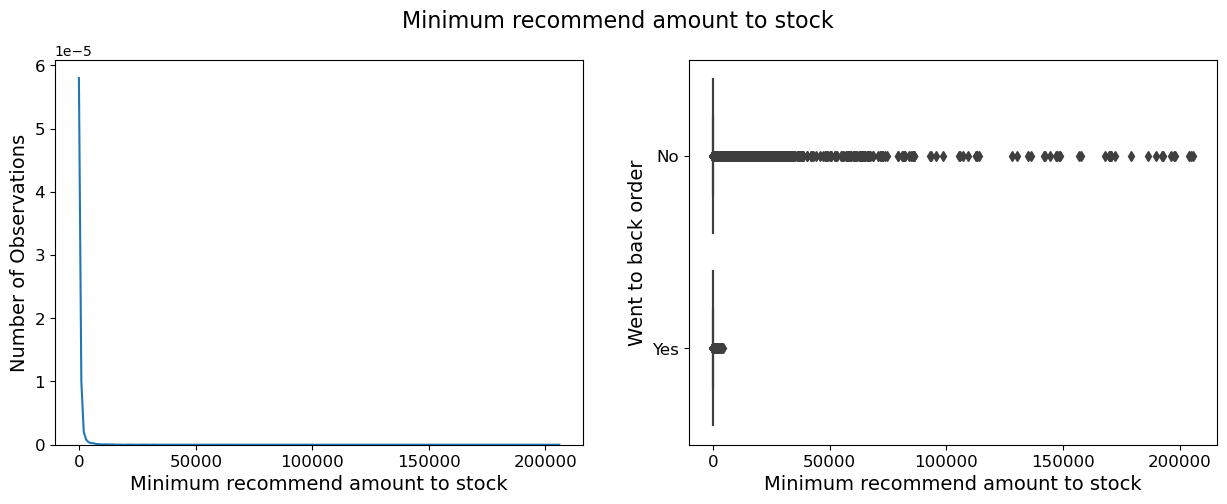

In [65]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.suptitle('Minimum recommend amount to stock',fontsize=16)
sns.kdeplot(df3['min_bank'])
plt.xlabel('Minimum recommend amount to stock',fontsize=14)
plt.ylabel('Number of Observations',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(x='min_bank',y='went_on_backorder',data=df3)
plt.xlabel('Minimum recommend amount to stock',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

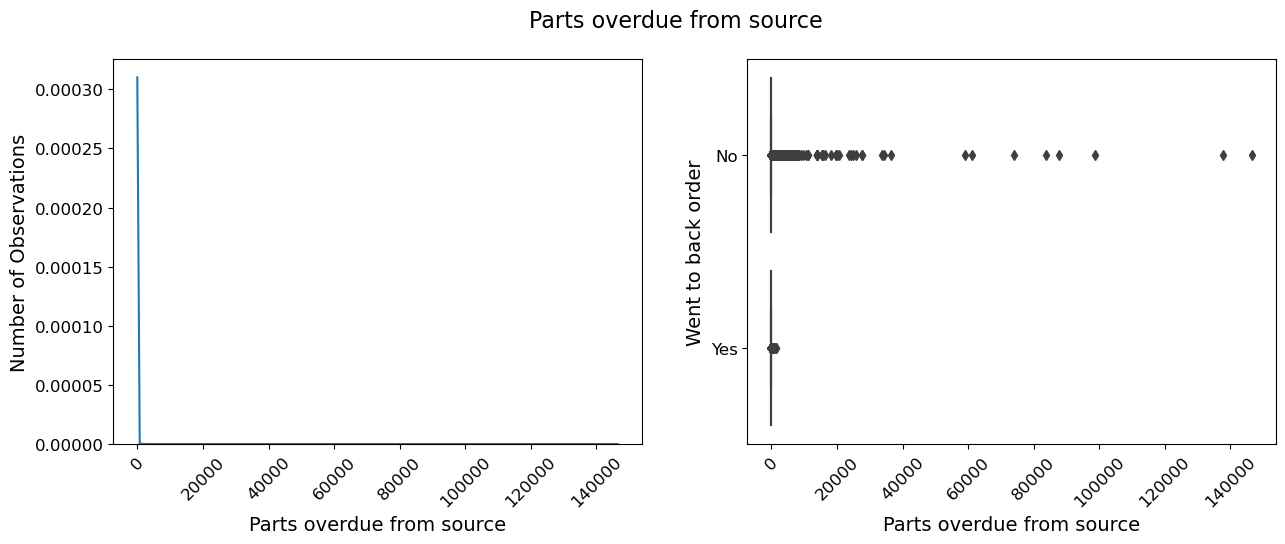

In [66]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.suptitle('Parts overdue from source',fontsize=16)
sns.kdeplot(df3['pieces_past_due'])
plt.xlabel('Parts overdue from source',fontsize=14)
plt.ylabel('Number of Observations',fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(x='pieces_past_due',y='went_on_backorder',data=df3)
plt.xlabel('Parts overdue from source',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

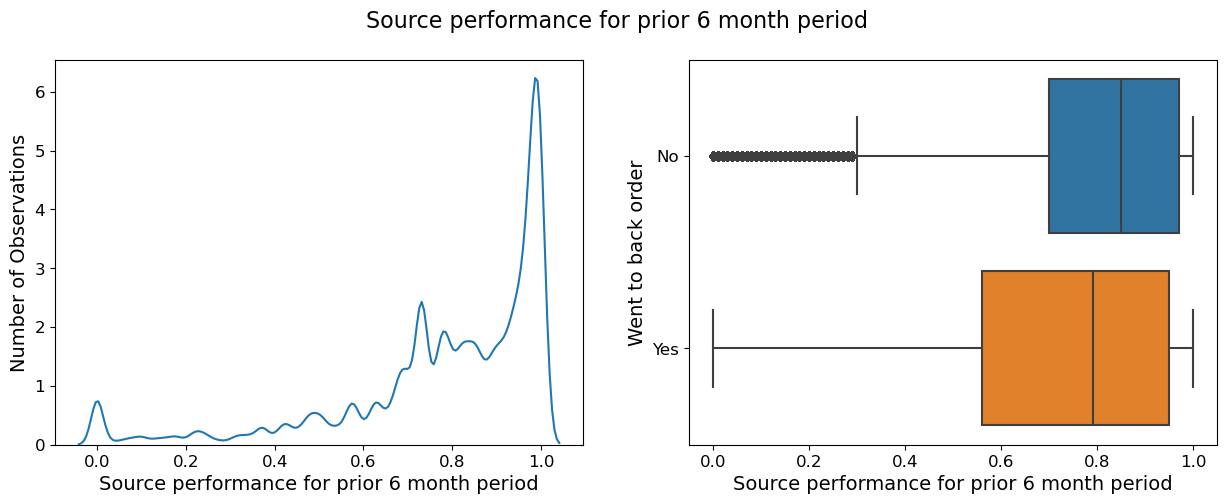

In [67]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.suptitle('Source performance for prior 6 month period',fontsize=16)
sns.kdeplot(df3['perf_6_month_avg'])
plt.xlabel('Source performance for prior 6 month period',fontsize=14)
plt.ylabel('Number of Observations',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(x='perf_6_month_avg',y='went_on_backorder',data=df3)
plt.xlabel('Source performance for prior 6 month period',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

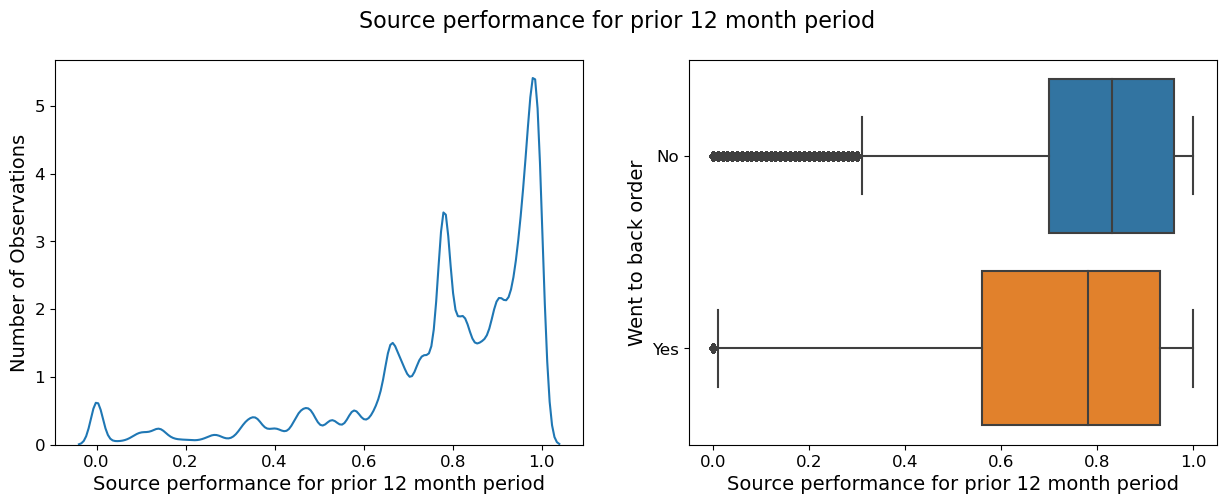

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.suptitle('Source performance for prior 12 month period',fontsize=16)
sns.kdeplot(df3['perf_12_month_avg'])
plt.xlabel('Source performance for prior 12 month period',fontsize=14)
plt.ylabel('Number of Observations',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(x='perf_12_month_avg',y='went_on_backorder',data=df3)
plt.xlabel('Source performance for prior 12 month period',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [69]:
df3.skew()

sku                    0.402154
national_inv         412.505426
lead_time              4.638502
in_transit_qty       169.970409
forecast_3_month     133.728304
forecast_6_month     133.766214
forecast_9_month     138.022697
sales_1_month        207.303083
sales_3_month        141.146844
sales_6_month        141.579828
sales_9_month        135.781545
min_bank             108.541131
pieces_past_due      400.474962
perf_6_month_avg      -1.584981
perf_12_month_avg     -1.622315
local_bo_qty         168.256031
dtype: float64

<Figure size 1500x800 with 0 Axes>

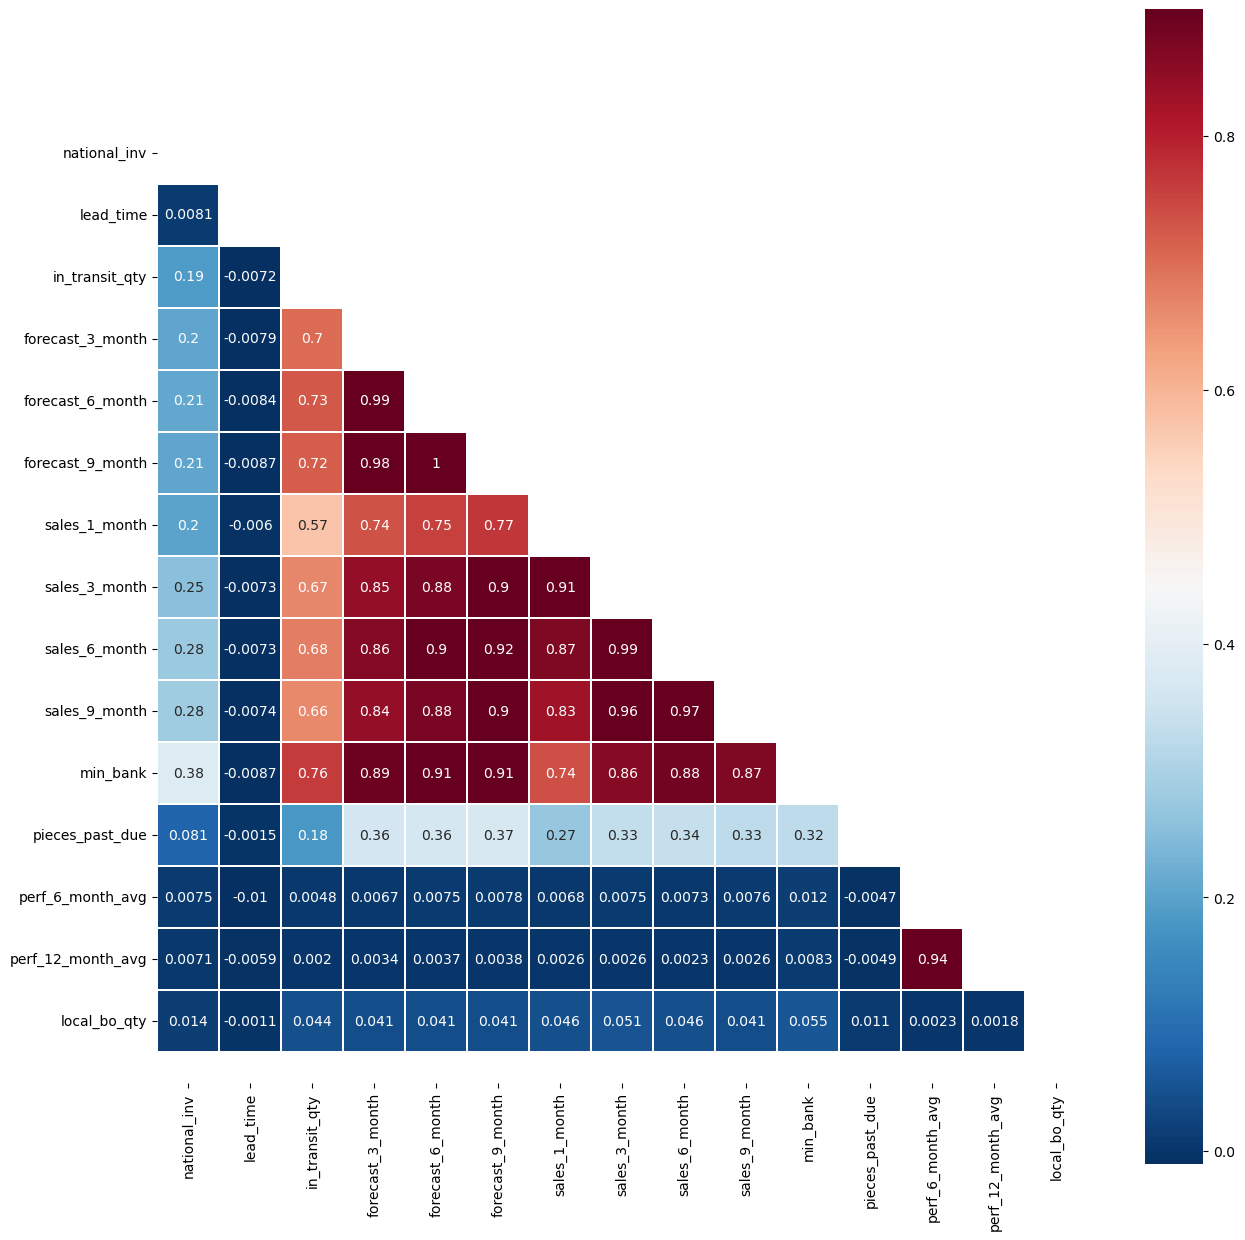

In [70]:
plt.figure(figsize=(15,8))
mask=np.zeros_like(df3.corr())
mask[np.triu_indices_from(mask)]=1
fig,ax= plt.subplots()
fig.set_size_inches(15,15)

sns.heatmap(df3.corr(),annot=True,mask=mask,square=True,linewidths=0.1,linecolor='white',vmax = .9,cmap = 'RdBu_r')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [71]:
df3.corr()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
national_inv,1.000000,0.008099,0.188246,0.204429,0.207705,0.205273,0.201463,0.253625,0.275908,0.283052,0.381026,0.080501,0.007493,0.007094,0.014016
lead_time,0.008099,1.000000,-0.007187,-0.007892,-0.008429,-0.008664,-0.005993,-0.007300,-0.007313,-0.007373,-0.008728,-0.001473,-0.010320,-0.005918,-0.001121
in_transit_qty,0.188246,-0.007187,1.000000,0.702132,0.729055,0.720137,0.573700,0.665423,0.679486,0.663920,0.761818,0.178260,0.004849,0.002046,0.043630
forecast_3_month,0.204429,-0.007892,0.702132,1.000000,0.990723,0.977822,0.736267,0.846631,0.863755,0.843395,0.892043,0.362445,0.006743,0.003403,0.040617
forecast_6_month,0.207705,-0.008429,0.729055,0.990723,1.000000,0.995003,0.754951,0.876638,0.897492,0.876944,0.909056,0.364624,0.007508,0.003715,0.041153
forecast_9_month,0.205273,-0.008664,0.720137,0.977822,0.995003,1.000000,0.770844,0.899796,0.922310,0.901319,0.906093,0.367636,0.007793,0.003753,0.041255
sales_1_month,0.201463,-0.005993,0.573700,0.736267,0.754951,0.770844,1.000000,0.908026,0.869891,0.831151,0.736609,0.269540,0.006803,0.002555,0.046462
sales_3_month,0.253625,-0.007300,0.665423,0.846631,0.876638,0.899796,0.908026,1.000000,0.988509,0.955172,0.860220,0.331486,0.007522,0.002633,0.051052
sales_6_month,0.275908,-0.007313,0.679486,0.863755,0.897492,0.922310,0.869891,0.988509,1.000000,0.973518,0.884866,0.335847,0.007345,0.002279,0.046300
sales_9_month,0.283052,-0.007373,0.663920,0.843395,0.876944,0.901319,0.831151,0.955172,0.973518,1.000000,0.869576,0.325889,0.007588,0.002641,0.041132


## Categorical Variables

In [72]:
print('The categorical columns in the dataset are as follow:\n',list(df3.select_dtypes(include='object').columns))

The categorical columns in the dataset are as follow:
 ['sku', 'potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']


### 1. Potential Issues

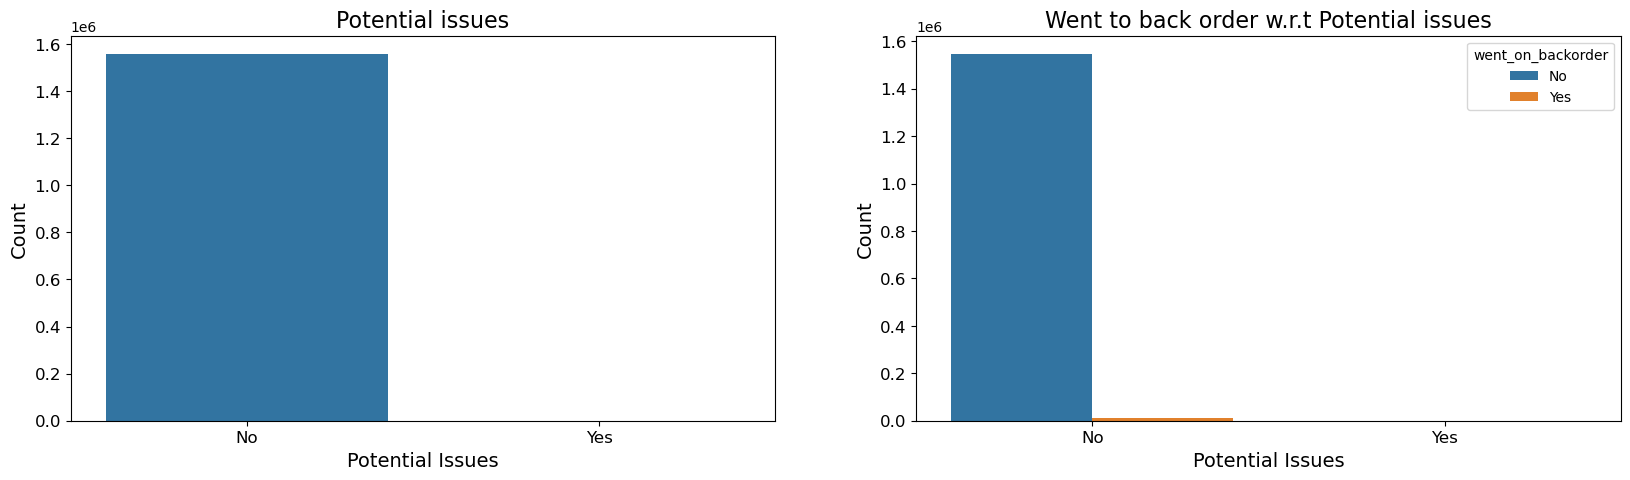

In [73]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='potential_issue',data=df3)
plt.title('Potential issues',fontsize=16)
plt.xlabel('Potential Issues',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.countplot(x='potential_issue',hue='went_on_backorder',data=df3)
plt.title('Went to back order w.r.t Potential issues',fontsize=16)
plt.xlabel('Potential Issues',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



In [74]:
pd.DataFrame(df3['potential_issue'].value_counts())

,potential_issue
No,1557499
Yes,880


### 2. Deck RIsk

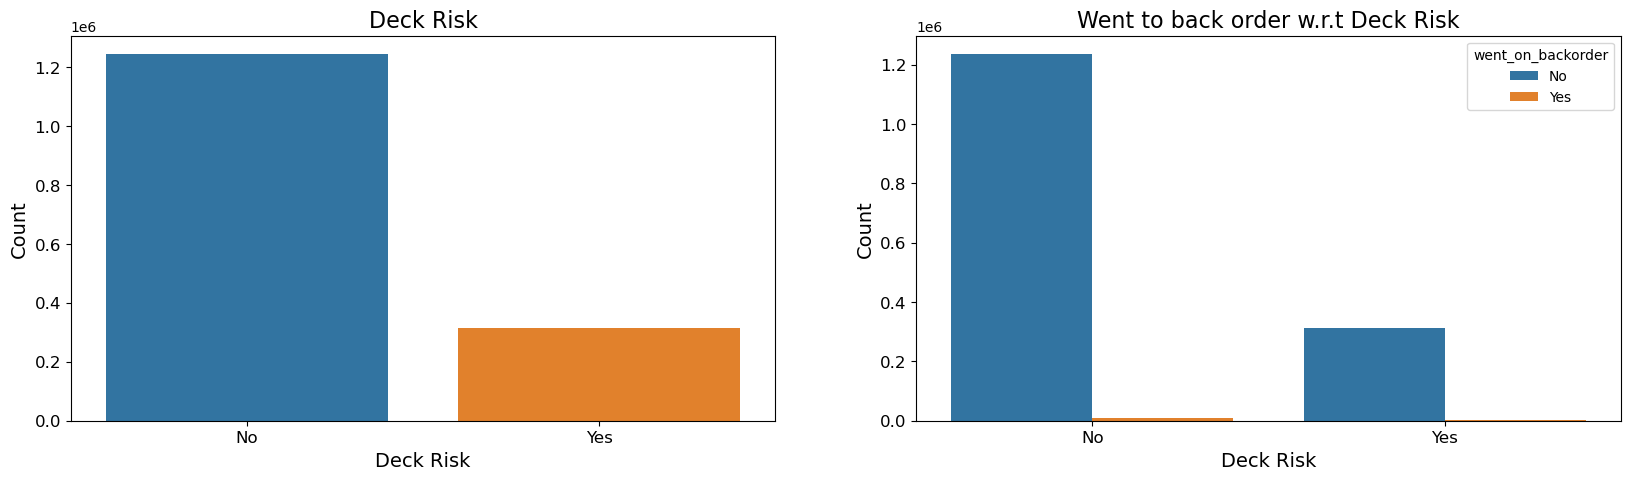

In [75]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='deck_risk',data=df3)
plt.title('Deck Risk',fontsize=16)
plt.xlabel('Deck Risk',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.countplot(x='deck_risk',hue='went_on_backorder',data=df3)
plt.title('Went to back order w.r.t Deck Risk',fontsize=16)
plt.xlabel('Deck Risk',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



In [76]:
pd.DataFrame(df3['deck_risk'].value_counts())

,deck_risk
No,1244369
Yes,314010


### 3. OE Constraint

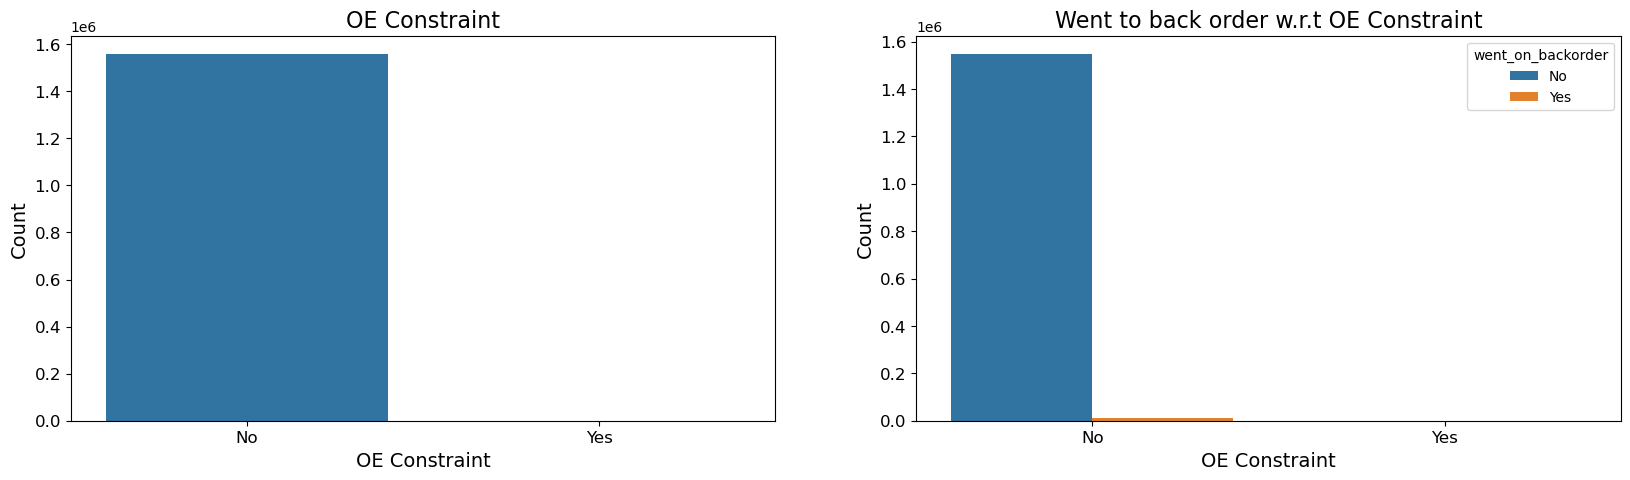

In [77]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='oe_constraint',data=df3)
plt.title('OE Constraint',fontsize=16)
plt.xlabel('OE Constraint',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.countplot(x='oe_constraint',hue='went_on_backorder',data=df3)
plt.title('Went to back order w.r.t OE Constraint',fontsize=16)
plt.xlabel('OE Constraint',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



In [78]:
pd.DataFrame(df3['oe_constraint'].value_counts())

,oe_constraint
No,1558134
Yes,245


### 4. PPAP Risk

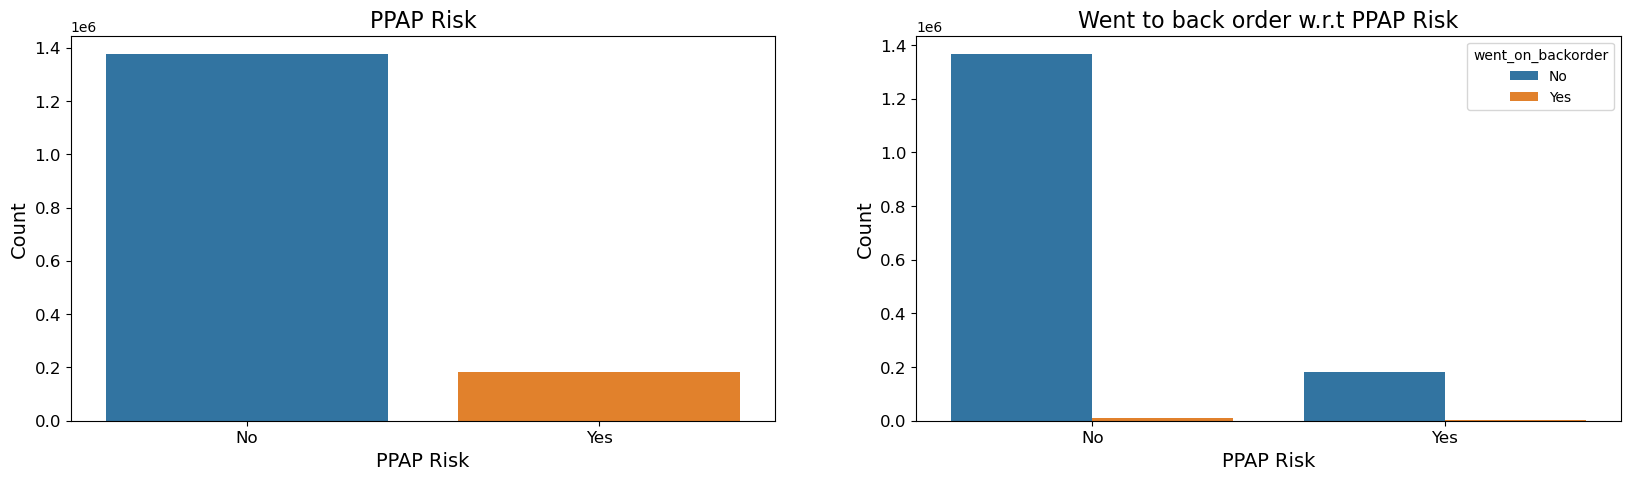

In [79]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='ppap_risk',data=df3)
plt.title('PPAP Risk',fontsize=16)
plt.xlabel('PPAP Risk',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.countplot(x='ppap_risk',hue='went_on_backorder',data=df3)
plt.title('Went to back order w.r.t PPAP Risk',fontsize=16)
plt.xlabel('PPAP Risk',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



In [80]:
pd.DataFrame(df3['ppap_risk'].value_counts())

,ppap_risk
No,1375833
Yes,182546


### 5. Stop Auto Buy

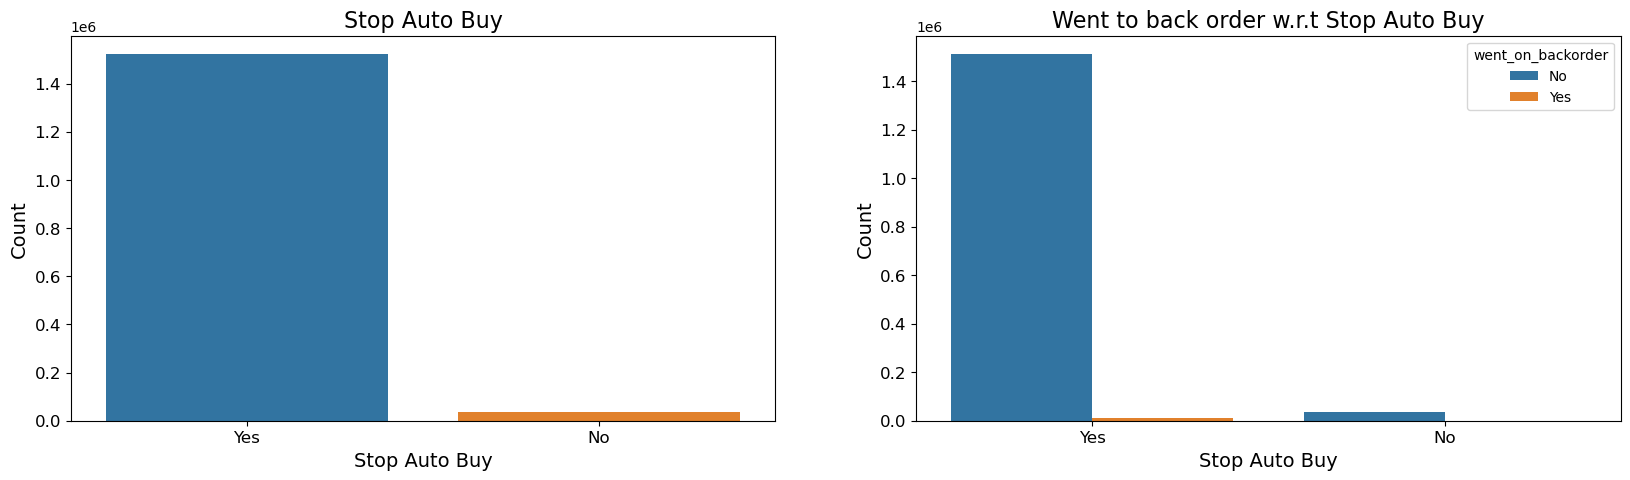

In [81]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='stop_auto_buy',data=df3)
plt.title('Stop Auto Buy',fontsize=16)
plt.xlabel('Stop Auto Buy',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.countplot(x='stop_auto_buy',hue='went_on_backorder',data=df3)
plt.title('Went to back order w.r.t Stop Auto Buy',fontsize=16)
plt.xlabel('Stop Auto Buy',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



In [82]:
pd.DataFrame(df3['stop_auto_buy'].value_counts())

,stop_auto_buy
Yes,1522963
No,35416


### 6. Rev Stop

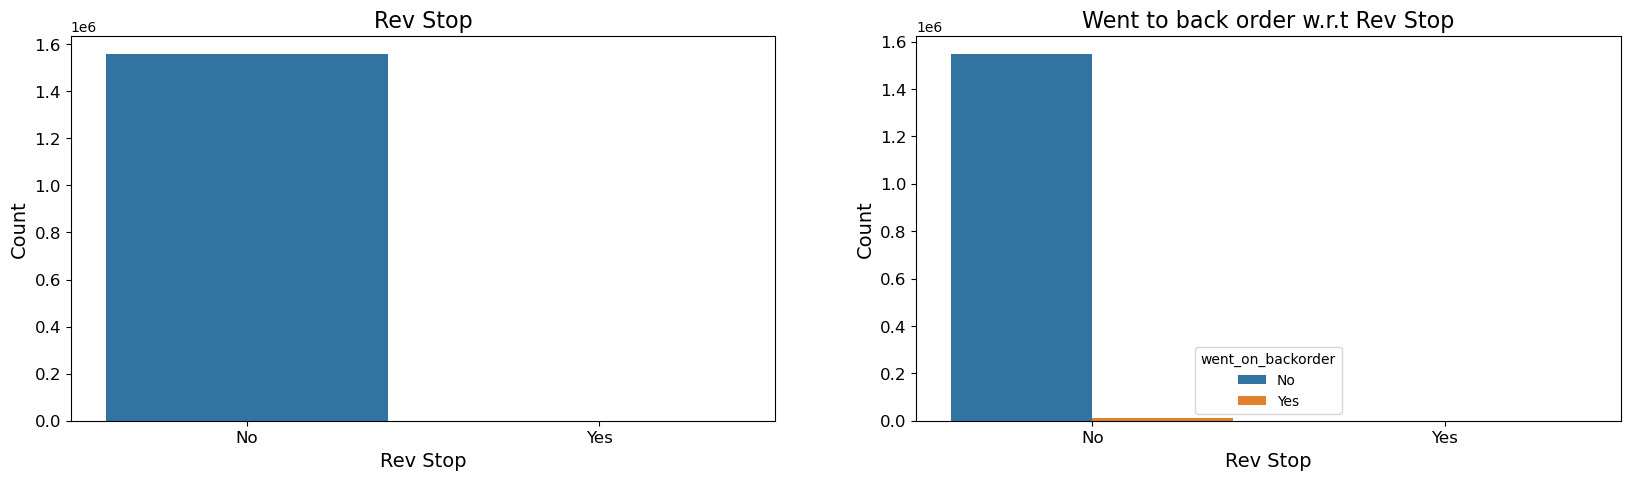

In [83]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='rev_stop',data=df3)
plt.title('Rev Stop',fontsize=16)
plt.xlabel('Rev Stop',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.countplot(x='rev_stop',hue='went_on_backorder',data=df3)
plt.title('Went to back order w.r.t Rev Stop',fontsize=16)
plt.xlabel('Rev Stop',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



In [84]:
pd.DataFrame(df3['rev_stop'].value_counts())

,rev_stop
No,1558010
Yes,369


In [85]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

print('H0: The proportion is same')
print('HA: The proportion is not same\n')
for i in df3.drop(["sku","went_on_backorder"],axis=1).select_dtypes(include='object'):
    sa = dict(df3[i].value_counts())
    po = dict(df3["went_on_backorder"].value_counts())
    x = [sa['Yes'],po['Yes']]
    n = [sa['Yes']+sa['No'],po['Yes']+po['No']]
    t,p = proportions_ztest(x,n)
    if p<0.05:
        print('Reject H0, proportion of',i,'in Yes is not statistically same as proportion of',i,'in No.\n')
    else:
        print('Accept H0, proportion of',i,'in Yes is statistically same as proportion of',i,'in No. \n')

H0: The proportion is same
HA: The proportion is not same

Reject H0, proportion of potential_issue in Yes is not statistically same as proportion of potential_issue in No.

Reject H0, proportion of deck_risk in Yes is not statistically same as proportion of deck_risk in No.

Reject H0, proportion of oe_constraint in Yes is not statistically same as proportion of oe_constraint in No.

Reject H0, proportion of ppap_risk in Yes is not statistically same as proportion of ppap_risk in No.

Reject H0, proportion of stop_auto_buy in Yes is not statistically same as proportion of stop_auto_buy in No.

Reject H0, proportion of rev_stop in Yes is not statistically same as proportion of rev_stop in No.



From this Statistical tests we can Infer that All categorical Columns are statistically Significant.

In [457]:
numeric=df3.select_dtypes(include=np.number).columns

sku                    0.402154
national_inv         412.505426
lead_time              4.638502
in_transit_qty       169.970409
forecast_3_month     133.728304
forecast_6_month     133.766214
forecast_9_month     138.022697
sales_1_month        207.303083
sales_3_month        141.146844
sales_6_month        141.579828
sales_9_month        135.781545
min_bank             108.541131
pieces_past_due      400.474962
perf_6_month_avg      -1.584981
perf_12_month_avg     -1.622315
local_bo_qty         168.256031
dtype: float64


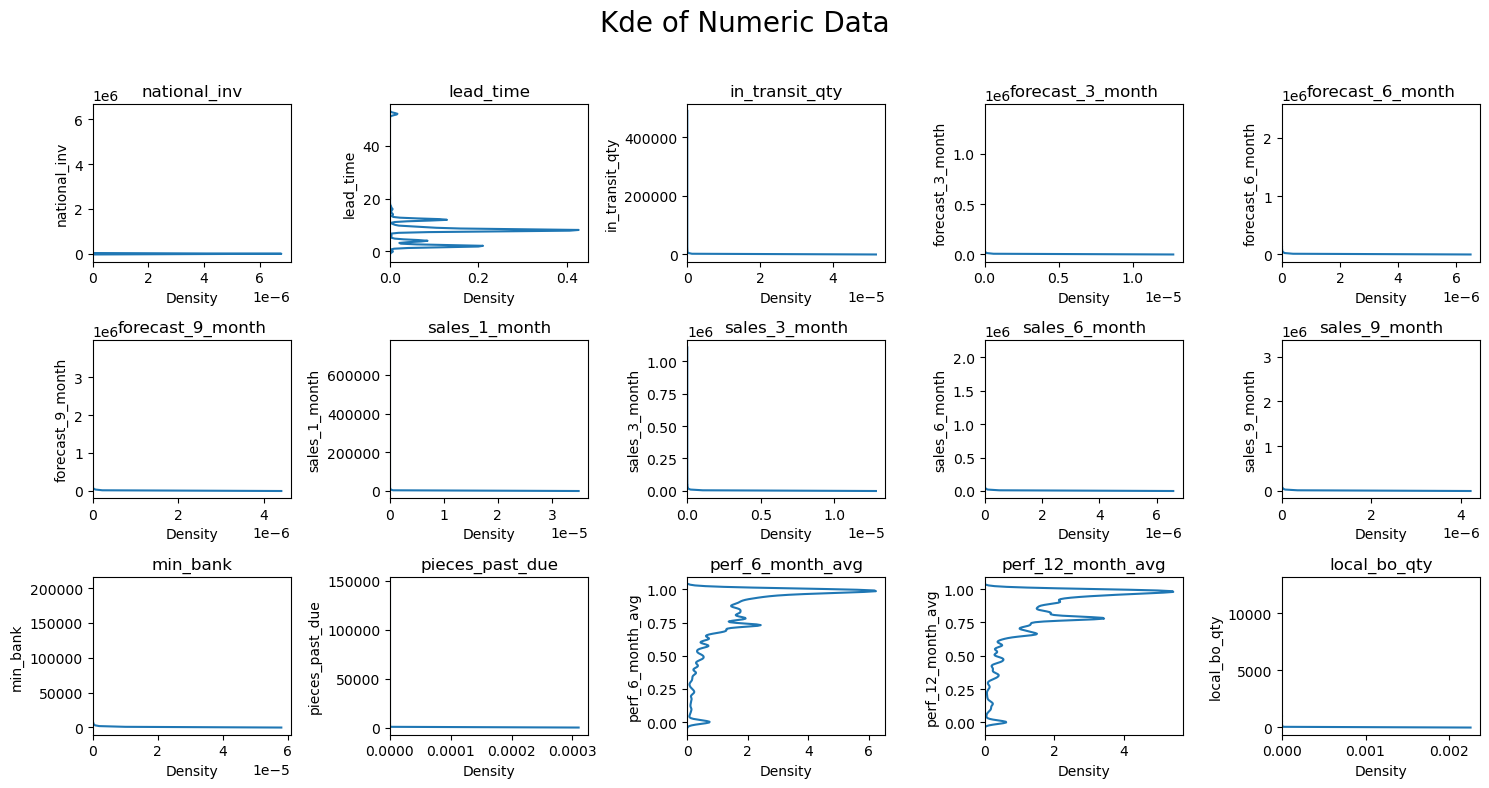

In [458]:
# Create a figure and axes for the subplots
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(15, 8))

# Flatten the axes array so we can iterate over it
axs = axs.flatten()

# Loop through each column and create a boxplot on a separate subplot
for i, col in enumerate(numeric):
    sns.kdeplot(data=df3,y=col, ax=axs[i])
    axs[i].set_title(col)
    
# Set the overall title for the subplots
fig.suptitle("Kde of Numeric Data\n", fontsize=20)
print(df3.skew())
# Adjust the layout of the subplots
plt.tight_layout()

# Display the subplots
plt.show()

In [ ]:
# select categorical columns
categorical = df3.select_dtypes(exclude=[np.number]).columns.to_list()
# Create a figure with subplots for each categorical variable
fig, axs = plt.subplots(2, len(categorical), figsize=(20,5))

# Loop over each categorical variable and plot the frequency and percentage of each category
for i, j in enumerate(categorical):
    # Count the frequency of each category in the variable
    category_counts = df3[j].value_counts()

    # Plot the frequency of each category in a bar chart on the first subplot
    category_counts.plot(kind='bar', ax=axs[0,i])
    axs[0,i].set_title(f'{j}')
    axs[0,i].set_xlabel('Category')
    axs[0,i].set_ylabel('Count')
      # Plot the percentage of each category in a pie chart on the second subplot
    category_counts.plot(kind='pie', ax=axs[1,i], autopct='%1.1f%%')
    axs[1,i].set_title(f'{j}')

    # Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

In [87]:
###### # EDA INFERENCE
#After Visualising the Distribution of the Data it is observed that almost all features Extemenly Right Skewed,
#So we Cannot Use any Linear Models
#The Major Observation After Doing the EDA Are:

#1)Class Imbalance 99.3 % data is of Class No, 0.7 % is of classs "No".
#2)Statistical Test on Train and Test Data Was Done and their Distribution was Not Similar,
#3)We Did Univariate Analysis on Each Categorical And Numerical Variables and found that except one Numerical Column all
#other Fetaures were statistically significant.
#3)WE Visualised the same and understood the distribution of the data,
#4)We Found that Several Numerical Features were lineraly correlated among themselves- Severe Multicollineraity Existed,
#5)Skewness of the Numerical Features- The features were heighly skewed,
#6)Precense of Ouliers- Our data has Signicant amount of Outliers above 3 Standard Deviations,
#   We found there is close to Six Lakhs rows of Outliers amounting to around 42 % of the total Rows contains some features with 
##   ouliers.
#7)Already we have very less Examples of Positive Target Class hence it is not adviSable to remove that rows.
#8)Since the data doesn't satisfy the asssumption of linear Models,Non Parmetric Models Seems to be more feascible.
#9)We can Dummy Encode the Categorical Columns and go ahead with CART, Dicsion Treee or Some Ensamble Modes Like Random Forest
#or Xgboost
#10)To Deal with The Class Imbalnce we Can try Oversambling using SMOTE so that there is equal number of Examples for yes Class 
#as Well as No Class






In [88]:
#since it is computationally expensive to work with 15 Lakhs rows , it is decided to take a sample of 10% and work on it after 
#proving it is staistically similar.

In [89]:
sample = df3.sample(frac=0.1,random_state=1)

In [90]:
sample.shape

(155838, 23)

In [91]:
sample["went_on_backorder"].value_counts(normalize=True)*100


No     99.301197
Yes     0.698803
Name: went_on_backorder, dtype: float64

#The Class Distribution is 99.3 for Negative and .7 for Test.

CHECKING THE STATISTICAL SIMILARITY OF Sample and Population.
if the feature is normally Distributed we used Ttest independent else we Used Mannwhitneyu Test

In [92]:
for i in df3.select_dtypes(include=np.number):
    t1,p1 = jarque_bera(sample[i])
    t2,p2 = jarque_bera(df3[i])
    if p1<0.05 or p2<0.05:
        t3,p3 = mannwhitneyu(sample[i],df3[i])
        if p3<0.05:
            print('Mean',i,'is not same for sample and df')
        else:
            print('Mean',i,'is same for sample and df')
    else:
        t4,p4 = ttest_ind(sample[i],df3[i])
        if p4<0.05:
            print('Mean',i,'is not same for sample and df')
        else:
            print('Mean',i,'is same for sample and df')
        

Mean national_inv is same for sample and df
Mean lead_time is same for sample and df
Mean in_transit_qty is same for sample and df
Mean forecast_3_month is same for sample and df
Mean forecast_6_month is same for sample and df
Mean forecast_9_month is same for sample and df
Mean sales_1_month is same for sample and df
Mean sales_3_month is same for sample and df
Mean sales_6_month is same for sample and df
Mean sales_9_month is same for sample and df
Mean min_bank is same for sample and df
Mean pieces_past_due is same for sample and df
Mean perf_6_month_avg is same for sample and df
Mean perf_12_month_avg is same for sample and df
Mean local_bo_qty is same for sample and df


THE STATISTICAL TEST PROVED THAT THE SAMPLE AND POPULATION ARE HAVING SIMILR STATISTICAL DISTRIBUTIONS FOR NUMERICAL FEATURES

# PERFORMING STATISTICAL TEST ON CATEGORICAL COLUMNS

In [93]:
print('H0: The proportion is same')
print('HA: The proportion is not same\n')
for i in df3.select_dtypes(include='object').drop("sku",axis=1).columns:
    sa = dict(sample[i].value_counts())
    po = dict(df3[i].value_counts())
    x = [sa['Yes'],po['Yes']]
    n = [sa['Yes']+sa['No'],po['Yes']+po['No']]
    t,p = proportions_ztest(x,n)
    if p<0.05:
        print('Reject H0, proportion of',i,'in sample is not statistically same as proportion of',i,'in population\n')
    else:
        print('Accept H0, proportion of',i,'in sample is statistically same as proportion of',i,'in population\n')
    

H0: The proportion is same
HA: The proportion is not same

Accept H0, proportion of potential_issue in sample is statistically same as proportion of potential_issue in population

Accept H0, proportion of deck_risk in sample is statistically same as proportion of deck_risk in population

Accept H0, proportion of oe_constraint in sample is statistically same as proportion of oe_constraint in population

Accept H0, proportion of ppap_risk in sample is statistically same as proportion of ppap_risk in population

Accept H0, proportion of stop_auto_buy in sample is statistically same as proportion of stop_auto_buy in population

Accept H0, proportion of rev_stop in sample is statistically same as proportion of rev_stop in population

Accept H0, proportion of went_on_backorder in sample is statistically same as proportion of went_on_backorder in population



In [94]:
sample['went_on_backorder'] = sample['went_on_backorder'].replace({'Yes':1,'No':0})
sample.reset_index(drop=True,inplace=True)
# Splitting the data into x and y
y=sample['went_on_backorder']
x=sample.drop(['went_on_backorder','sku'],axis=1)

# Creating dummies on the independent categorical columns
x1=pd.get_dummies(x,drop_first=True)
x1.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes
0,797.0,8.0,400.0,1551.0,3267.0,5269.0,662.0,2113.0,4175.0,6198.0,...,0.0,1.00,0.99,0.0,0,0,0,0,1,0
1,7.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,...,0.0,0.76,0.78,0.0,0,0,0,0,1,0
2,23.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.74,0.74,0.0,0,0,0,0,1,0
3,102.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,22.0,...,0.0,1.00,0.75,0.0,0,1,0,0,1,0
4,224.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.99,0.99,0.0,0,0,0,0,1,0


In [96]:
# Model evaluation function Common

def model_eval(xtrain, xtest, ytrain, ytest, ypred_train, ypred_test, ytrain_prob, ytest_prob):
    
    ac_tr = accuracy_score(ytrain,ypred_train)
    ac_ts = accuracy_score(ytest,ypred_test)
    print("accuracy score of the train data is: ",ac_tr)
    print("accuracy score of the test data is: ",ac_ts)

    f1_tr = f1_score(ytrain,ypred_train)
    f1_ts = f1_score(ytest,ypred_test)
    print("\nF1 score of the train data is: ",f1_tr)
    print("F1 score of the test data is: ",f1_ts)

    roc_tr = roc_auc_score(ytrain,ytrain_prob)
    roc_ts = roc_auc_score(ytest,ytest_prob)
    print("\nroc_auc_score of the train data is: ",roc_tr)
    print("roc_auc_score of the test data is: ",roc_ts)

    print('\nClassification report train')
    print(classification_report(ytrain,ypred_train))

    print('\n\nClassification report test')
    print(classification_report(ytest,ypred_test))

    print('\nConfusion matrix train data')
    print(confusion_matrix(ytrain,ypred_train))

    print('\nConfusion matrix test data')
    print(confusion_matrix(ytest,ypred_test))
    
    fpr,tpr,thresholds = roc_curve(ytest,ytest_prob)
    fpr1,tpr1,th1      = roc_curve(ytrain,ytrain_prob)
    
    plt.figure(figsize=(10,7))
    plt.plot(fpr,fpr)
    plt.plot(fpr1,tpr1,label='Train roc_curve')
    plt.plot(fpr,tpr,label='Test roc_curve')
    plt.xlabel('FPR',fontsize=14)
    plt.ylabel('TPR',fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.show()
    
    return f1_tr,f1_ts,roc_tr,roc_ts

In [97]:
models           = []
f1_train_scores  = []
f1_test_scores   = []
roc_train_scores = []
roc_test_scores  = []

In [98]:
xtrain,xtest,ytrain,ytest = train_test_split(x1,y,test_size=0.2,random_state=4)

lr = LogisticRegression(solver='liblinear',max_iter=5000)
lr.fit(xtrain,ytrain)

ytrain_pred_base = lr.predict(xtrain)
ytrain_prob_base = lr.predict_proba(xtrain)[:,1]

#When you use the lr.predict_proba(xtrain) function, it predicts the likelihood or 
#probability of each possible outcome for each observation in the training data xtrain
#the Two Columns Represent Probability of occurance of 1 and probabitliy of occurance of 0


ytest_pred_base = lr.predict(xtest)
ytest_prob_base = lr.predict_proba(xtest)[:,1]

accuracy score of the train data is:  0.9928290687414775
accuracy score of the test data is:  0.9934548254620124

F1 score of the train data is:  0.0044543429844098
F1 score of the test data is:  0.0

roc_auc_score of the train data is:  0.7152201713442299
roc_auc_score of the test data is:  0.7077832411760115

Classification report train
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    123780
           1       0.25      0.00      0.00       890

    accuracy                           0.99    124670
   macro avg       0.62      0.50      0.50    124670
weighted avg       0.99      0.99      0.99    124670



Classification report test
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     30969
           1       0.00      0.00      0.00       199

    accuracy                           0.99     31168
   macro avg       0.50      0.50      0.50     31168
weighted avg       0.99      0.

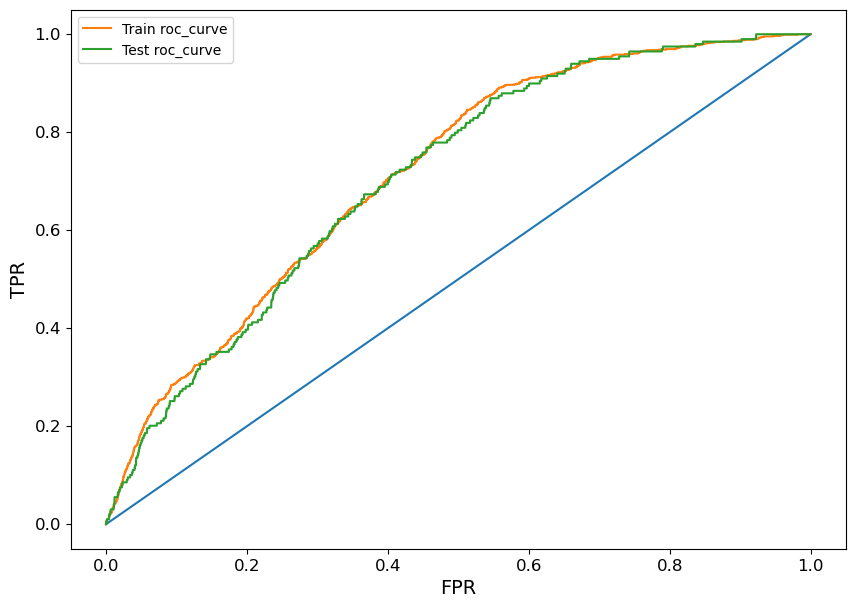

In [99]:
log_train_f1_base, log_test_f1_base, log_train_roc_base, log_test_roc_base = model_eval(xtrain, xtest, ytrain, ytest, ytrain_pred_base, ytest_pred_base, ytrain_prob_base, ytest_prob_base)

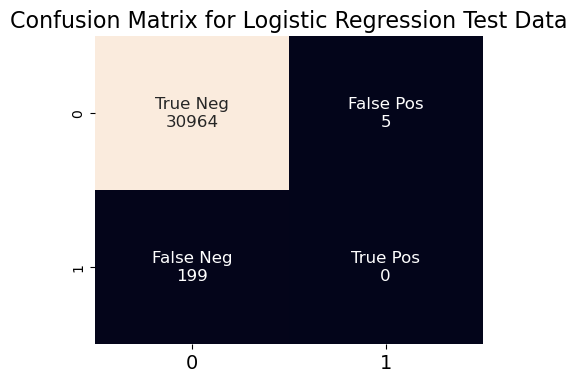

In [100]:
plt.figure(figsize=(5,4))
cf_matrix = confusion_matrix(ytest,ytest_pred_base)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Logistic Regression Test Data',fontsize=16)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="",cbar=False,annot_kws={"size":12})
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
bottom, top = ax.get_ylim()
plt.show()

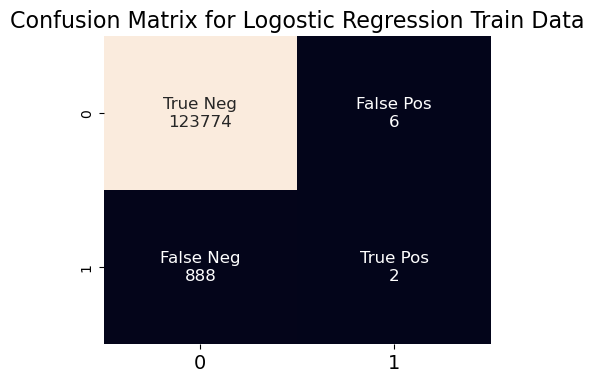

In [101]:
plt.figure(figsize=(5,4))
cf_matrix = confusion_matrix(ytrain,ytrain_pred_base)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Logostic Regression Train Data',fontsize=16)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="",cbar=False,annot_kws={"size":12})
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
bottom, top = ax.get_ylim()
plt.show()

In [102]:
# The Base Model Failed Miserably in predicting the Positve Class in the Train Data as Well As the Test Data.



In [103]:
models.append('Base model - Logistic regression')
f1_train_scores.append(log_train_f1_base)
f1_test_scores.append(log_test_f1_base)
roc_train_scores.append(log_train_roc_base)
roc_test_scores.append(log_test_roc_base)

In [104]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

ytrain_pred_tree = dt.predict(xtrain)
ytrain_prob_tree = dt.predict_proba(xtrain)[:,1]
ytest_pred_tree = dt.predict(xtest)
ytest_prob_tree = dt.predict_proba(xtest)[:,1]

accuracy score of the train data is:  0.9997272800192508
accuracy score of the test data is:  0.9874229979466119

F1 score of the train data is:  0.9805491990846681
F1 score of the test data is:  0.19008264462809918

roc_auc_score of the train data is:  0.9999925293334858
roc_auc_score of the test data is:  0.6186587787333452

Classification report train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    123780
           1       1.00      0.96      0.98       890

    accuracy                           1.00    124670
   macro avg       1.00      0.98      0.99    124670
weighted avg       1.00      1.00      1.00    124670



Classification report test
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     30969
           1       0.16      0.23      0.19       199

    accuracy                           0.99     31168
   macro avg       0.58      0.61      0.59     31168
weighted avg   

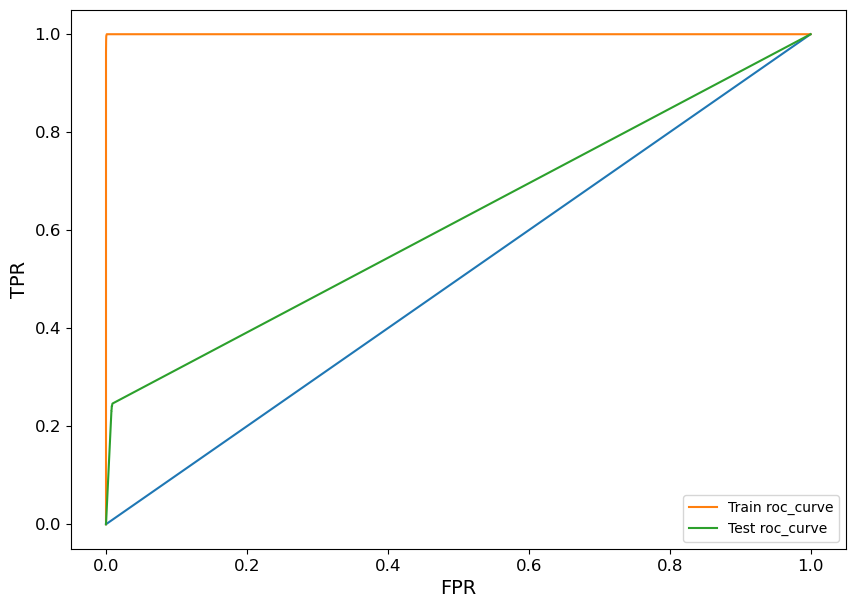

In [106]:
log_train_f1_dt, log_test_f1_dt, log_train_roc_dt, log_test_roc_dt = model_eval(xtrain, xtest, ytrain, ytest, ytrain_pred_tree, ytest_pred_tree,ytrain_prob_tree,ytest_prob_tree)

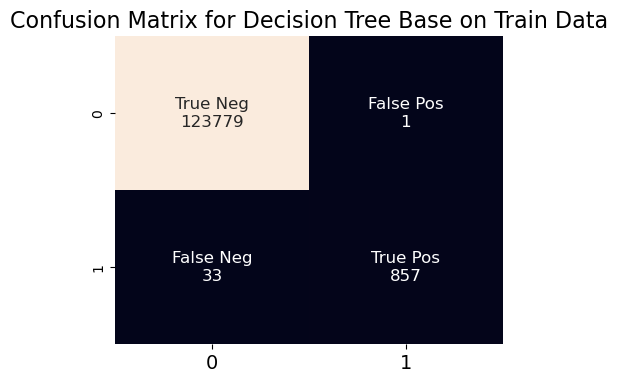

In [107]:
plt.figure(figsize=(5,4))
cf_matrix = confusion_matrix(ytrain,ytrain_pred_tree)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Decision Tree Base on Train Data',fontsize=16)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="",cbar=False,annot_kws={"size":12})
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
bottom, top = ax.get_ylim()
plt.show()

In [108]:
#in Train Data Dicision Tree was Able to Perform Much Better Than Logistic Regression
#This Model is Able to Predict the Positive Class more.

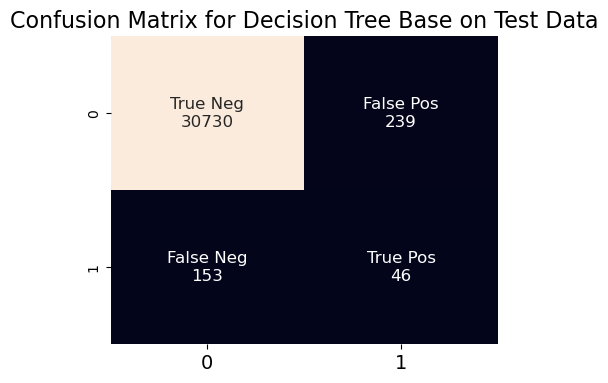

In [109]:
plt.figure(figsize=(5,4))
cf_matrix = confusion_matrix(ytest,ytest_pred_tree)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Decision Tree Base on Test Data',fontsize=16)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="",cbar=False,annot_kws={"size":12})
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
bottom, top = ax.get_ylim()
plt.show()

In [110]:
#But for Test Data this model failed to predict the postive classs The False Negavtive Outnmbeerd True Postive

#now we Can use GridSearch CV to optimise and hypertune this model 



In [111]:
models.append('Base model - Decision Tree Classifier')
f1_train_scores.append(log_train_f1_dt)
f1_test_scores.append(log_test_f1_dt)
roc_train_scores.append(log_train_roc_dt)
roc_test_scores.append(log_test_roc_dt)

In [112]:

t=pd.DataFrame({'Models':models,'Train f1 score':f1_train_scores,'Test f1 scores':f1_test_scores,'Train ROC':roc_train_scores,'Test ROC':roc_test_scores})
print("The Base Model And Evaluation Scores are as Below")


The Base Model And Evaluation Scores are as Below


In [113]:
t

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC
0,Base model - Logistic regression,0.004454,0.000000,0.715220,0.707783
1,Base model - Decision Tree Classifier,0.980549,0.190083,0.999993,0.618659


In [ ]:
####The Base Models are built on DataSet without any Outlier treatments, Scaling,or Transformation
## and the Data  Set is Highly Inmbalcced in the Following iteration we are triying to hyper tune the Renadom Forest Classfier
## With Weoghted Samples.


In [ ]:
# Since the Data Set is Highly Right Skewed We Can try Buiilding the model by doing Robust Scaling the Numerical Data

In [139]:
xtrain.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'potential_issue_Yes', 'deck_risk_Yes',
       'oe_constraint_Yes', 'ppap_risk_Yes', 'stop_auto_buy_Yes',
       'rev_stop_Yes'],
      dtype='object')

In [128]:
nc=['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty']

In [129]:
x1[nc]

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,797.0,8.0,400.0,1551.0,3267.0,5269.0,662.0,2113.0,4175.0,6198.0,441.0,0.0,1.00,0.99,0.0
1,7.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0,0.0,0.76,0.78,0.0
2,23.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.74,0.74,0.0
3,102.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,22.0,1.0,0.0,1.00,0.75,0.0
4,224.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.99,0.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155833,11.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,0.73,0.78,0.0
155834,97.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,30.0,41.0,0.0,0.0,0.84,0.86,0.0
155835,15.0,4.0,0.0,12.0,24.0,36.0,3.0,12.0,15.0,22.0,0.0,0.0,0.78,0.78,0.0
155836,0.0,8.0,2.0,6.0,10.0,12.0,3.0,7.0,10.0,11.0,1.0,0.0,0.99,0.99,0.0


In [ ]:
# Lets Scale it using Robust Scaler

In [140]:
xtrain.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'potential_issue_Yes', 'deck_risk_Yes',
       'oe_constraint_Yes', 'ppap_risk_Yes', 'stop_auto_buy_Yes',
       'rev_stop_Yes'],
      dtype='object')

In [130]:
from sklearn.preprocessing import RobustScaler

In [131]:
re=RobustScaler()

In [135]:
xtrain_robust=pd.DataFrame()
xtest_robust=pd.DataFrame()

In [156]:
xtrain_robust


,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,23.166667,-1.2,6.0,20.000000,127.875,139.615385,29.2,60.0000,89.058824,97.078431,55.25,0.0,-0.703704,-0.653846,0.0
1,1.513889,-0.8,28.0,36.666667,21.250,17.076923,13.0,10.8750,8.323529,8.058824,11.00,1.0,-0.444444,-0.192308,6.0
2,1.958333,-0.8,74.0,0.000000,0.000,0.000000,12.4,8.1250,4.823529,3.235294,9.50,0.0,0.259259,0.269231,0.0
3,0.041667,0.0,0.0,0.000000,0.000,0.000000,0.0,-0.0625,-0.088235,-0.078431,0.25,0.0,0.481481,0.576923,0.0
4,-0.152778,0.0,0.0,0.000000,0.000,0.000000,0.0,-0.0625,-0.058824,-0.039216,0.00,0.0,-0.259259,-0.038462,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124665,0.208333,-1.2,0.0,4.000000,4.500,3.692308,1.6,1.5625,1.294118,1.294118,0.00,0.0,-0.629630,-0.730769,0.0
124666,0.486111,0.0,0.0,0.000000,0.000,0.000000,0.0,-0.0625,-0.088235,-0.078431,0.00,0.0,-0.629630,-0.307692,0.0
124667,0.055556,-1.2,0.0,4.000000,3.500,3.076923,1.4,1.1250,0.823529,0.666667,0.00,0.0,0.555556,0.615385,0.0
124668,1.666667,0.0,200.0,35.000000,13.125,8.076923,0.0,-0.0625,-0.088235,-0.078431,0.00,0.0,0.407407,0.500000,0.0


In [158]:
xtrain.reset_index(drop=True,inplace=True)

In [160]:
xtest.reset_index(drop=True,inplace=True)

In [136]:
xtrain_robust[nc]=re.fit_transform(xtrain[nc])
xtest_robust[nc]=re.transform(xtest[nc])

In [161]:
xtrain_rs=pd.concat([xtrain_robust[nc],xtrain[['potential_issue_Yes', 'deck_risk_Yes',
       'oe_constraint_Yes', 'ppap_risk_Yes', 'stop_auto_buy_Yes',
       'rev_stop_Yes']]],axis=1)
xtest_rs=pd.concat([xtest_robust[nc],xtest[['potential_issue_Yes', 'deck_risk_Yes',
       'oe_constraint_Yes', 'ppap_risk_Yes', 'stop_auto_buy_Yes',
       'rev_stop_Yes']]],axis=1)

In [164]:
print(xtrain.shape,xtest.shape)

(124670, 21) (31168, 21)


In [163]:
print(xtrain_rs.shape,xtest_rs.shape)

(124670, 21) (31168, 21)


In [168]:
print(ytrain.shape,ytest.shape)

(124670,) (31168,)


In [171]:
ytrain.reset_index(drop=True,inplace=True)

In [172]:
ytest.reset_index(drop=True,inplace=True)

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Fitting The Random Forest Classifier with  10 Trees.

In [173]:
RC = RandomForestClassifier(n_estimators=10)
RC.fit(xtrain_rs,ytrain)

ytrain_pred_tree = RC.predict(xtrain_rs)
ytrain_prob_tree = RC.predict_proba(xtrain_rs)[:,1]
ytest_pred_tree = RC.predict(xtest_rs)
ytest_prob_tree = RC.predict_proba(xtest_rs)[:,1]

accuracy score of the train data is:  0.9984519130504532
accuracy score of the test data is:  0.9935510780287474

F1 score of the train data is:  0.8800497203231821
F1 score of the test data is:  0.0821917808219178

roc_auc_score of the train data is:  0.9998783679271487
roc_auc_score of the test data is:  0.7923291260136779

Classification report train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    123780
           1       0.98      0.80      0.88       890

    accuracy                           1.00    124670
   macro avg       0.99      0.90      0.94    124670
weighted avg       1.00      1.00      1.00    124670



Classification report test
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     30969
           1       0.45      0.05      0.08       199

    accuracy                           0.99     31168
   macro avg       0.72      0.52      0.54     31168
weighted avg    

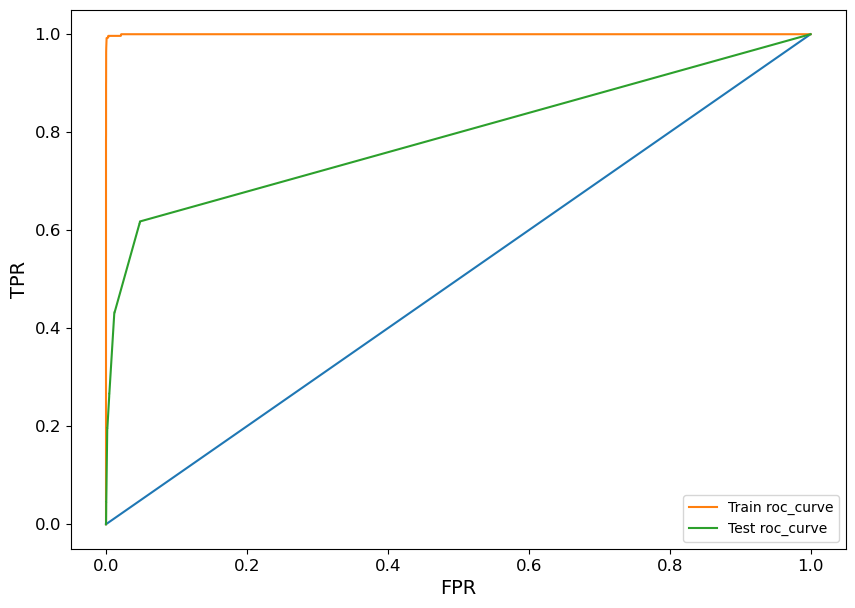

In [174]:
log_train_f1_dt, log_test_f1_dt, log_train_roc_dt, log_test_roc_dt = model_eval(xtrain_rs, xtest_rs, ytrain, ytest, ytrain_pred_tree, ytest_pred_tree,ytrain_prob_tree,ytest_prob_tree)

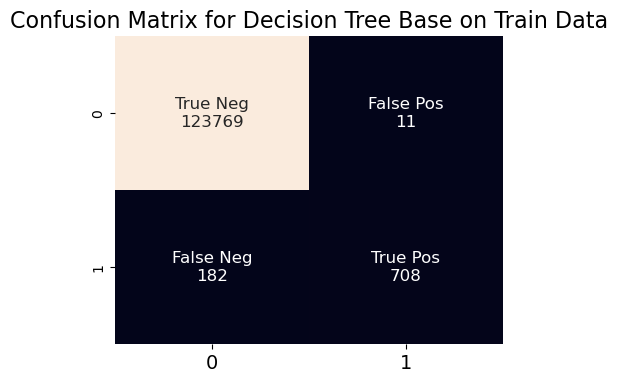

In [175]:
plt.figure(figsize=(5,4))
cf_matrix = confusion_matrix(ytrain,ytrain_pred_tree)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Decision Tree Base on Train Data',fontsize=16)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="",cbar=False,annot_kws={"size":12})
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
bottom, top = ax.get_ylim()
plt.show()

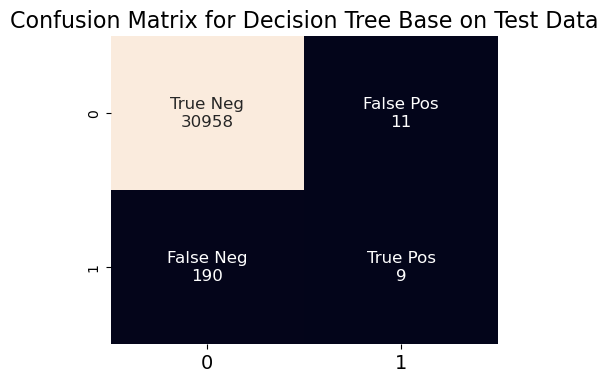

In [176]:
plt.figure(figsize=(5,4))
cf_matrix = confusion_matrix(ytest,ytest_pred_tree)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Decision Tree Base on Test Data',fontsize=16)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="",cbar=False,annot_kws={"size":12})
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
bottom, top = ax.get_ylim()
plt.show()

In [177]:
models.append('Base model - Random Forest Classifier- 10 Trees')
f1_train_scores.append(log_train_f1_dt)
f1_test_scores.append(log_test_f1_dt)
roc_train_scores.append(log_train_roc_dt)
roc_test_scores.append(log_test_roc_dt)

In [178]:

t=pd.DataFrame({'Models':models,'Train f1 score':f1_train_scores,'Test f1 scores':f1_test_scores,'Train ROC':roc_train_scores,'Test ROC':roc_test_scores})
print("The Base Model And Evaluation Scores are as Below")
t

The Base Model And Evaluation Scores are as Below


,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC
0,Base model - Logistic regression,0.004454,0.000000,0.715220,0.707783
1,Base model - Decision Tree Classifier,0.980549,0.190083,0.999993,0.618659
2,Base model - Random Forest Classifier- 10 Trees,0.880050,0.082192,0.999878,0.792329


In [ ]:
#With Ranodm Forest Model on Robust Scaled Data, The proformance have Come down Compared to the base modes Shown 

In [ ]:
# Trying Random Forestr with Class Wieghts

In [187]:
RC = RandomForestClassifier(n_estimators=10,class_weight='balanced')
RC.fit(xtrain_rs,ytrain)

ytrain_pred_tree = RC.predict(xtrain_rs)
ytrain_prob_tree = RC.predict_proba(xtrain_rs)[:,1]
ytest_pred_tree = RC.predict(xtest_rs)
ytest_prob_tree = RC.predict_proba(xtest_rs)[:,1]

accuracy score of the train data is:  0.9975214566455443
accuracy score of the test data is:  0.9925885523613963

F1 score of the train data is:  0.8191925102399064
F1 score of the test data is:  0.0796812749003984

roc_auc_score of the train data is:  0.9993986703484434
roc_auc_score of the test data is:  0.7640965653609517

Classification report train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    123780
           1       0.85      0.79      0.82       890

    accuracy                           1.00    124670
   macro avg       0.93      0.89      0.91    124670
weighted avg       1.00      1.00      1.00    124670



Classification report test
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     30969
           1       0.19      0.05      0.08       199

    accuracy                           0.99     31168
   macro avg       0.59      0.52      0.54     31168
weighted avg    

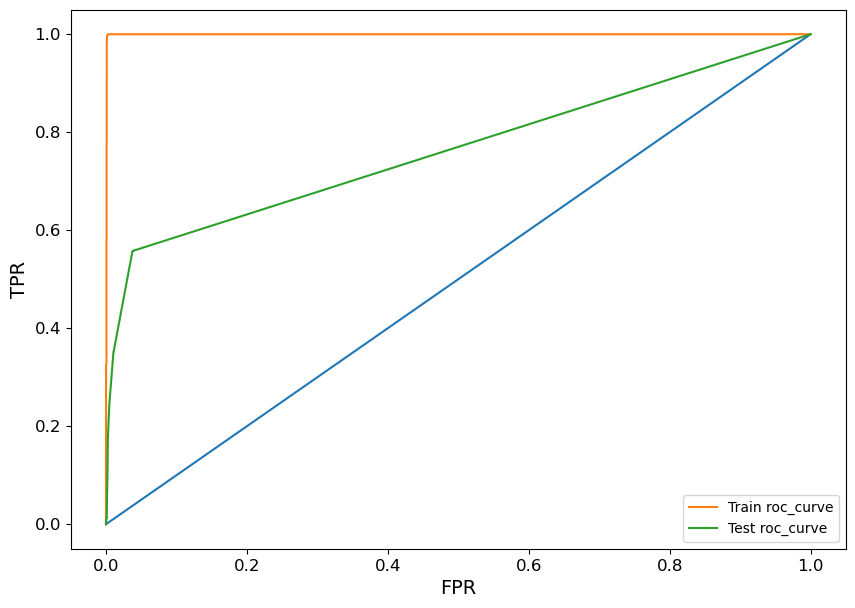

In [188]:
log_train_f1_dt, log_test_f1_dt, log_train_roc_dt, log_test_roc_dt = model_eval(xtrain_rs, xtest_rs, ytrain, ytest, ytrain_pred_tree, ytest_pred_tree,ytrain_prob_tree,ytest_prob_tree)

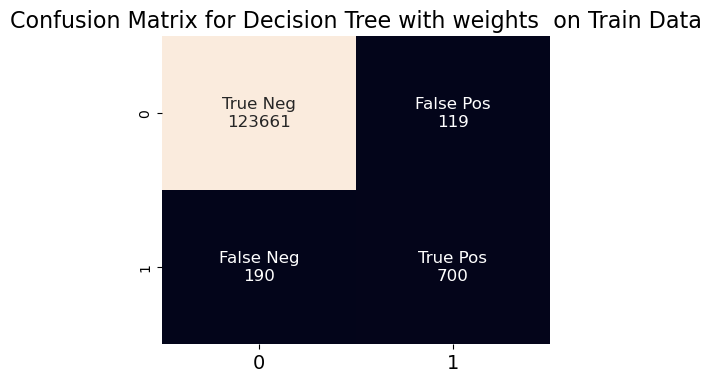

In [189]:
plt.figure(figsize=(5,4))
cf_matrix = confusion_matrix(ytrain,ytrain_pred_tree)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Decision Tree with weights  on Train Data',fontsize=16)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="",cbar=False,annot_kws={"size":12})
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
bottom, top = ax.get_ylim()
plt.show()

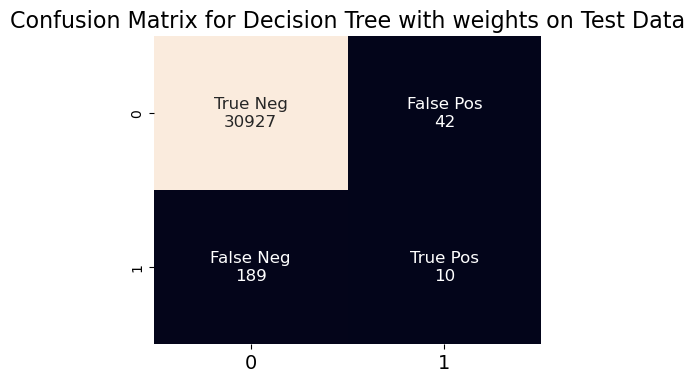

In [190]:
plt.figure(figsize=(5,4))
cf_matrix = confusion_matrix(ytest,ytest_pred_tree)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Decision Tree with weights on Test Data',fontsize=16)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="",cbar=False,annot_kws={"size":12})
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
bottom, top = ax.get_ylim()
plt.show()

In [196]:
models.append('Random Fores With wieghts Balanced')
f1_train_scores.append(log_train_f1_dt)
f1_test_scores.append(log_test_f1_dt)
roc_train_scores.append(log_train_roc_dt)
roc_test_scores.append(log_test_roc_dt)

In [197]:

t=pd.DataFrame({'Models':models,'Train f1 score':f1_train_scores,'Test f1 scores':f1_test_scores,'Train ROC':roc_train_scores,'Test ROC':roc_test_scores})
print("The Base Model And Evaluation Scores are as Below")
t

The Base Model And Evaluation Scores are as Below


,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC
0,Base model - Logistic regression,0.004454,0.000000,0.715220,0.707783
1,Base model - Decision Tree Classifier,0.980549,0.190083,0.999993,0.618659
2,Base model - Random Forest Classifier- 10 Trees,0.880050,0.082192,0.999878,0.792329
3,Base model - Random Forest Classifier- 10 Trees,0.819193,0.079681,0.999399,0.764097
4,Random Fores With wieghts Balanced,0.819193,0.079681,0.999399,0.764097


In [198]:
RC = RandomForestClassifier(n_estimators=10,class_weight='balanced_subsample')
RC.fit(xtrain_rs,ytrain)

ytrain_pred_tree = RC.predict(xtrain_rs)
ytrain_prob_tree = RC.predict_proba(xtrain_rs)[:,1]
ytest_pred_tree = RC.predict(xtest_rs)
ytest_prob_tree = RC.predict_proba(xtest_rs)[:,1]

accuracy score of the train data is:  0.99764177428411
accuracy score of the test data is:  0.992620636550308

F1 score of the train data is:  0.8310344827586207
F1 score of the test data is:  0.09448818897637794

roc_auc_score of the train data is:  0.9993692370116608
roc_auc_score of the test data is:  0.7834787291749523

Classification report train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    123780
           1       0.85      0.81      0.83       890

    accuracy                           1.00    124670
   macro avg       0.92      0.91      0.91    124670
weighted avg       1.00      1.00      1.00    124670



Classification report test
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     30969
           1       0.22      0.06      0.09       199

    accuracy                           0.99     31168
   macro avg       0.61      0.53      0.55     31168
weighted avg      

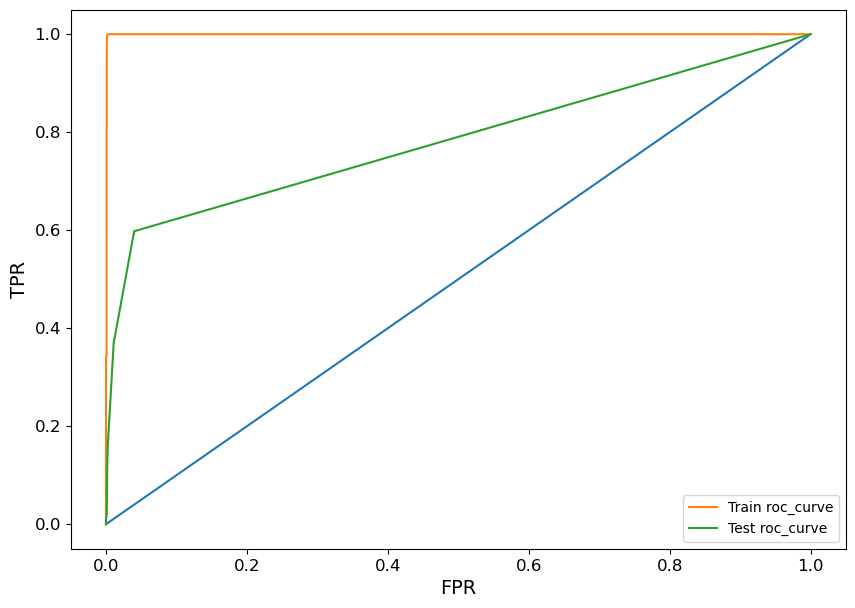

In [199]:
log_train_f1_dt, log_test_f1_dt, log_train_roc_dt, log_test_roc_dt = model_eval(xtrain_rs, xtest_rs, ytrain, ytest, ytrain_pred_tree, ytest_pred_tree,ytrain_prob_tree,ytest_prob_tree)

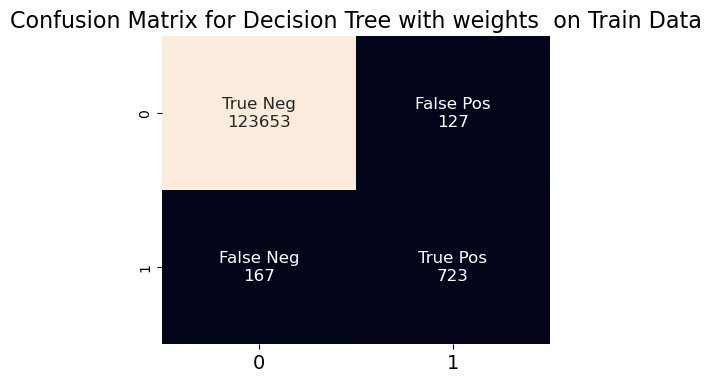

In [200]:
plt.figure(figsize=(5,4))
cf_matrix = confusion_matrix(ytrain,ytrain_pred_tree)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Decision Tree with weights  on Train Data',fontsize=16)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="",cbar=False,annot_kws={"size":12})
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
bottom, top = ax.get_ylim()
plt.show()

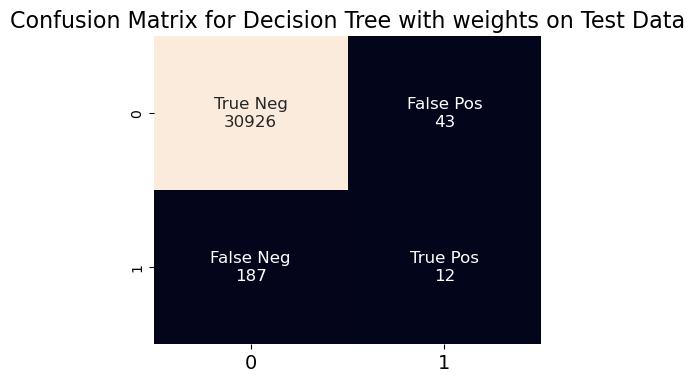

In [201]:
plt.figure(figsize=(5,4))
cf_matrix = confusion_matrix(ytest,ytest_pred_tree)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Decision Tree with weights on Test Data',fontsize=16)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="",cbar=False,annot_kws={"size":12})
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
bottom, top = ax.get_ylim()
plt.show()

In [202]:
models.append('Random Fores With wieghts Sub-Balanced')
f1_train_scores.append(log_train_f1_dt)
f1_test_scores.append(log_test_f1_dt)
roc_train_scores.append(log_train_roc_dt)
roc_test_scores.append(log_test_roc_dt)

In [203]:

t=pd.DataFrame({'Models':models,'Train f1 score':f1_train_scores,'Test f1 scores':f1_test_scores,'Train ROC':roc_train_scores,'Test ROC':roc_test_scores})
print("The Base Model And Evaluation Scores are as Below")
t

The Base Model And Evaluation Scores are as Below


,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC
0,Base model - Logistic regression,0.004454,0.000000,0.715220,0.707783
1,Base model - Decision Tree Classifier,0.980549,0.190083,0.999993,0.618659
2,Base model - Random Forest Classifier- 10 Trees,0.880050,0.082192,0.999878,0.792329
3,Base model - Random Forest Classifier- 10 Trees,0.819193,0.079681,0.999399,0.764097
4,Random Fores With wieghts Balanced,0.819193,0.079681,0.999399,0.764097
5,Random Fores With wieghts Sub-Balanced,0.831034,0.094488,0.999369,0.783479


In [205]:
from statsmodels.stats.outliers_influencetliers_influence import variance_inflation_factor

In [207]:
VIF=[variance_inflation_factor(xtrain_rs,i) for i in range (len(xtrain_rs.columns))]

In [208]:
pd.DataFrame(index=xtrain_rs.columns,data={'VIF':VIF}).sort_values(by=['VIF'],ascending=False)

,VIF
sales_6_month,873.282437
forecast_6_month,658.379300
forecast_9_month,494.386943
sales_9_month,413.581665
sales_3_month,254.769267
forecast_3_month,87.151638
sales_1_month,45.451583
min_bank,11.422466
perf_6_month_avg,9.707205
perf_12_month_avg,9.519625


In [ ]:
#There is Multicollinearity in the Features we try to Remove  them by using PCA

We see that the main multicollinearity is observed with in sales columns, forecast columns and performance columns all within themselves.
We Will Try to Apply PCA on these Groups of Columns so that The Explainability of the model is not lost

Apply individual PCA on the sales, forecast and performances groups seperately and make indices out of these columns. This will inturn retain the originality of the other features and give explainability.


we have 3 main groups with high multicollinearity

1. Sales columns.
2. Forecast columns.
3. Performance coluumns.

We will extract each of these groups seperately and apply pca on them and finally concat the decided priciple components we choose.

**Sales groups**

In [209]:
pca_xtrain = xtrain_rs.copy()
pca_xtest  = xtest_rs.copy()

In [210]:
xtr_sales = xtrain_rs[['sales_1_month','sales_3_month','sales_6_month','sales_9_month']]
xts_sales = xtest_rs[['sales_1_month','sales_3_month','sales_6_month','sales_9_month']]

pca_xtrain.drop(columns=['sales_1_month','sales_3_month','sales_6_month','sales_9_month'],inplace=True)
pca_xtest.drop(columns=['sales_1_month','sales_3_month','sales_6_month','sales_9_month'],inplace=True)

In [211]:
from sklearn.decomposition import PCA

In [212]:
pca = PCA()

In [213]:
pca.fit(xtr_sales)

PCA()

In [214]:
pd.DataFrame({'PCA':['PCA_'+str(i) for i in range(1,len(xtr_sales.columns)+1)],'Explained %':pca.explained_variance_ratio_})

,PCA,Explained %
0,PCA_1,0.990455
1,PCA_2,0.008023
2,PCA_3,0.001271
3,PCA_4,0.000251


we see that the 1st pca itself explains 99% of the variace. Hence we will take only 1 pca from this

In [215]:
pca = PCA(n_components=1)
xtr_sales_pca = pca.fit_transform(xtr_sales)
pca_xtrain['Sales_index'] = xtr_sales_pca


xts_sales_pca = pca.transform(xts_sales)
pca_xtest['Sales_index']= xts_sales_pca

**Forecast groups**

In [216]:
xtr_forecast = xtrain_rs[['forecast_3_month','forecast_6_month','forecast_9_month']]
xts_forecast = xtest_rs[['forecast_3_month','forecast_6_month','forecast_9_month']]

pca_xtrain.drop(columns=['forecast_3_month','forecast_6_month','forecast_9_month'],inplace=True)
pca_xtest.drop(columns=['forecast_3_month','forecast_6_month','forecast_9_month'],inplace=True)

In [217]:
pca = PCA()
pca.fit(xtr_forecast)

PCA()

In [218]:
pd.DataFrame({'PCA':['PCA_'+str(i) for i in range(1,len(xtr_forecast.columns)+1)],'Explained %':pca.explained_variance_ratio_})

,PCA,Explained %
0,PCA_1,0.993050
1,PCA_2,0.006628
2,PCA_3,0.000322


Same as above, only one pca is explaining 99.3% of variance.

In [219]:
pca = PCA(n_components=1)
xtr_forecast_pca = pca.fit_transform(xtr_forecast)
pca_xtrain['forecast_index'] = xtr_forecast_pca


xts_forecast_pca = pca.transform(xts_forecast)
pca_xtest['forecast_index']= xts_forecast_pca

**Performance group**

In [220]:
xtr_performance = xtrain_rs[['perf_12_month_avg','perf_6_month_avg']]
xts_performance = xtest_rs[['perf_12_month_avg','perf_6_month_avg']]

pca_xtrain.drop(columns=['perf_12_month_avg','perf_6_month_avg'],inplace=True)
pca_xtest.drop(columns=['perf_12_month_avg','perf_6_month_avg'],inplace=True)

In [221]:
pca = PCA()
pca.fit(xtr_performance)

PCA()

In [222]:
pca.explained_variance_ratio_

array([0.97131067, 0.02868933])

Same as above, only one pca is explaining 97% of variance.

In [223]:
pca = PCA(n_components=1)
xtr_performance_pca = pca.fit_transform(xtr_performance)
pca_xtrain['performance_index'] = xtr_performance_pca


xts_performance_pca = pca.transform(xts_performance)
pca_xtest['performance_index']= xts_performance_pca

In [224]:
pca_xtrain.head()

,national_inv,lead_time,in_transit_qty,min_bank,pieces_past_due,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,Sales_index,forecast_index,performance_index
0,23.166667,-1.2,6.0,55.25,0.0,0.0,0,0,0,0,1,0,118.191504,109.672497,0.644950
1,1.513889,-0.8,28.0,11.00,1.0,6.0,0,0,0,0,1,0,0.169215,5.487820,0.135259
2,1.958333,-0.8,74.0,9.50,0.0,0.0,0,0,0,0,1,0,-5.702688,-39.575714,-0.688680
3,0.041667,0.0,0.0,0.25,0.0,0.0,0,1,0,0,1,0,-20.039745,-39.575714,-1.063390
4,-0.152778,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,-20.005347,-39.575714,-0.104471


In [225]:
pca_xtest.head()

,national_inv,lead_time,in_transit_qty,min_bank,pieces_past_due,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,Sales_index,forecast_index,performance_index
0,-0.083333,0.0,0.0,0.50,0.0,0.0,0,0,0,0,1,0,-19.731979,-39.575714,-1.010005
1,0.208333,0.0,0.0,0.25,0.0,0.0,0,0,0,0,1,0,-20.005347,-39.575714,-1.142963
2,-0.125000,-0.8,0.0,0.00,0.0,0.0,0,0,0,0,1,0,-20.015267,-39.575714,0.135259
3,0.652778,0.0,1.0,4.50,0.0,0.0,0,0,0,0,1,0,-16.197818,-36.123870,-0.262606
4,-0.180556,-0.4,0.0,0.00,0.0,0.0,0,0,0,0,1,0,-20.029825,-39.575714,0.304515


In [226]:
print(pca_xtest.shape,pca_xtrain.shape)

(31168, 15) (124670, 15)


In [227]:
xtest_rs.shape

(31168, 21)

In [229]:
VIF=[variance_inflation_factor(pca_xtrain,i) for i in range (len(pca_xtrain.columns))]

In [231]:
pd.DataFrame(index=pca_xtrain.columns,data={'VIF':VIF}).sort_values(by=['VIF'],ascending=False)

,VIF
min_bank,11.184308
forecast_index,8.426434
Sales_index,7.871887
national_inv,3.522053
in_transit_qty,1.948658
stop_auto_buy_Yes,1.393009
deck_risk_Yes,1.284289
ppap_risk_Yes,1.138692
performance_index,1.036833
lead_time,1.029497


In [ ]:
#USing PCA we have Removed the columns having Strong Multicollinerarity 
#Seeing the VIF we Can See that The COrrelation between the features Have Come Down Signifcantyly.
#Now we Will Fit this Data into The most Effiecent Model Till now and Evaluate The metrics


In [262]:
RC = RandomForestClassifier(n_estimators=10,class_weight='balanced_subsample')
RC.fit(pca_xtrain,ytrain)

ytrain_pred_tree = RC.predict(pca_xtrain)
ytrain_prob_tree = RC.predict_proba(pca_xtrain)[:,1]
ytest_pred_tree = RC.predict(pca_xtest)
ytest_prob_tree = RC.predict_proba(pca_xtest)[:,1]

accuracy score of the train data is:  0.9976899013395364
accuracy score of the test data is:  0.9926848049281314

F1 score of the train data is:  0.8323632130384166
F1 score of the test data is:  0.08064516129032259

roc_auc_score of the train data is:  0.999264211967227
roc_auc_score of the test data is:  0.7568281525162704

Classification report train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    123780
           1       0.86      0.80      0.83       890

    accuracy                           1.00    124670
   macro avg       0.93      0.90      0.92    124670
weighted avg       1.00      1.00      1.00    124670



Classification report test
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     30969
           1       0.20      0.05      0.08       199

    accuracy                           0.99     31168
   macro avg       0.60      0.52      0.54     31168
weighted avg    

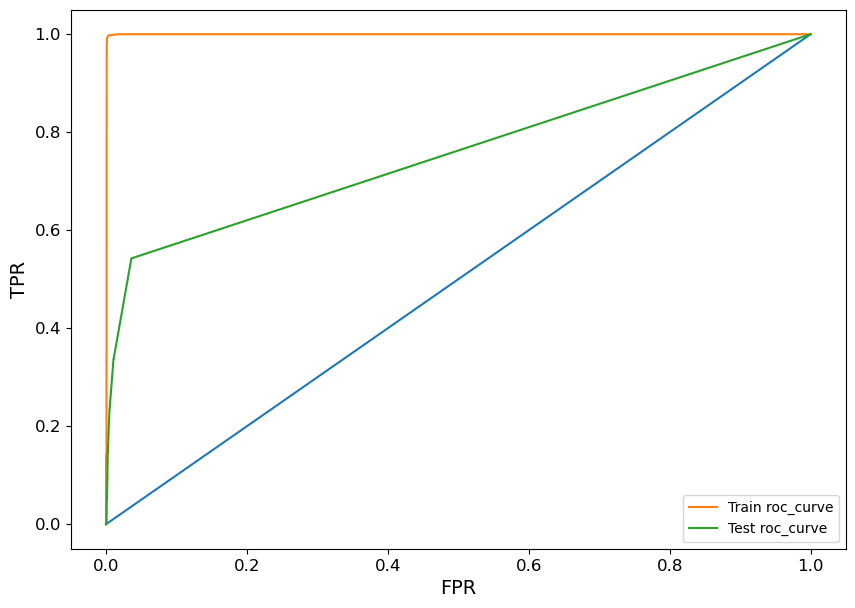

In [263]:
log_train_f1_dt, log_test_f1_dt, log_train_roc_dt, log_test_roc_dt = model_eval(pca_xtrain,pca_xtest, ytrain, ytest, ytrain_pred_tree, ytest_pred_tree,ytrain_prob_tree,ytest_prob_tree)

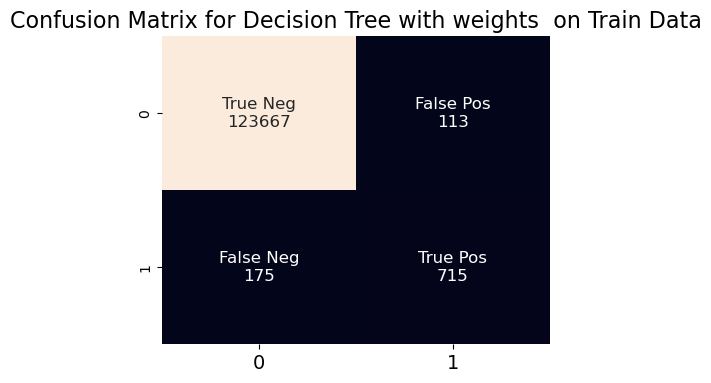

In [264]:
plt.figure(figsize=(5,4))
cf_matrix = confusion_matrix(ytrain,ytrain_pred_tree)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Decision Tree with weights  on Train Data',fontsize=16)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="",cbar=False,annot_kws={"size":12})
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
bottom, top = ax.get_ylim()
plt.show()

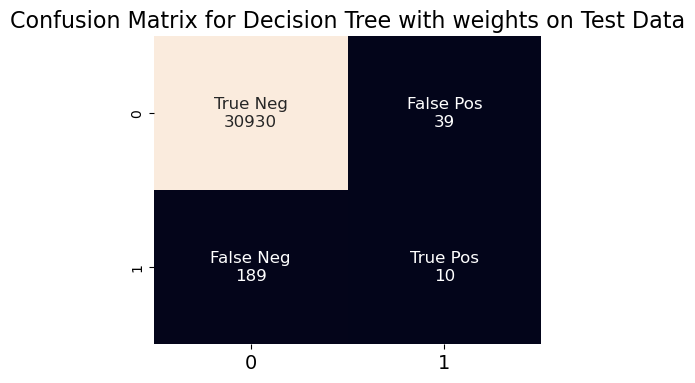

In [265]:
plt.figure(figsize=(5,4))
cf_matrix = confusion_matrix(ytest,ytest_pred_tree)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Decision Tree with weights on Test Data',fontsize=16)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="",cbar=False,annot_kws={"size":12})
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
bottom, top = ax.get_ylim()
plt.show()

In [236]:
models.append('Random Forest With wieghts Sub-Balanced- On PCA Appplied Data')
f1_train_scores.append(log_train_f1_dt)
f1_test_scores.append(log_test_f1_dt)
roc_train_scores.append(log_train_roc_dt)
roc_test_scores.append(log_test_roc_dt)

In [266]:

t=pd.DataFrame({'Models':models,'Train f1 score':f1_train_scores,'Test f1 scores':f1_test_scores,'Train ROC':roc_train_scores,'Test ROC':roc_test_scores})
print("The Base Model And Evaluation Scores are as Below")
t

The Base Model And Evaluation Scores are as Below


,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC
0,Base model - Logistic regression,0.004454,0.000000,0.715220,0.707783
1,Base model - Decision Tree Classifier,0.980549,0.190083,0.999993,0.618659
2,Base model - Random Forest Classifier- 10 Trees,0.880050,0.082192,0.999878,0.792329
3,Base model - Random Forest Classifier- 10 Trees,0.819193,0.079681,0.999399,0.764097
4,Random Fores With wieghts Balanced,0.819193,0.079681,0.999399,0.764097
5,Random Fores With wieghts Sub-Balanced,0.831034,0.094488,0.999369,0.783479
6,Random Forest With wieghts Sub-Balanced- On PC...,0.821596,0.081633,0.999410,0.748814


[]

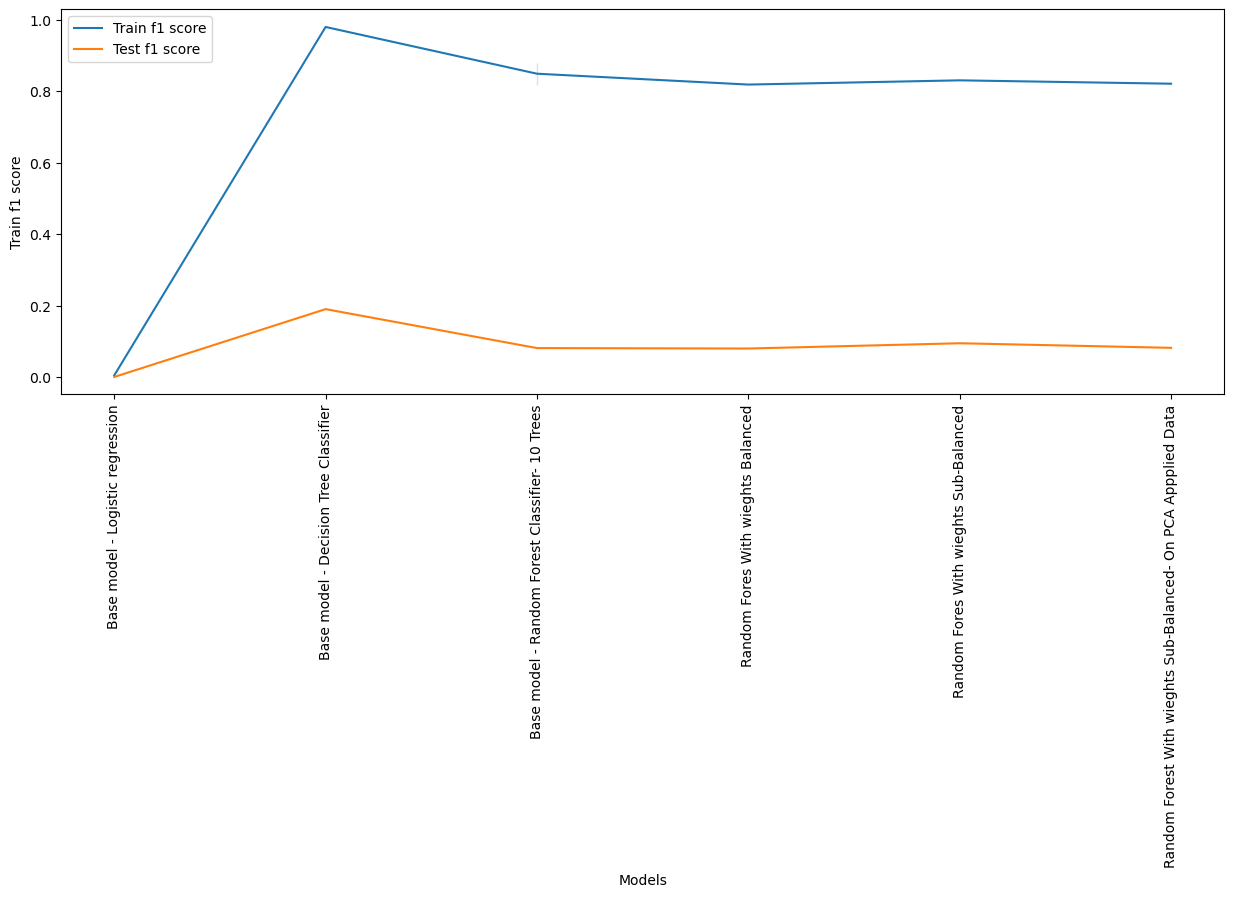

In [240]:
plt.figure(figsize=(15,5))
sns.lineplot(x=t['Models'],y=t['Train f1 score'],label='Train f1 score')
sns.lineplot(x=t['Models'],y=t['Test f1 scores'],label='Test f1 score')
plt.xticks(rotation=90)
plt.legend(loc=2)
plt.plot()

[]

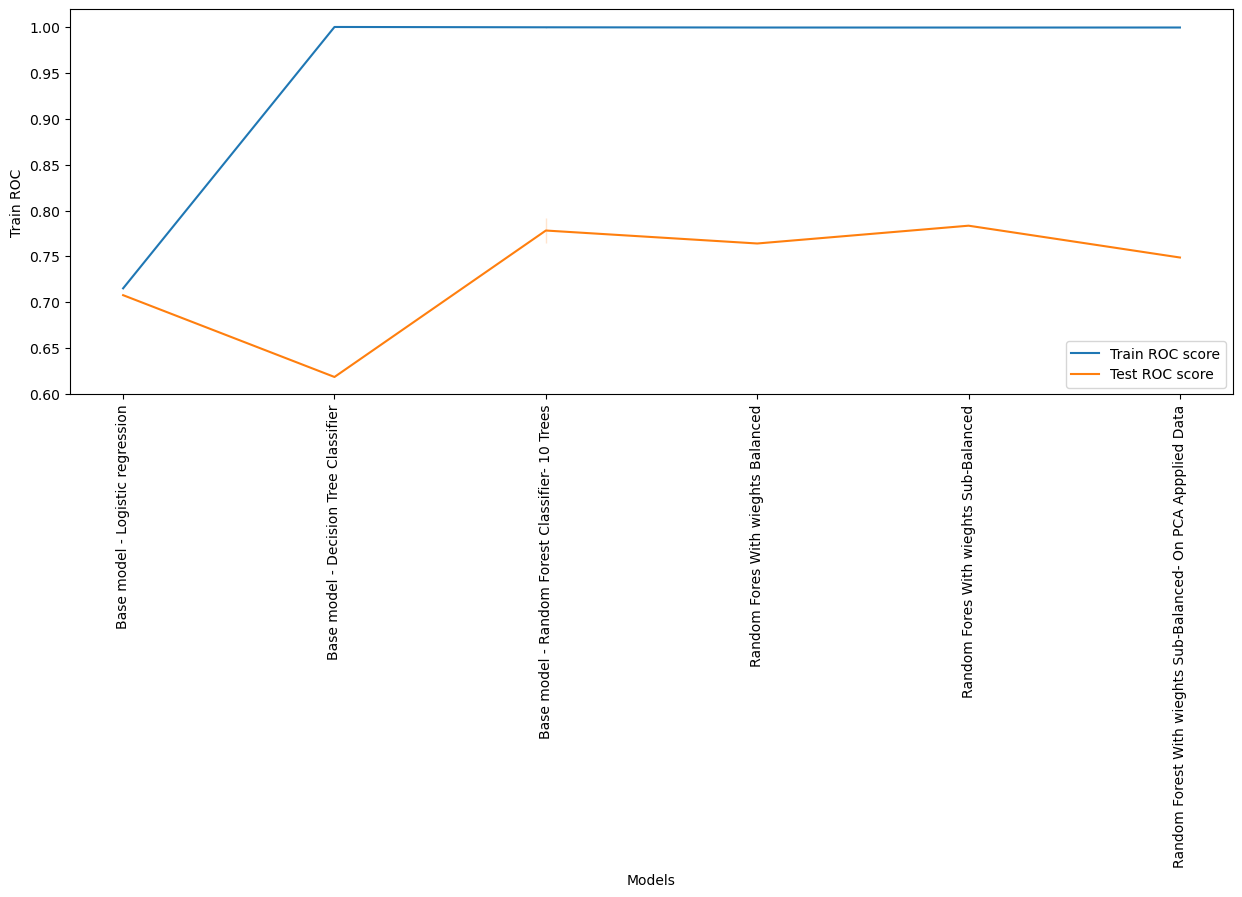

In [238]:
plt.figure(figsize=(15,5))
sns.lineplot(x=t['Models'],y=t['Train ROC'],label='Train ROC score')
sns.lineplot(x=t['Models'],y=t['Test ROC'],label='Test ROC score')
plt.xticks(rotation=90)
plt.legend()
plt.legend(loc=4)
plt.plot()

In [ ]:
# We Try Majority Redecution Using Smote on Train Data and Check the Resulsts

In [245]:
pip install --upgrade imbalanced-learn


In [268]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=.2,random_state=3)

In [269]:
xtrain_smote,ytrain_smote = smote.fit_resample(pca_xtrain,ytrain)

In [270]:
ytrain_smote.value_counts()

0    123780
1     24756
Name: went_on_backorder, dtype: int64

In [271]:
ytrain.value_counts()

0    123780
1       890
Name: went_on_backorder, dtype: int64

In [272]:
xtrain_smote.shape

(148536, 15)

In [ ]:
#Now the Class is Perfecty BAlcncesd.

In [273]:
RC = RandomForestClassifier(n_estimators=10,class_weight='balanced_subsample')
RC.fit(xtrain_smote,ytrain_smote)

ytrain_pred_tree = RC.predict(xtrain_smote)
ytrain_prob_tree = RC.predict_proba(xtrain_smote)[:,1]
ytest_pred_tree = RC.predict(pca_xtest)
ytest_prob_tree = RC.predict_proba(pca_xtest)[:,1]

accuracy score of the train data is:  0.9985525394517154
accuracy score of the test data is:  0.9902464065708418

F1 score of the train data is:  0.9956592840847146
F1 score of the test data is:  0.21243523316062177

roc_auc_score of the train data is:  0.9999580779958689
roc_auc_score of the test data is:  0.8587077919222512

Classification report train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    123780
           1       1.00      1.00      1.00     24756

    accuracy                           1.00    148536
   macro avg       1.00      1.00      1.00    148536
weighted avg       1.00      1.00      1.00    148536



Classification report test
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     30969
           1       0.22      0.21      0.21       199

    accuracy                           0.99     31168
   macro avg       0.61      0.60      0.60     31168
weighted avg   

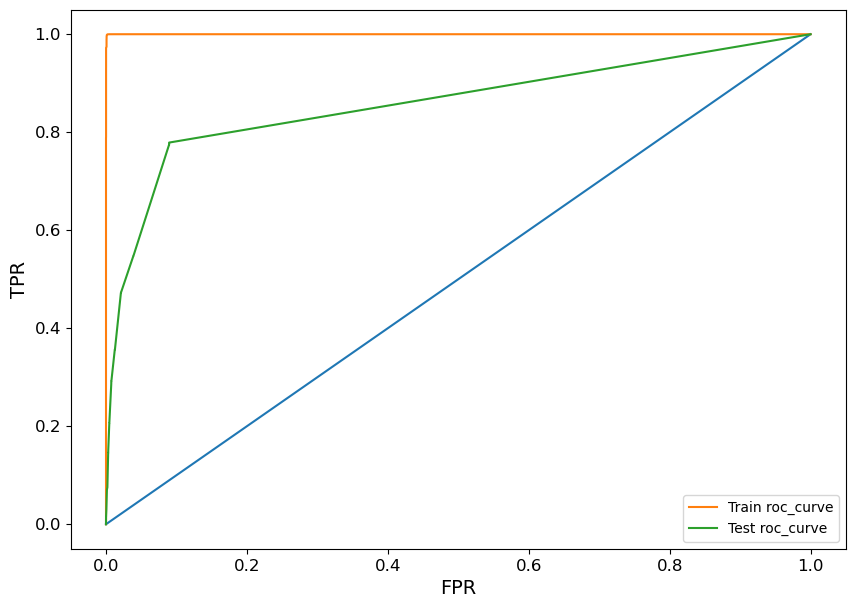

In [274]:
log_train_f1_dt, log_test_f1_dt, log_train_roc_dt, log_test_roc_dt = model_eval(xtrain_smote, xtest_rs, ytrain_smote, ytest, ytrain_pred_tree, ytest_pred_tree,ytrain_prob_tree,ytest_prob_tree)

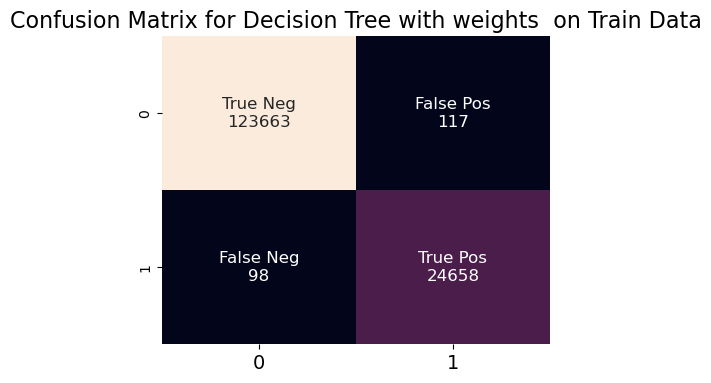

In [275]:
plt.figure(figsize=(5,4))
cf_matrix = confusion_matrix(ytrain_smote,ytrain_pred_tree)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Decision Tree with weights  on Train Data',fontsize=16)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="",cbar=False,annot_kws={"size":12})
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
bottom, top = ax.get_ylim()
plt.show()

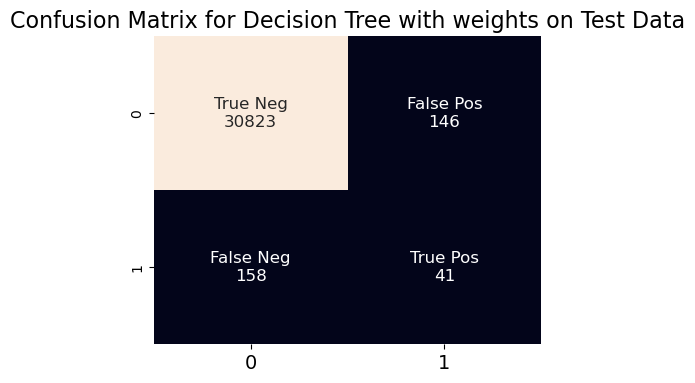

In [276]:
plt.figure(figsize=(5,4))
cf_matrix = confusion_matrix(ytest,ytest_pred_tree)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Decision Tree with weights on Test Data',fontsize=16)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="",cbar=False,annot_kws={"size":12})
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
bottom, top = ax.get_ylim()
plt.show()

In [281]:
models.append('Random Forest With wieghts Sub-Balanced- On PCA Appplied Data-and SMOTE Oversamoling 20 % Minority Class')
f1_train_scores.append(log_train_f1_dt)
f1_test_scores.append(log_test_f1_dt)
roc_train_scores.append(log_train_roc_dt)
roc_test_scores.append(log_test_roc_dt)

In [282]:

t=pd.DataFrame({'Models':models,'Train f1 score':f1_train_scores,'Test f1 scores':f1_test_scores,'Train ROC':roc_train_scores,'Test ROC':roc_test_scores})
print("The Base Model And Evaluation Scores are as Below")
t

The Base Model And Evaluation Scores are as Below


,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC
0,Base model - Logistic regression,0.004454,0.000000,0.715220,0.707783
1,Base model - Decision Tree Classifier,0.980549,0.190083,0.999993,0.618659
2,Base model - Random Forest Classifier- 10 Trees,0.880050,0.082192,0.999878,0.792329
3,Base model - Random Forest Classifier- 10 Trees,0.819193,0.079681,0.999399,0.764097
4,Random Fores With wieghts Balanced,0.819193,0.079681,0.999399,0.764097
5,Random Fores With wieghts Sub-Balanced,0.831034,0.094488,0.999369,0.783479
6,Random Forest With wieghts Sub-Balanced- On PC...,0.821596,0.081633,0.999410,0.748814
7,Random Forest With wieghts Sub-Balanced- On PC...,0.995659,0.212435,0.999958,0.858708
8,Random Forest With wieghts Sub-Balanced- On PC...,0.995659,0.212435,0.999958,0.858708


In [283]:
xtrain_smote.skew()

national_inv           342.550688
lead_time                4.732830
in_transit_qty         116.085498
min_bank               114.879162
pieces_past_due        202.536425
local_bo_qty           218.954641
potential_issue_Yes     47.053166
deck_risk_Yes            1.619965
oe_constraint_Yes       80.344368
ppap_risk_Yes            2.445396
stop_auto_buy_Yes       -6.086170
rev_stop_Yes            80.344368
Sales_index            141.851897
forecast_index         147.430373
performance_index        1.510075
dtype: float64

In [ ]:
#The Dxata Set is Extremenly Skewed Lets Try TRansorming the data

In [285]:
xtrain_smote.head()

,national_inv,lead_time,in_transit_qty,min_bank,pieces_past_due,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,Sales_index,forecast_index,performance_index
0,23.166667,-1.2,6.0,55.25,0.0,0.0,0,0,0,0,1,0,118.191504,109.672497,0.644950
1,1.513889,-0.8,28.0,11.00,1.0,6.0,0,0,0,0,1,0,0.169215,5.487820,0.135259
2,1.958333,-0.8,74.0,9.50,0.0,0.0,0,0,0,0,1,0,-5.702688,-39.575714,-0.688680
3,0.041667,0.0,0.0,0.25,0.0,0.0,0,1,0,0,1,0,-20.039745,-39.575714,-1.063390
4,-0.152778,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,-20.005347,-39.575714,-0.104471


In [292]:
xtrain_smote.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'min_bank',
       'pieces_past_due', 'local_bo_qty', 'potential_issue_Yes',
       'deck_risk_Yes', 'oe_constraint_Yes', 'ppap_risk_Yes',
       'stop_auto_buy_Yes', 'rev_stop_Yes', 'Sales_index', 'forecast_index',
       'performance_index'],
      dtype='object')

In [287]:
num=['national_inv', 'lead_time', 'in_transit_qty', 'min_bank',
       'pieces_past_due', 'local_bo_qty', 'Sales_index', 'forecast_index',
       'performance_index']

In [289]:
from sklearn.preprocessing import PowerTransformer

numeric_data_train = xtrain_smote[num]
numeric_data_test=pca_xtest[num]

# Apply the Yeo-Johnson transformation to numeric data

pt = PowerTransformer(method='yeo-johnson', standardize=False)
transformed_data_train = pd.DataFrame(pt.fit_transform(numeric_data_train), columns=num)
transformed_data_test=pd.DataFrame(pt.transform(numeric_data_test), columns=num)

In [295]:
# Combine the transformed numeric data and categorical data into one DataFrame
categorical_data_train = xtrain_smote[['potential_issue_Yes',
       'deck_risk_Yes', 'oe_constraint_Yes', 'ppap_risk_Yes',
       'stop_auto_buy_Yes']]
categorical_data_test = pca_xtest[['potential_issue_Yes',
       'deck_risk_Yes', 'oe_constraint_Yes', 'ppap_risk_Yes',
       'stop_auto_buy_Yes']]
transformed_train = pd.concat([transformed_data_train, categorical_data_train], axis=1)
transformed_test = pd.concat([transformed_data_test, categorical_data_test], axis=1)



In [398]:
transformed_train.skew()

national_inv          -118.611115
lead_time                0.042588
in_transit_qty           1.534255
min_bank                 0.897447
pieces_past_due          5.366984
local_bo_qty             4.858708
Sales_index              1.829381
forecast_index           1.972520
performance_index        0.199022
potential_issue_Yes     47.053166
deck_risk_Yes            1.619965
oe_constraint_Yes       80.344368
ppap_risk_Yes            2.445396
stop_auto_buy_Yes       -6.086170
dtype: float64

In [399]:
transformed_test

,national_inv,lead_time,in_transit_qty,min_bank,pieces_past_due,local_bo_qty,Sales_index,forecast_index,performance_index,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes
0,-0.084710,0.000000,-0.000000,0.323107,-0.0,-0.0,-128.423833,-280.287837,-1.490192,0,0,0,0,1
1,0.200347,0.000000,-0.000000,0.196481,-0.0,-0.0,-131.494564,-280.287837,-1.757056,0,0,0,0,1
2,-0.128073,-1.042419,-0.000000,-0.000000,-0.0,-0.0,-131.606598,-280.287837,0.127235,0,0,0,0,1
3,0.585963,0.000000,0.435753,0.740221,-0.0,-0.0,-91.644497,-241.762648,-0.295359,0,0,0,0,1
4,-0.186903,-0.461901,-0.000000,-0.000000,-0.0,-0.0,-131.771082,-280.287837,0.267480,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31163,0.805697,0.000000,-0.000000,-0.000000,-0.0,-0.0,-119.309503,-280.287837,1.214644,0,1,0,1,1
31164,0.879543,0.000000,0.683439,0.812638,-0.0,-0.0,2.938835,3.685498,0.107430,0,0,0,0,1
31165,-0.172089,0.000000,-0.000000,-0.000000,-0.0,-0.0,-131.883219,-280.287837,-1.490192,0,0,0,0,1
31166,0.752029,0.000000,-0.000000,-0.000000,-0.0,-0.0,-131.883219,-280.287837,-1.387629,0,0,0,0,1


In [307]:
# set the winsorization limits
low_lim = 0.025
up_lim = 0.975

# list of numeric columns to be winsorized
num_l = ['national_inv', 'lead_time', 'in_transit_qty', 'min_bank']

# loop through the numeric columns and winsorize them
for col in num_l:
    q_low = transformed_train[col].quantile(low_lim)
    q_high = transformed_test[col].quantile(up_lim)
    transformed_data_train[col] = np.where(transformed_train[col] < q_low, q_low, transformed_train[col])
    transformed_data_test[col] = np.where(transformed_data_test[col] > q_high, q_high, transformed_data_test[col])

In [397]:
transformed_data_train.skew()

national_inv         93.610677
lead_time             0.085799
in_transit_qty        1.534255
min_bank              0.897447
pieces_past_due       5.366984
local_bo_qty          4.858708
Sales_index           1.829381
forecast_index        1.972520
performance_index     0.199022
dtype: float64

# HYPER TUNING

## Defining a function for evaluation of models built

In [390]:
def model_eval(model,xtrain=transformed_train, xtest=transformed_test, ytrain=ytrain_smote, ytest=ytest):
    
    model.fit(xtrain,ytrain)
    
    yprob_train = model.predict_proba(xtrain)[:,1]
    yprob_test = model.predict_proba(xtest)[:,1]
    
    fpr,tpr,threshold = roc_curve(ytest,yprob_test)
    j = tpr-fpr
    i = np.argmax(j)
    best_th = threshold[i]
    
    ypred_train = list(map(lambda x :0 if x<best_th else 1,yprob_train))
    ypred_test  = list(map(lambda x :0 if x<best_th else 1,yprob_test))
    
    # for cross validation purpose, default accuracy score with default predictions
    acc_train_without= accuracy_score(ytrain,model.predict(xtrain))
    acc_test_without = accuracy_score(ytest,model.predict(xtest))
    print("Default accuracy score of the train data is: ",acc_train_without)
    print("Default accuracy score of the test data is: ",acc_test_without)
    
    # accuracy score with manually calculated threshold.
    ac_tr = accuracy_score(ytrain,ypred_train)
    ac_ts = accuracy_score(ytest, ypred_test)
    print("\nThreshhold defined accuracy score of the train data is: ",ac_tr)
    print("Threshhold defined accuracy score of the test data is: ",ac_ts)

    f1_tr = f1_score(ytrain,ypred_train,zero_division=0)
    f1_ts = f1_score(ytest ,ypred_test, zero_division=0)
    print("\nF1 score of the train data is: ",f1_tr)
    print("F1 score of the test data is: ",   f1_ts)

    roc_tr = roc_auc_score(ytrain,yprob_train)
    roc_ts = roc_auc_score(ytest, yprob_test)
    print("\nroc_auc_score of the train data is: ",roc_tr)
    print("roc_auc_score of the test data is: ",   roc_ts)

    print('\nClassification report train')
    print(classification_report(ytrain,ypred_train))

    print('\n\nClassification report test')
    print(classification_report(ytest,ypred_test))

    print('\nConfusion matrix train data')
    print(confusion_matrix(ytrain,ypred_train))

    print('\nConfusion matrix test data')
    print(confusion_matrix(ytest,ypred_test))
    
    cm = confusion_matrix(ytest,ypred_test)
    recall = cm[1,1]/(cm[1,1]+cm[1,0])
    print('\nRecall(TPR) for test data =',recall)
    
    fpr,tpr,thresholds = roc_curve(ytest, yprob_test)
    fpr1,tpr1,th1      = roc_curve(ytrain,yprob_train)
    
    plt.figure(figsize=(10,7))
    plt.plot(fpr,fpr)
    plt.plot(fpr1,tpr1,label='Train roc_curve')
    plt.plot(fpr,tpr,label='Test roc_curve')
    plt.xlabel('FPR',fontsize=14)
    plt.ylabel('TPR',fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.show()
    
    return f1_tr,f1_ts,roc_tr,roc_ts , acc_train_without,acc_test_without, recall

**Lists for model cross validation**

Models and accuracy scores are added after confirming their train and test performances.

In [328]:
# will only add models with high performance for cross validation
cv_model= []
model_name = []
test_acc = []
train_acc = []
rec = []

**Lists for tabulating the performances of each models.**

In [415]:
models           = []
f1_train_scores  = []
f1_test_scores   = []
roc_train_scores = []
roc_test_scores  = []
rec_test         = []

## Base Bagging Classifier - Logistic Regression

In [332]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score,roc_curve, accuracy_score

Default accuracy score of the train data is:  0.8588894274788603
Default accuracy score of the test data is:  0.9813270020533881

Threshhold defined accuracy score of the train data is:  0.8016103840146497
Threshhold defined accuracy score of the test data is:  0.8179543121149897

F1 score of the train data is:  0.5459476117103236
F1 score of the test data is:  0.048625083836351446

roc_auc_score of the train data is:  0.8546750389472604
roc_auc_score of the test data is:  0.8500444844260697

Classification report train
              precision    recall  f1-score   support

           0       0.94      0.82      0.87    123780
           1       0.44      0.72      0.55     24756

    accuracy                           0.80    148536
   macro avg       0.69      0.77      0.71    148536
weighted avg       0.85      0.80      0.82    148536



Classification report test
              precision    recall  f1-score   support

           0       1.00      0.82      0.90     30969
         

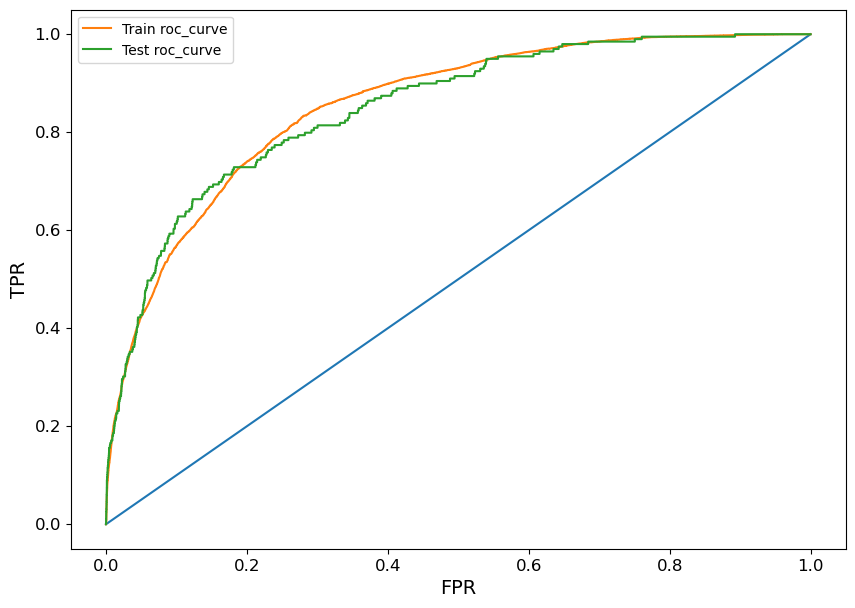

In [402]:
lr = LogisticRegression(solver='liblinear',n_jobs=-1,max_iter=5000)
bg = BaggingClassifier(base_estimator=lr,n_jobs=-1,random_state=3)

bg_train_f1,bg_test_f1,bg_train_roc,bg_test_roc,_,_,bg_rec = model_eval(bg)

In [416]:
models.append('Base Bagging Classifier')
f1_train_scores.append(bg_train_f1)
f1_test_scores.append(bg_test_f1)
roc_train_scores.append(bg_train_roc)
roc_test_scores.append(bg_test_roc)
rec_test.append(bg_rec)

pd.DataFrame({'Models':models,'Train f1 score':f1_train_scores,'Test f1 scores':f1_test_scores,'Train ROC':roc_train_scores,'Test ROC':roc_test_scores,'Test Recall':rec_test})

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC,Test Recall
0,Base Bagging Classifier,0.545948,0.048625,0.854675,0.850044,0.728643


## Bagging Classifier  - Hyperparameter Tuning

In [404]:
lr = LogisticRegression(max_iter=5000,solver='liblinear')
bg = BaggingClassifier(base_estimator=lr,random_state=3,n_jobs=-1)

params = {'n_estimators':np.arange(10,50)}

gscv_bg_lr = GridSearchCV(bg,param_grid=params,cv=3,scoring='f1',n_jobs=-1)
gscv_bg_lr.fit(transformed_train,ytrain_smote)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=LogisticRegression(max_iter=5000,
                                                                           solver='liblinear'),
                                         n_jobs=-1, random_state=3),
             n_jobs=-1,
             param_grid={'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])},
             scoring='f1')

In [405]:
gscv_bg_lr.best_params_

{'n_estimators': 12}

Default accuracy score of the train data is:  0.8580613453977487
Default accuracy score of the test data is:  0.9819686858316222

Threshhold defined accuracy score of the train data is:  0.8006947810631766
Threshhold defined accuracy score of the test data is:  0.8219327515400411

F1 score of the train data is:  0.5366120902858217
F1 score of the test data is:  0.04868015083990401

roc_auc_score of the train data is:  0.8491988314268475
roc_auc_score of the test data is:  0.844350510341757

Classification report train
              precision    recall  f1-score   support

           0       0.93      0.82      0.87    123780
           1       0.44      0.69      0.54     24756

    accuracy                           0.80    148536
   macro avg       0.68      0.76      0.70    148536
weighted avg       0.85      0.80      0.82    148536



Classification report test
              precision    recall  f1-score   support

           0       1.00      0.82      0.90     30969
           

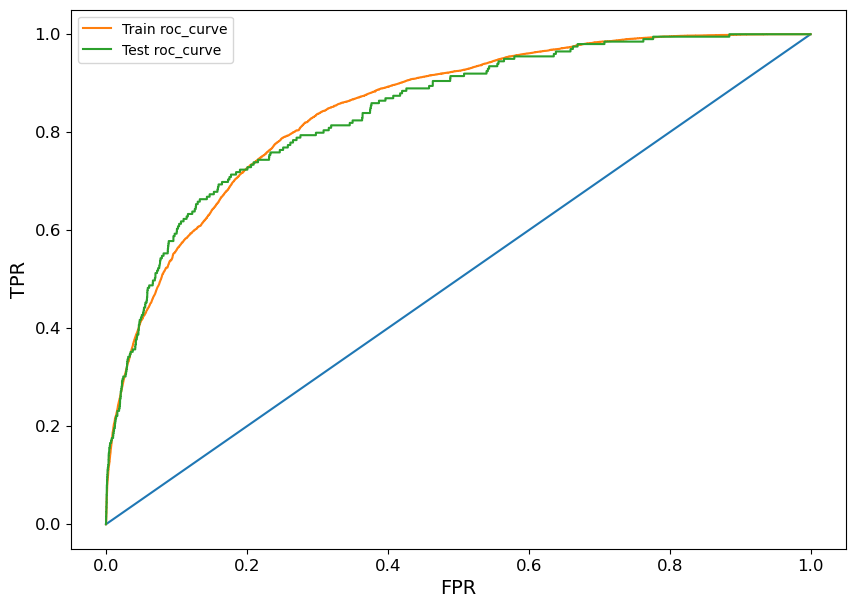

In [406]:
lr = LogisticRegression(max_iter=5000,solver='liblinear')
bg_tuned = BaggingClassifier(base_estimator=lr,random_state=3,n_estimators=12)

bg_tuned_train_f1, bg_tuned_test_f1, bg_tuned_train_roc, bg_tuned_test_roc,_,_,bg_tuned_rec = model_eval(bg_tuned)

In [417]:
models.append('Tuned Bagging Classifier')
f1_train_scores.append(bg_tuned_train_f1)
f1_test_scores.append(bg_tuned_test_f1)
roc_train_scores.append(bg_tuned_train_roc)
roc_test_scores.append(bg_tuned_test_roc)
rec_test.append(bg_tuned_rec)

pd.DataFrame({'Models':models,'Train f1 score':f1_train_scores,'Test f1 scores':f1_test_scores,'Train ROC':roc_train_scores,'Test ROC':roc_test_scores,'Test Recall':rec_test})

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC,Test Recall
0,Base Bagging Classifier,0.545948,0.048625,0.854675,0.850044,0.728643
1,Tuned Bagging Classifier,0.536612,0.048680,0.849199,0.844351,0.713568


## SGDClassifier

Default accuracy score of the train data is:  0.8456333818064308
Default accuracy score of the test data is:  0.9725359342915811

Threshhold defined accuracy score of the train data is:  0.7539586362901923
Threshhold defined accuracy score of the test data is:  0.7749935831622177

F1 score of the train data is:  0.47138972460078693
F1 score of the test data is:  0.03865661411925976

roc_auc_score of the train data is:  0.8000981634395259
roc_auc_score of the test data is:  0.799403066545229

Classification report train
              precision    recall  f1-score   support

           0       0.92      0.77      0.84    123780
           1       0.37      0.66      0.47     24756

    accuracy                           0.75    148536
   macro avg       0.64      0.72      0.66    148536
weighted avg       0.83      0.75      0.78    148536



Classification report test
              precision    recall  f1-score   support

           0       1.00      0.78      0.87     30969
          

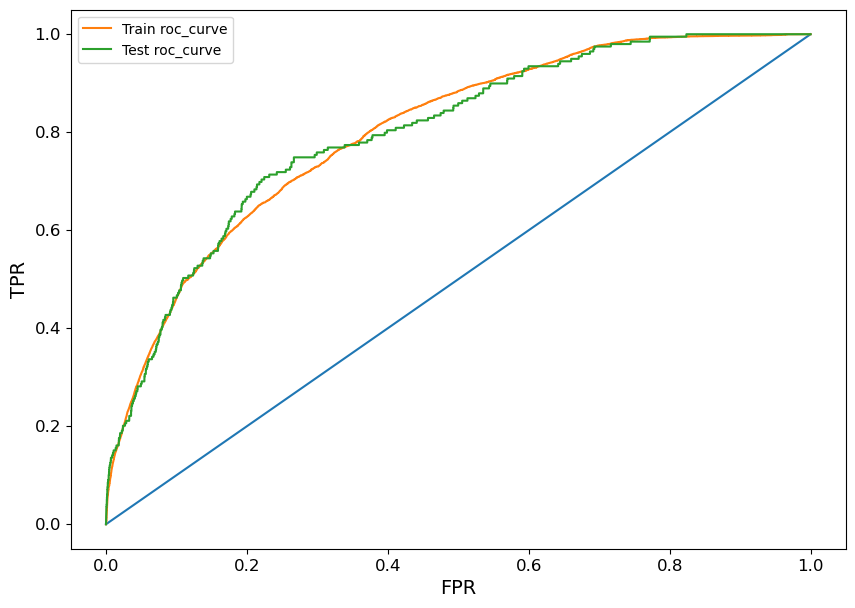

In [408]:
sgd = SGDClassifier(loss='log')

sgd_train_f1,sgd_test_f1,sgd_train_roc,sgd_test_roc,_,_,sg_rec = model_eval(sgd)

In [418]:
models.append('SGD Classifier')
f1_train_scores.append(sgd_train_f1)
f1_test_scores.append(sgd_test_f1)
roc_train_scores.append(sgd_train_roc)
roc_test_scores.append(sgd_test_roc)
rec_test.append(sg_rec)

pd.DataFrame({'Models':models,'Train f1 score':f1_train_scores,'Test f1 scores':f1_test_scores,'Train ROC':roc_train_scores,'Test ROC':roc_test_scores,'Test Recall':rec_test})

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC,Test Recall
0,Base Bagging Classifier,0.545948,0.048625,0.854675,0.850044,0.728643
1,Tuned Bagging Classifier,0.536612,0.048680,0.849199,0.844351,0.713568
2,SGD Classifier,0.471390,0.038657,0.800098,0.799403,0.708543


## SGDClassifier - Hyperparameter Tuning

In [410]:
sgd_t = SGDClassifier(max_iter=500)

params = {'loss':['log','modified_huber'],
          'penalty':['l1','l2','elasticnet'],
          'alpha':[0.01,0.05,0.075,0.005],
          'l1_ratio':[0.15,0.1,0.075,0.05]}

gs = GridSearchCV(sgd_t,param_grid=params,cv=3,scoring='f1')
gs.fit(transformed_train,ytrain_smote)

GridSearchCV(cv=3, estimator=SGDClassifier(max_iter=500),
             param_grid={'alpha': [0.01, 0.05, 0.075, 0.005],
                         'l1_ratio': [0.15, 0.1, 0.075, 0.05],
                         'loss': ['log', 'modified_huber'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='f1')

In [411]:
gs.best_params_

{'alpha': 0.005, 'l1_ratio': 0.15, 'loss': 'modified_huber', 'penalty': 'l1'}

Default accuracy score of the train data is:  0.869479452792589
Default accuracy score of the test data is:  0.9263667864476386

Threshhold defined accuracy score of the train data is:  0.8691361016857866
Threshhold defined accuracy score of the test data is:  0.9247304928131417

F1 score of the train data is:  0.5976568968372247
F1 score of the test data is:  0.09280742459396751

roc_auc_score of the train data is:  0.756196665103372
roc_auc_score of the test data is:  0.7659552890546569

Classification report train
              precision    recall  f1-score   support

           0       0.92      0.93      0.92    123780
           1       0.61      0.58      0.60     24756

    accuracy                           0.87    148536
   macro avg       0.77      0.75      0.76    148536
weighted avg       0.87      0.87      0.87    148536



Classification report test
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     30969
           1

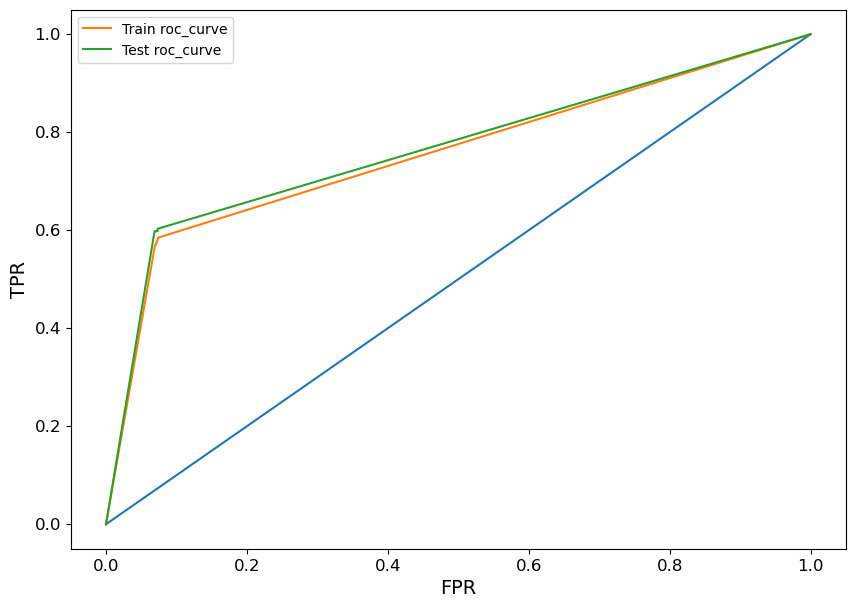

In [412]:
sgd_t = SGDClassifier(alpha=0.005,l1_ratio=0.15,loss='modified_huber',penalty='l1')
sgd_tuned_train_f1,sgd_tuned_test_f1,sgd_tuned_train_roc, sgd_tuned_test_roc,_,_,sgd_tuned_rec =model_eval(sgd_t)

In [419]:
models.append('SGD Tuned Classifier')
f1_train_scores.append(sgd_tuned_train_f1)
f1_test_scores.append(sgd_tuned_test_f1)
roc_train_scores.append(sgd_tuned_train_roc)
roc_test_scores.append(sgd_tuned_test_roc)
rec_test.append(sgd_tuned_rec)

pd.DataFrame({'Models':models,'Train f1 score':f1_train_scores,'Test f1 scores':f1_test_scores,'Train ROC':roc_train_scores,'Test ROC':roc_test_scores,'Test Recall':rec_test})

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC,Test Recall
0,Base Bagging Classifier,0.545948,0.048625,0.854675,0.850044,0.728643
1,Tuned Bagging Classifier,0.536612,0.048680,0.849199,0.844351,0.713568
2,SGD Classifier,0.471390,0.038657,0.800098,0.799403,0.708543
3,SGD Tuned Classifier,0.597657,0.092807,0.756197,0.765955,0.603015


## RandomForest Classifier

Default accuracy score of the train data is:  0.9995152690256908
Default accuracy score of the test data is:  0.9903747433264887

Threshhold defined accuracy score of the train data is:  0.9384458986373674
Threshhold defined accuracy score of the test data is:  0.864797227926078

F1 score of the train data is:  0.8441224107066746
F1 score of the test data is:  0.07668711656441718

roc_auc_score of the train data is:  0.9999926818467584
roc_auc_score of the test data is:  0.917461634109389

Classification report train
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    123780
           1       0.73      1.00      0.84     24756

    accuracy                           0.94    148536
   macro avg       0.87      0.96      0.90    148536
weighted avg       0.96      0.94      0.94    148536



Classification report test
              precision    recall  f1-score   support

           0       1.00      0.86      0.93     30969
           1

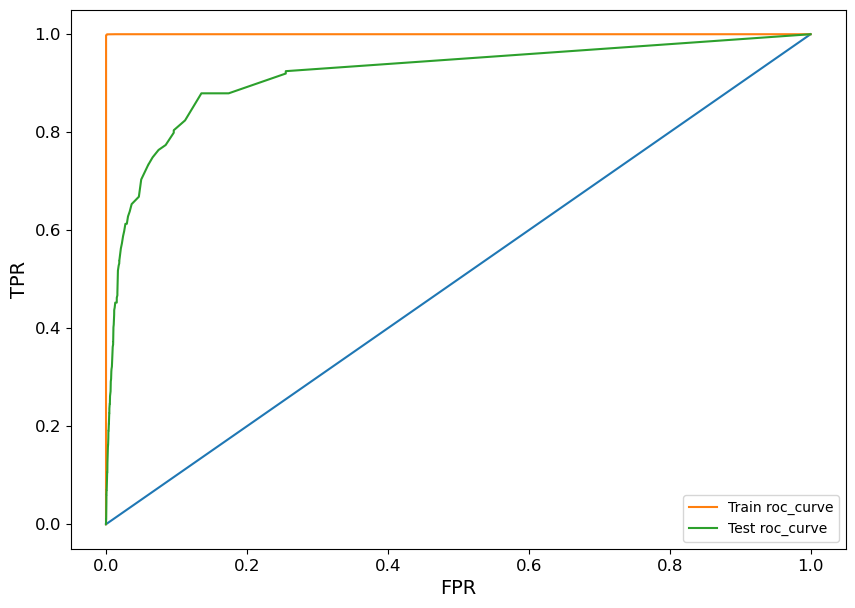

In [420]:
rf = RandomForestClassifier(random_state=3)
rf_train_f1, rf_test_f1, rf_train_roc, rf_test_roc, rf_acc_train, rf_acc_test,rf_rec = model_eval(rf)

In [421]:
models.append('RandomForest Classifier')
f1_train_scores.append(rf_train_f1)
f1_test_scores.append(rf_test_f1)
roc_train_scores.append(rf_train_roc)
roc_test_scores.append(rf_test_roc)
rec_test.append(rf_rec)

pd.DataFrame({'Models':models,'Train f1 score':f1_train_scores,'Test f1 scores':f1_test_scores,'Train ROC':roc_train_scores,'Test ROC':roc_test_scores,'Test Recall':rec_test})

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC,Test Recall
0,Base Bagging Classifier,0.545948,0.048625,0.854675,0.850044,0.728643
1,Tuned Bagging Classifier,0.536612,0.048680,0.849199,0.844351,0.713568
2,SGD Classifier,0.471390,0.038657,0.800098,0.799403,0.708543
3,SGD Tuned Classifier,0.597657,0.092807,0.756197,0.765955,0.603015
4,RandomForest Classifier,0.844122,0.076687,0.999993,0.917462,0.879397


## RandomForest - Hyperparameter Tuning

In [422]:
rf_tuned = RandomForestClassifier(random_state=3,n_jobs=-1)

params = {'n_estimators':np.arange(100,130), 'max_depth':np.arange(5,8)}

gscv = GridSearchCV(rf_tuned, param_grid = params, cv = 3,scoring='f1',n_jobs=-1,verbose=True)
gscv.fit(transformed_train,ytrain_smote)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=3),
             n_jobs=-1,
             param_grid={'max_depth': array([5, 6, 7]),
                         'n_estimators': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129])},
             scoring='f1', verbose=True)

In [423]:
gscv.best_params_

{'max_depth': 7, 'n_estimators': 121}

Default accuracy score of the train data is:  0.9220592987558571
Default accuracy score of the test data is:  0.9806532340862423

Threshhold defined accuracy score of the train data is:  0.8696679592825982
Threshhold defined accuracy score of the test data is:  0.8523806468172485

F1 score of the train data is:  0.7082246906509518
F1 score of the test data is:  0.06956521739130435

roc_auc_score of the train data is:  0.9689931841086665
roc_auc_score of the test data is:  0.9286872380566659

Classification report train
              precision    recall  f1-score   support

           0       0.99      0.85      0.92    123780
           1       0.56      0.95      0.71     24756

    accuracy                           0.87    148536
   macro avg       0.78      0.90      0.81    148536
weighted avg       0.92      0.87      0.88    148536



Classification report test
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     30969
          

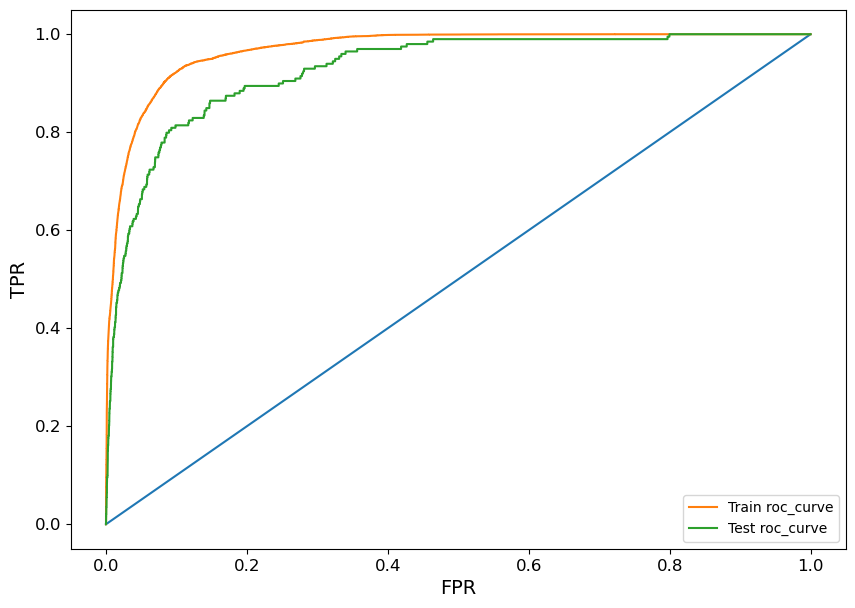

In [424]:
rf_tuned = RandomForestClassifier(random_state=3,n_jobs=-1,n_estimators=121,max_depth=7)
rf_tuned_train_f1,rf_tuned_test_f1, rf_tuned_train_roc,rf_tuned_test_roc, rf_tuned_train_acc,rf_tuned_test_acc,rf_tuned_rec = model_eval(rf_tuned)

In [425]:
models.append('RandomForest Tuned Classifier')
f1_train_scores.append(rf_tuned_train_f1)
f1_test_scores.append(rf_tuned_test_f1)
roc_train_scores.append(rf_tuned_train_roc)
roc_test_scores.append(rf_tuned_test_roc)
rec_test.append(rf_tuned_rec)

pd.DataFrame({'Models':models,'Train f1 score':f1_train_scores,'Test f1 scores':f1_test_scores,'Train ROC':roc_train_scores,'Test ROC':roc_test_scores,'Test Recall':rec_test})

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC,Test Recall
0,Base Bagging Classifier,0.545948,0.048625,0.854675,0.850044,0.728643
1,Tuned Bagging Classifier,0.536612,0.048680,0.849199,0.844351,0.713568
2,SGD Classifier,0.471390,0.038657,0.800098,0.799403,0.708543
3,SGD Tuned Classifier,0.597657,0.092807,0.756197,0.765955,0.603015
4,RandomForest Classifier,0.844122,0.076687,0.999993,0.917462,0.879397
5,RandomForest Tuned Classifier,0.708225,0.069565,0.968993,0.928687,0.864322


## GradientBoosting

Default accuracy score of the train data is:  0.9528127861259224
Default accuracy score of the test data is:  0.9811344969199178

Threshhold defined accuracy score of the train data is:  0.8867749232509291
Threshhold defined accuracy score of the test data is:  0.871310318275154

F1 score of the train data is:  0.7396110732643834
F1 score of the test data is:  0.07729468599033816

roc_auc_score of the train data is:  0.9813974412890591
roc_auc_score of the test data is:  0.9325207035532859

Classification report train
              precision    recall  f1-score   support

           0       0.99      0.87      0.93    123780
           1       0.60      0.96      0.74     24756

    accuracy                           0.89    148536
   macro avg       0.80      0.92      0.83    148536
weighted avg       0.93      0.89      0.90    148536



Classification report test
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     30969
           

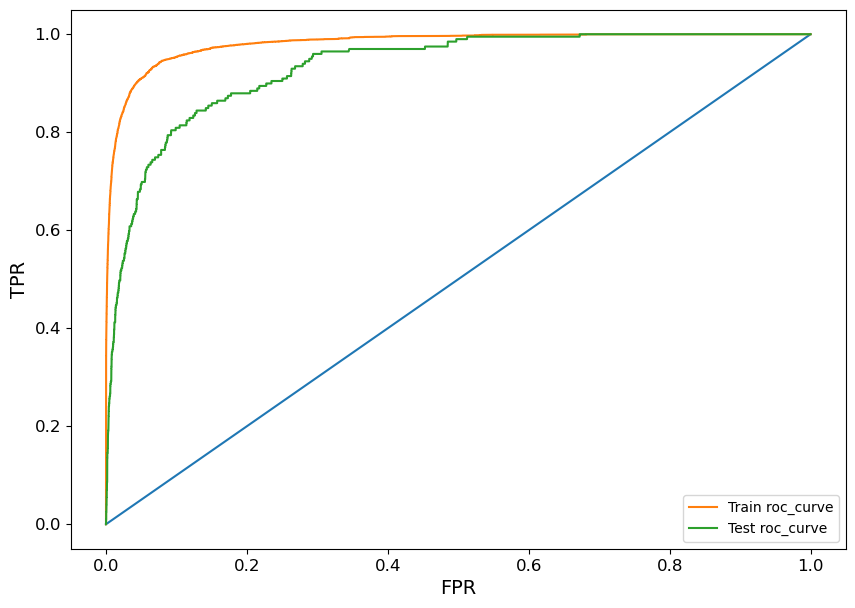

In [426]:
gb = GradientBoostingClassifier(random_state=3)

gb_train_f1,gb_test_f1,gb_train_roc,gb_test_roc, gb_train_acc,gb_test_acc,gb_rec = model_eval(gb)

In [427]:
models.append('GradientBoost Classifier')
f1_train_scores.append(gb_train_f1)
f1_test_scores.append(gb_test_f1)
roc_train_scores.append(gb_train_roc)
roc_test_scores.append(gb_test_roc)
rec_test.append(gb_rec)

pd.DataFrame({'Models':models,'Train f1 score':f1_train_scores,'Test f1 scores':f1_test_scores,'Train ROC':roc_train_scores,'Test ROC':roc_test_scores,'Test Recall':rec_test})

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC,Test Recall
0,Base Bagging Classifier,0.545948,0.048625,0.854675,0.850044,0.728643
1,Tuned Bagging Classifier,0.536612,0.048680,0.849199,0.844351,0.713568
2,SGD Classifier,0.471390,0.038657,0.800098,0.799403,0.708543
3,SGD Tuned Classifier,0.597657,0.092807,0.756197,0.765955,0.603015
4,RandomForest Classifier,0.844122,0.076687,0.999993,0.917462,0.879397
5,RandomForest Tuned Classifier,0.708225,0.069565,0.968993,0.928687,0.864322
6,GradientBoost Classifier,0.739611,0.077295,0.981397,0.932521,0.844221


## GradientBoost - Hyperparameter Tuning

In [428]:
gb_tuned = GradientBoostingClassifier(random_state=3)

params = {'n_estimators':np.arange(119,140)}

gscv = GridSearchCV(gb_tuned,param_grid=params,cv=3,scoring='f1',verbose=True,n_jobs=-1)
gscv.fit(transformed_train,ytrain_smote)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=3),
             n_jobs=-1,
             param_grid={'n_estimators': array([119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139])},
             scoring='f1', verbose=True)

In [429]:
gscv.best_params_

{'n_estimators': 139}

Default accuracy score of the train data is:  0.9592018096623041
Default accuracy score of the test data is:  0.9831237166324436

Threshhold defined accuracy score of the train data is:  0.915946302579846
Threshhold defined accuracy score of the test data is:  0.9061858316221766

F1 score of the train data is:  0.7923354568287287
F1 score of the test data is:  0.09919901417128772

roc_auc_score of the train data is:  0.9852247264371521
roc_auc_score of the test data is:  0.9331841973274945

Classification report train
              precision    recall  f1-score   support

           0       0.99      0.91      0.95    123780
           1       0.67      0.96      0.79     24756

    accuracy                           0.92    148536
   macro avg       0.83      0.93      0.87    148536
weighted avg       0.94      0.92      0.92    148536



Classification report test
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     30969
           

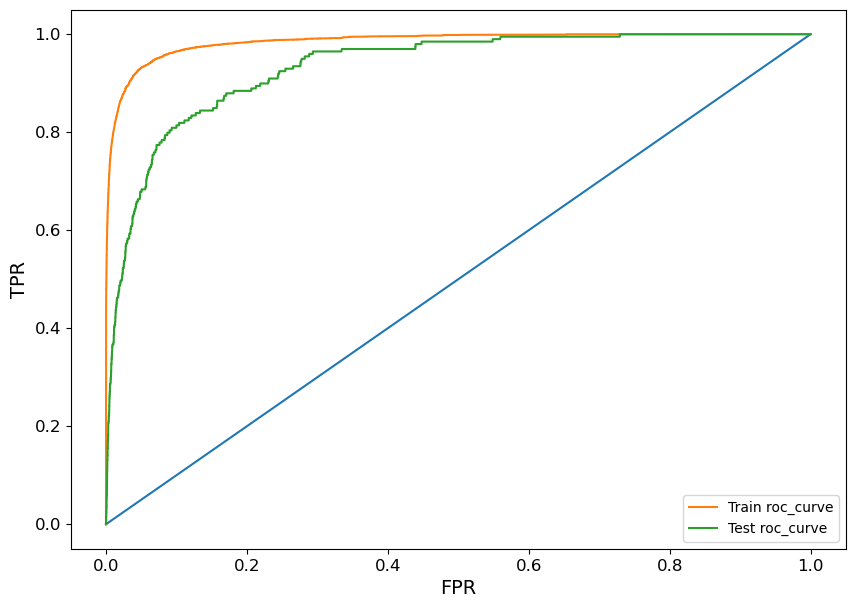

In [430]:
gb_tuned = GradientBoostingClassifier(random_state=3, n_estimators= 139)
gb_tuned_train_f1,gb_tuned_test_f1,gb_tuned_train_roc,gb_tuned_test_roc,gb_tuned_train_acc,gb_tuned_test_acc,gb_tuned_rec= model_eval(gb_tuned)

In [431]:
models.append('GradientBoost Tuned Classifier')
f1_train_scores.append(gb_tuned_train_f1)
f1_test_scores.append(gb_tuned_test_f1)
roc_train_scores.append(gb_tuned_train_roc)
roc_test_scores.append(gb_tuned_test_roc)
rec_test.append(gb_tuned_rec)

pd.DataFrame({'Models':models,'Train f1 score':f1_train_scores,'Test f1 scores':f1_test_scores,'Train ROC':roc_train_scores,'Test ROC':roc_test_scores,'Test Recall':rec_test})

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC,Test Recall
0,Base Bagging Classifier,0.545948,0.048625,0.854675,0.850044,0.728643
1,Tuned Bagging Classifier,0.536612,0.048680,0.849199,0.844351,0.713568
2,SGD Classifier,0.471390,0.038657,0.800098,0.799403,0.708543
3,SGD Tuned Classifier,0.597657,0.092807,0.756197,0.765955,0.603015
4,RandomForest Classifier,0.844122,0.076687,0.999993,0.917462,0.879397
5,RandomForest Tuned Classifier,0.708225,0.069565,0.968993,0.928687,0.864322
6,GradientBoost Classifier,0.739611,0.077295,0.981397,0.932521,0.844221
7,GradientBoost Tuned Classifier,0.792335,0.099199,0.985225,0.933184,0.809045


## XGBoost

In [370]:
from xgboost import XGBClassifier

Default accuracy score of the train data is:  0.9907025906177627
Default accuracy score of the test data is:  0.9900859856262834

Threshhold defined accuracy score of the train data is:  0.8630904292562073
Threshhold defined accuracy score of the test data is:  0.8339964065708418

F1 score of the train data is:  0.7086616429328672
F1 score of the test data is:  0.06471438900939985

roc_auc_score of the train data is:  0.9989761508744802
roc_auc_score of the test data is:  0.9385321453728003

Classification report train
              precision    recall  f1-score   support

           0       1.00      0.84      0.91    123780
           1       0.55      1.00      0.71     24756

    accuracy                           0.86    148536
   macro avg       0.77      0.92      0.81    148536
weighted avg       0.92      0.86      0.88    148536



Classification report test
              precision    recall  f1-score   support

           0       1.00      0.83      0.91     30969
          

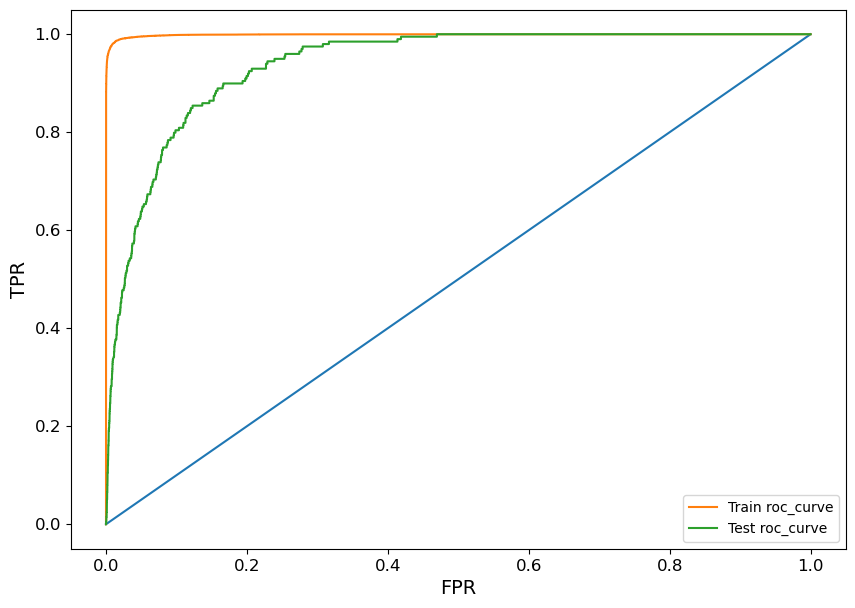

In [432]:
xg = XGBClassifier(use_label_encoder=False)

xgb_train_f1, xgb_test_f1, xgb_train_roc, xgb_test_roc, _,_,xgb_rec = model_eval(xg)

In [433]:
models.append('XGB Classifier')
f1_train_scores.append(xgb_train_f1)
f1_test_scores.append(xgb_test_f1)
roc_train_scores.append(xgb_train_roc)
roc_test_scores.append(xgb_test_roc)
rec_test.append(xgb_rec)

pd.DataFrame({'Models':models,'Train f1 score':f1_train_scores,'Test f1 scores':f1_test_scores,'Train ROC':roc_train_scores,'Test ROC':roc_test_scores,'Test Recall':rec_test})

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC,Test Recall
0,Base Bagging Classifier,0.545948,0.048625,0.854675,0.850044,0.728643
1,Tuned Bagging Classifier,0.536612,0.048680,0.849199,0.844351,0.713568
2,SGD Classifier,0.471390,0.038657,0.800098,0.799403,0.708543
3,SGD Tuned Classifier,0.597657,0.092807,0.756197,0.765955,0.603015
4,RandomForest Classifier,0.844122,0.076687,0.999993,0.917462,0.879397
5,RandomForest Tuned Classifier,0.708225,0.069565,0.968993,0.928687,0.864322
6,GradientBoost Classifier,0.739611,0.077295,0.981397,0.932521,0.844221
7,GradientBoost Tuned Classifier,0.792335,0.099199,0.985225,0.933184,0.809045
8,XGB Classifier,0.708662,0.064714,0.998976,0.938532,0.899497


## XGBoost - Hyperparameter Tuning

In [434]:
xg_tune = XGBClassifier(use_label_encoder=False)

params = {'n_estimators':np.arange(185,200,2),'max_depth':[4]}

gscv = GridSearchCV(xg_tune, param_grid=params,cv=3,scoring='f1',n_jobs=-1,verbose=True)
                   
gscv.fit(transformed_train,ytrain_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [435]:
gscv.best_params_

{'max_depth': 4, 'n_estimators': 199}

Default accuracy score of the train data is:  0.9896119459255669
Default accuracy score of the test data is:  0.9905030800821355

Threshhold defined accuracy score of the train data is:  0.9055515161307697
Threshhold defined accuracy score of the test data is:  0.8870636550308009

F1 score of the train data is:  0.7786700323420368
F1 score of the test data is:  0.08808290155440414

roc_auc_score of the train data is:  0.9984606446590397
roc_auc_score of the test data is:  0.9345550770417037

Classification report train
              precision    recall  f1-score   support

           0       1.00      0.89      0.94    123780
           1       0.64      1.00      0.78     24756

    accuracy                           0.91    148536
   macro avg       0.82      0.94      0.86    148536
weighted avg       0.94      0.91      0.91    148536



Classification report test
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     30969
          

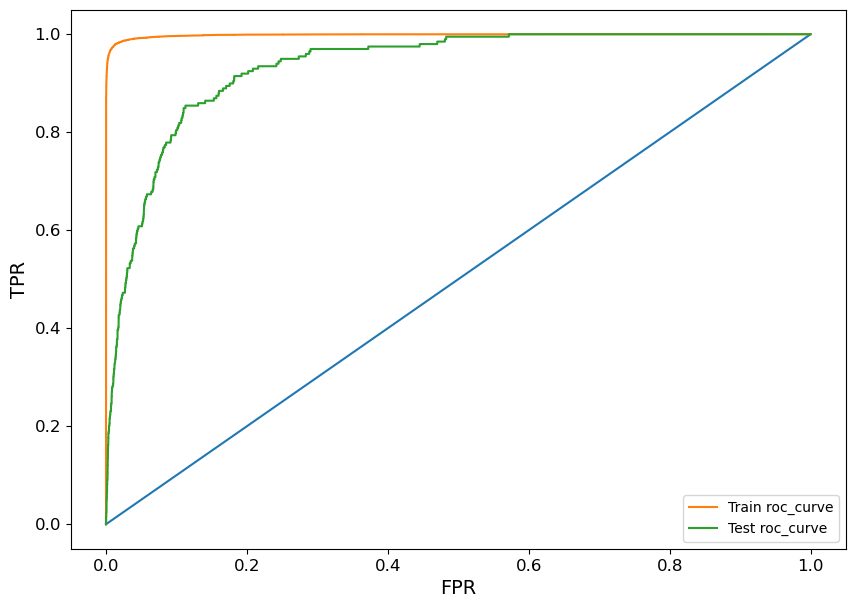

In [436]:
xg_tune = XGBClassifier(n_estimators=199,max_depth=4)

xg_tuned_train_f1, xg_tuned_test_f1, xg_tuned_train_roc,xg_tuned_test_roc, xg_tuned_train_acc, xg_tuned_test_acc,xgb_tuned_rec = model_eval(xg_tune)

In [437]:
models.append('XGB Tuned Classifier')
f1_train_scores.append(xg_tuned_train_f1)
f1_test_scores.append(xg_tuned_test_f1)
roc_train_scores.append(xg_tuned_train_roc)
roc_test_scores.append(xg_tuned_test_roc)
rec_test.append(xgb_tuned_rec)

pd.DataFrame({'Models':models,'Train f1 score':f1_train_scores,'Test f1 scores':f1_test_scores,'Train ROC':roc_train_scores,'Test ROC':roc_test_scores,'Test Recall':rec_test})

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC,Test Recall
0,Base Bagging Classifier,0.545948,0.048625,0.854675,0.850044,0.728643
1,Tuned Bagging Classifier,0.536612,0.048680,0.849199,0.844351,0.713568
2,SGD Classifier,0.471390,0.038657,0.800098,0.799403,0.708543
3,SGD Tuned Classifier,0.597657,0.092807,0.756197,0.765955,0.603015
4,RandomForest Classifier,0.844122,0.076687,0.999993,0.917462,0.879397
5,RandomForest Tuned Classifier,0.708225,0.069565,0.968993,0.928687,0.864322
6,GradientBoost Classifier,0.739611,0.077295,0.981397,0.932521,0.844221
7,GradientBoost Tuned Classifier,0.792335,0.099199,0.985225,0.933184,0.809045
8,XGB Classifier,0.708662,0.064714,0.998976,0.938532,0.899497
9,XGB Tuned Classifier,0.778670,0.088083,0.998461,0.934555,0.854271


## Models in the order of performances

In [438]:
pd.DataFrame({'Models':models,'Train f1 score':f1_train_scores,'Test f1 scores':f1_test_scores,'Train ROC':roc_train_scores,'Test ROC':roc_test_scores,'Test Recall':rec_test}).sort_values(by=['Test Recall'],ascending=False)

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC,Test Recall
8,XGB Classifier,0.708662,0.064714,0.998976,0.938532,0.899497
4,RandomForest Classifier,0.844122,0.076687,0.999993,0.917462,0.879397
5,RandomForest Tuned Classifier,0.708225,0.069565,0.968993,0.928687,0.864322
9,XGB Tuned Classifier,0.778670,0.088083,0.998461,0.934555,0.854271
6,GradientBoost Classifier,0.739611,0.077295,0.981397,0.932521,0.844221
7,GradientBoost Tuned Classifier,0.792335,0.099199,0.985225,0.933184,0.809045
0,Base Bagging Classifier,0.545948,0.048625,0.854675,0.850044,0.728643
1,Tuned Bagging Classifier,0.536612,0.048680,0.849199,0.844351,0.713568
2,SGD Classifier,0.471390,0.038657,0.800098,0.799403,0.708543
3,SGD Tuned Classifier,0.597657,0.092807,0.756197,0.765955,0.603015


In [439]:
pd.DataFrame({'Models':models,'Train f1 score':f1_train_scores,'Test f1 scores':f1_test_scores,'Train ROC':roc_train_scores,'Test ROC':roc_test_scores,'Test Recall':rec_test}).sort_values(by=['Test f1 scores'],ascending=False)

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC,Test Recall
7,GradientBoost Tuned Classifier,0.792335,0.099199,0.985225,0.933184,0.809045
3,SGD Tuned Classifier,0.597657,0.092807,0.756197,0.765955,0.603015
9,XGB Tuned Classifier,0.778670,0.088083,0.998461,0.934555,0.854271
6,GradientBoost Classifier,0.739611,0.077295,0.981397,0.932521,0.844221
4,RandomForest Classifier,0.844122,0.076687,0.999993,0.917462,0.879397
5,RandomForest Tuned Classifier,0.708225,0.069565,0.968993,0.928687,0.864322
8,XGB Classifier,0.708662,0.064714,0.998976,0.938532,0.899497
1,Tuned Bagging Classifier,0.536612,0.048680,0.849199,0.844351,0.713568
0,Base Bagging Classifier,0.545948,0.048625,0.854675,0.850044,0.728643
2,SGD Classifier,0.471390,0.038657,0.800098,0.799403,0.708543


# Final Model Selection

## Ensemble of the chosen models - Voting Classifier

In [ ]:
#Creating An Enseble of Top 3 Models Using Voting Classifier.

Default accuracy score of the train data is:  0.9758240426563257
Default accuracy score of the test data is:  0.9875513347022588

Threshhold defined accuracy score of the train data is:  0.9161617385684279
Threshhold defined accuracy score of the test data is:  0.8996085728952772

F1 score of the train data is:  0.798184912081679
F1 score of the test data is:  0.0959260329384571

roc_auc_score of the train data is:  0.9960854911132524
roc_auc_score of the test data is:  0.9360980367626501

Classification report train
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    123780
           1       0.67      0.99      0.80     24756

    accuracy                           0.92    148536
   macro avg       0.83      0.95      0.87    148536
weighted avg       0.94      0.92      0.92    148536



Classification report test
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     30969
           1

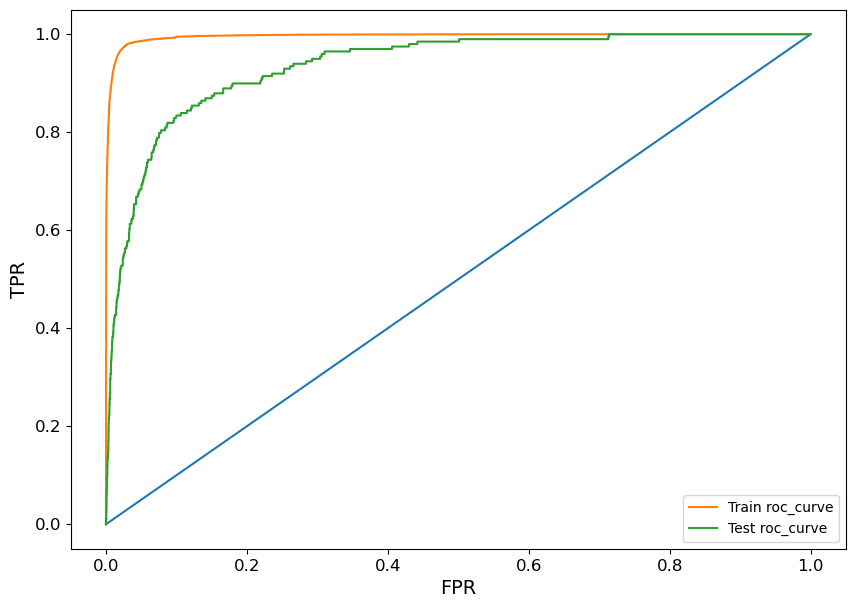

(0.798184912081679,
 0.0959260329384571,
 0.9960854911132524,
 0.9360980367626501,
 0.9758240426563257,
 0.9875513347022588,
 0.8341708542713567)

In [440]:
clf1  = RandomForestClassifier(random_state=3,n_jobs=-1,n_estimators=121,max_depth=7)
clf2  = GradientBoostingClassifier(random_state=3, n_estimators= 139)
clf3  = XGBClassifier(use_label_encoder=False)

vc = VotingClassifier(estimators=[('RandomForest',clf1),('GradientBoosting',clf2),('XGBClassifier',clf3)], voting='soft')

model_eval(vc)

# Conclusion

Out of all the models tried RandomForest Classifier, XGB Classifier and GradientBoosting gave the maximum True positives, which in our case is the priority. By combining the power of the three models we managed to predict 171 True positives out of 199 Positives. 

## Voting Classifier Performances

In [442]:
transformed_train.shape

(148536, 14)

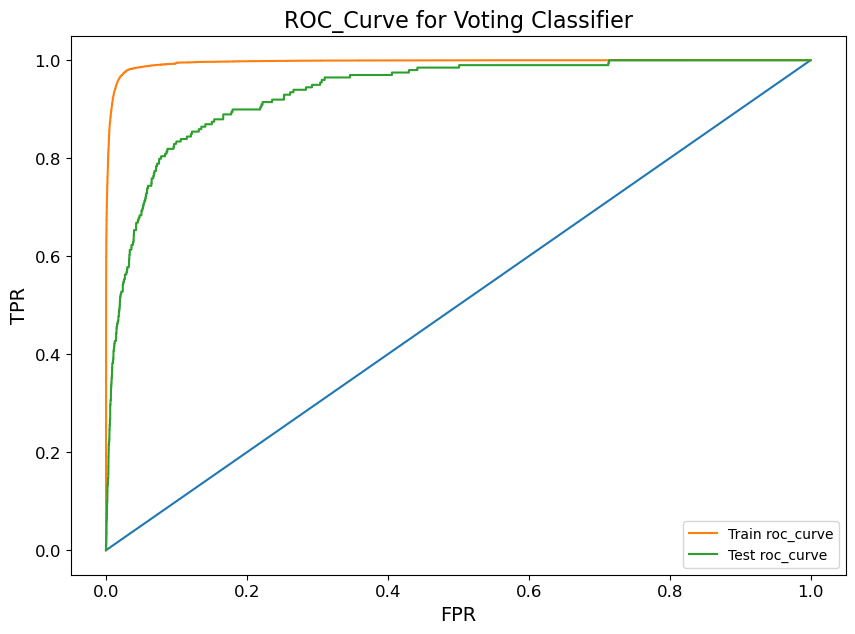

In [443]:
vc.fit(transformed_train,ytrain_smote)
    
yprob_train = vc.predict_proba(transformed_train)[:,1]
yprob_test = vc.predict_proba(transformed_test)[:,1]
    
fpr,tpr,threshold = roc_curve(ytest,yprob_test)
j = tpr-fpr
i = np.argmax(j)
best_th = threshold[i]
    
ypred_train = list(map(lambda x :0 if x<best_th else 1,yprob_train))
ypred_test  = list(map(lambda x :0 if x<best_th else 1,yprob_test))

fpr,tpr,thresholds = roc_curve(ytest, yprob_test)
fpr1,tpr1,th1      = roc_curve(ytrain_smote,yprob_train)
    
plt.figure(figsize=(10,7))
plt.title('ROC_Curve for Voting Classifier',fontsize=16)
plt.plot(fpr,fpr)
plt.plot(fpr1,tpr1,label='Train roc_curve')
plt.plot(fpr,tpr,label='Test roc_curve')
plt.xlabel('FPR',fontsize=14)
plt.ylabel('TPR',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

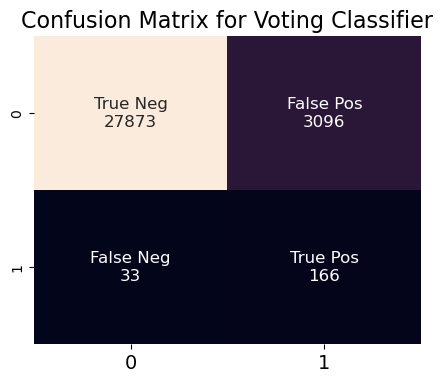

In [444]:
plt.figure(figsize=(5,4))
cf_matrix = confusion_matrix(ytest, ypred_test)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Voting Classifier',fontsize=16)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="",cbar=False,annot_kws={"size":12})
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
bottom, top = ax.get_ylim()
plt.show()

## Feature Importances

In [446]:
clf1.fit(transformed_train,ytrain_smote)
df_feature = pd.DataFrame(clf1.feature_importances_*100,columns=['important'])
df_feature['Feature_names']=transformed_train.columns
dff=df_feature.sort_values(by='important',ascending=True)
dff

,important,Feature_names
11,0.000704,oe_constraint_Yes
9,0.004861,potential_issue_Yes
13,0.109049,stop_auto_buy_Yes
12,0.165458,ppap_risk_Yes
10,0.948065,deck_risk_Yes
8,2.743951,performance_index
1,2.942402,lead_time
4,3.041352,pieces_past_due
3,4.347404,min_bank
2,5.843064,in_transit_qty


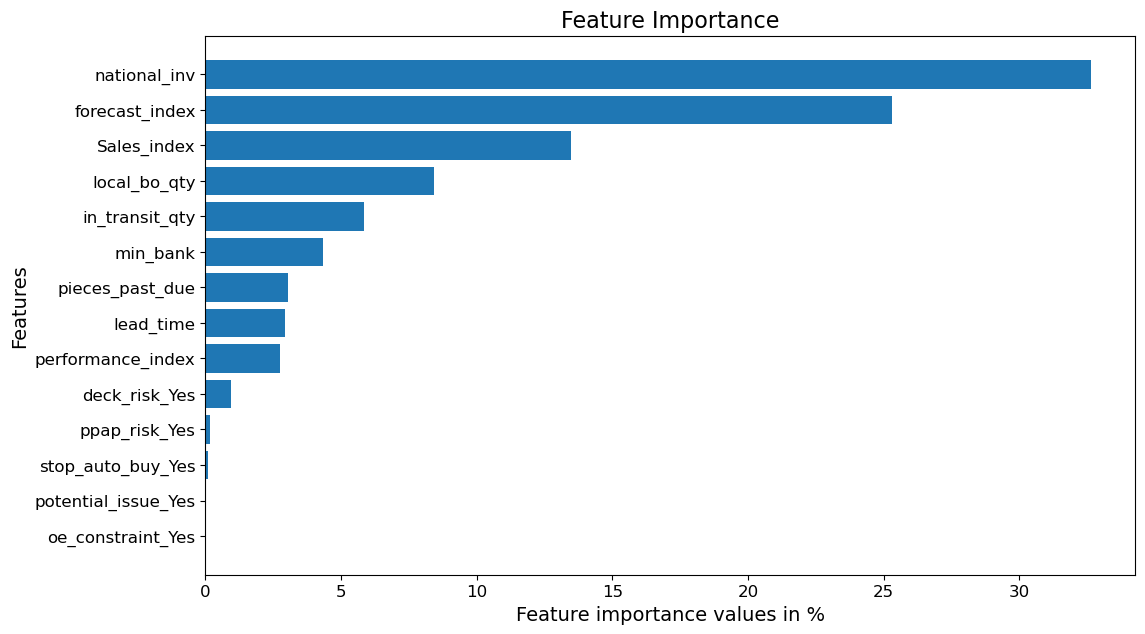

In [449]:
plt.figure(figsize=(12,7))
w=np.arange(14)
plt.barh(w,dff['important'])
plt.title("Feature Importance",fontsize=16)
plt.xlabel('Feature importance values in %',fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.yticks(w,dff["Feature_names"])
plt.show()

In [451]:
clf2.fit(transformed_train,ytrain_smote)
df_feature = pd.DataFrame(clf2.feature_importances_*100,columns=['important'])
df_feature['Feature_names']=transformed_train.columns
dff2=df_feature.sort_values(by='important',ascending=True)
dff2

,important,Feature_names
11,0.000000,oe_constraint_Yes
9,0.003513,potential_issue_Yes
12,0.023112,ppap_risk_Yes
10,0.053351,deck_risk_Yes
13,0.054944,stop_auto_buy_Yes
4,1.195429,pieces_past_due
8,2.384702,performance_index
5,4.000016,local_bo_qty
2,4.331373,in_transit_qty
3,4.993070,min_bank


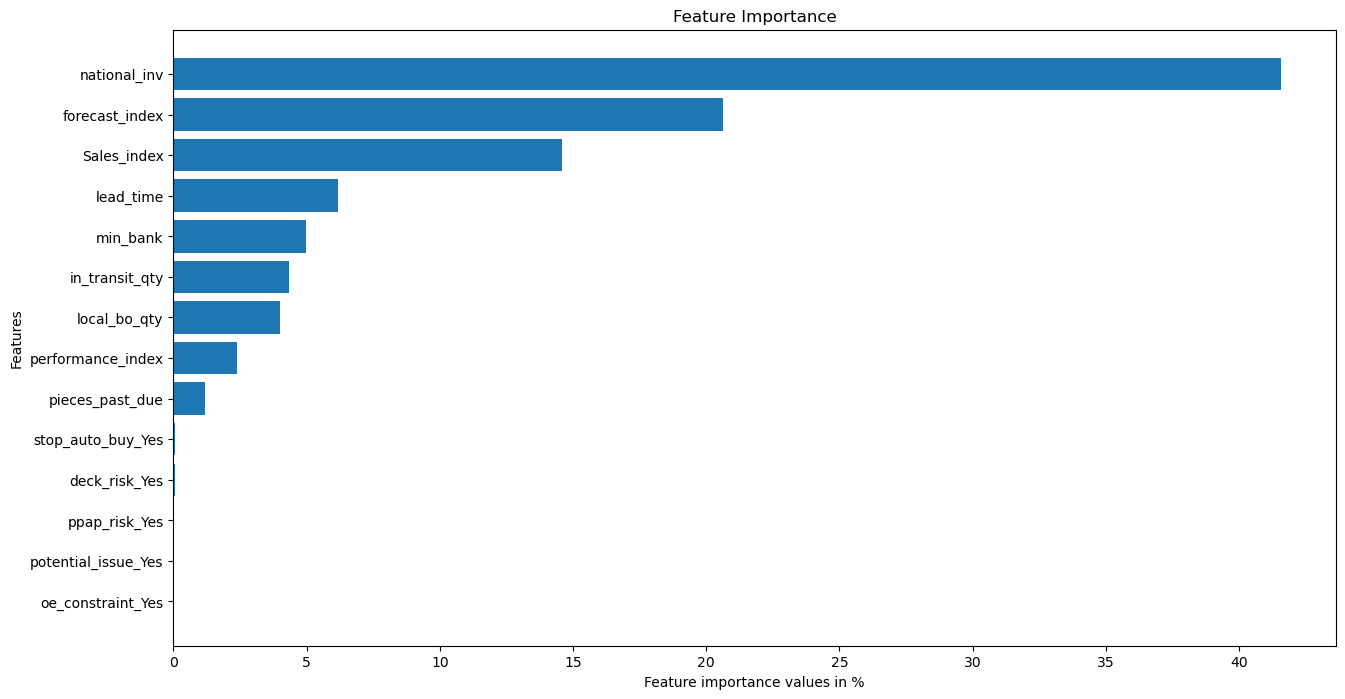

In [452]:
plt.figure(figsize=(15,8))
w2=np.arange(14)
plt.barh(w2,dff2['important'])
plt.title("Feature Importance")
plt.xlabel('Feature importance values in %')
plt.ylabel('Features')
plt.yticks(w2,dff2["Feature_names"])
plt.show()

In [454]:
clf3.fit(transformed_train,ytrain_smote)
df_feature = pd.DataFrame(clf3.feature_importances_,columns=['important'])
df_feature['Feature_names']=transformed_train.columns
dff3=df_feature.sort_values(by='important',ascending=True)
dff3

,important,Feature_names
11,0.000000,oe_constraint_Yes
9,0.003941,potential_issue_Yes
12,0.021496,ppap_risk_Yes
10,0.031843,deck_risk_Yes
13,0.034237,stop_auto_buy_Yes
8,0.034411,performance_index
4,0.045839,pieces_past_due
2,0.074317,in_transit_qty
6,0.074509,Sales_index
1,0.079638,lead_time


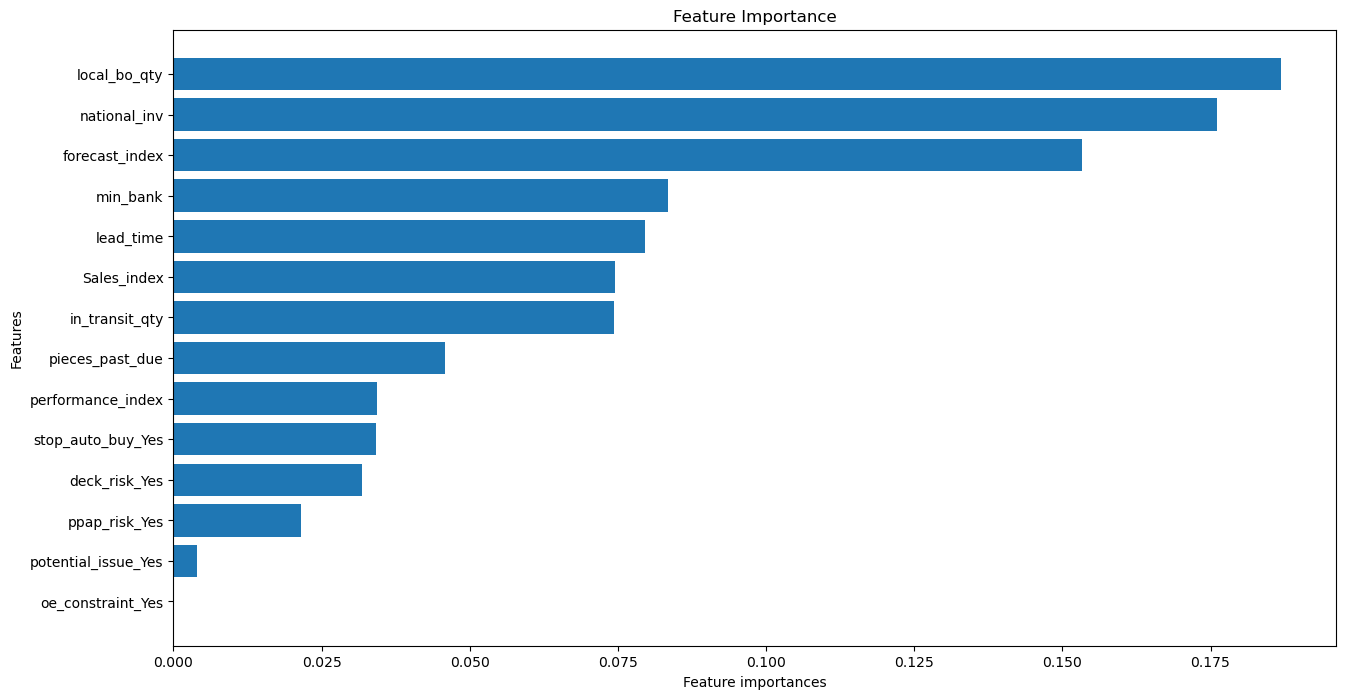

In [455]:
plt.figure(figsize=(15,8))
w3=np.arange(14)
plt.barh(w3,dff3['important'])
plt.title("Feature Importance")
plt.xlabel('Feature importances')
plt.ylabel('Features')
plt.yticks(w3,dff3["Feature_names"])
plt.show()

As all the 3-models were giving almost same feature_importances for the top-4 positions. Hence considered the Random Forest Tuned model as it gave the best performance out of the selected 3-models.

The top-5 important variables in predicting the backorder are:
1. National Inventory
2. Forecast Index
3. Sales Index
4. Lead Time
5. Min Bank

